# Cloudy With a Chance of Football
## Global Machine Learning Model Part Two: Model Selection
<a id='header_cell'></a>

Author: Aidan O'Connor   
Date: 20 June 2021   

<img src='https://static.clubs.nfl.com/image/private/t_editorial_landscape_12_desktop_2x/f_auto/cardinals/s43eajirdyxulvasrne2.jpg' alt="drawing" width="800"/> 
*Area of future study: do Quarterbacks who wear visors win Super Bowls? (photo courtesy of the [The Arizona Cardinals](https://www.azcardinals.com/news/cardinals-kyler-murray-might-get-his-in-game-tinted-visor-after-all))*

- [Importing packages, setting preferences, reading in data](#import_set_read_cell)
- [Understanding the data](#data_review_cell)
- [Preparing the data](#scoring_models_cell)
- [Global Machine Learning Model](#global_model_cell)
    - [Model Selection](#model_selection_cell)
        - [Selecting Columns](#column_selection_cell)
        - [Selecting models to score](#model_scoring_selection_cell)
        - [Scoring selected models](#scoring_models_cell)
    - [Hyperparameter Tuning](#hyperparameter_tuning_cell)

### Importing packages, setting preferences, reading in data
<a id='import_set_read_cell'></a>

In [1]:
# Packages to import and manipulate data
import pandas as pd
import numpy as np

# Packages to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Packages to create and visualize machine learning models from yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix

# Packages to create machine learning models from scikit-learn
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

In [2]:
# Set pandas viewing options
pd.set_option('display.max_columns', None)

# Bring in jupyter magic
%matplotlib inline

# Set matplotlib visualization styling options
plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../../../fixtures/cleaned_data/merged_df.csv')

### Understanding the data
<a id='data_review_cell'></a>

In [5]:
df['performance'] = [int(x) for x in df['performance']]

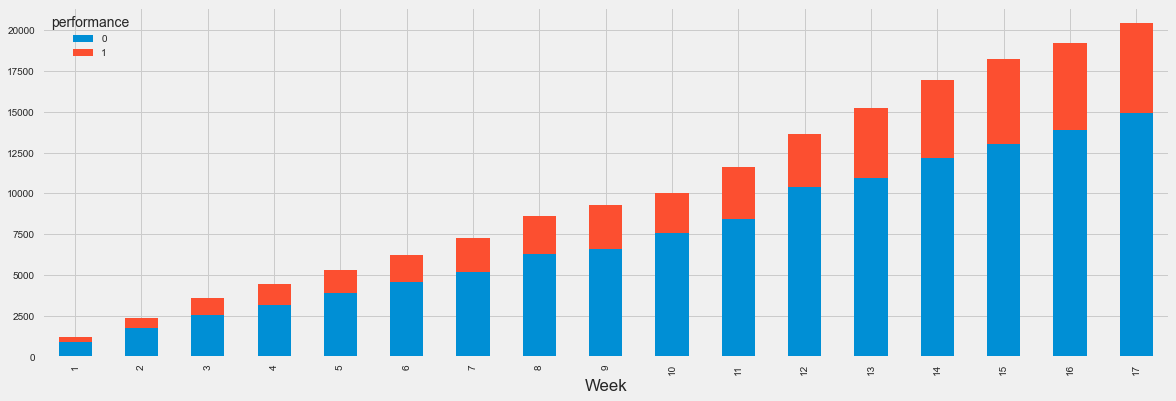

In [6]:
agg_df = df.groupby(['Week','performance'])['Week'].sum().unstack().fillna(0)

agg_df.plot(kind = 'bar', stacked = True)

plt.savefig('../../../fixtures/images/presentation_screenshots/Global_WeeklyValueCountsAndPerformance_BarChart.png')

<AxesSubplot:>

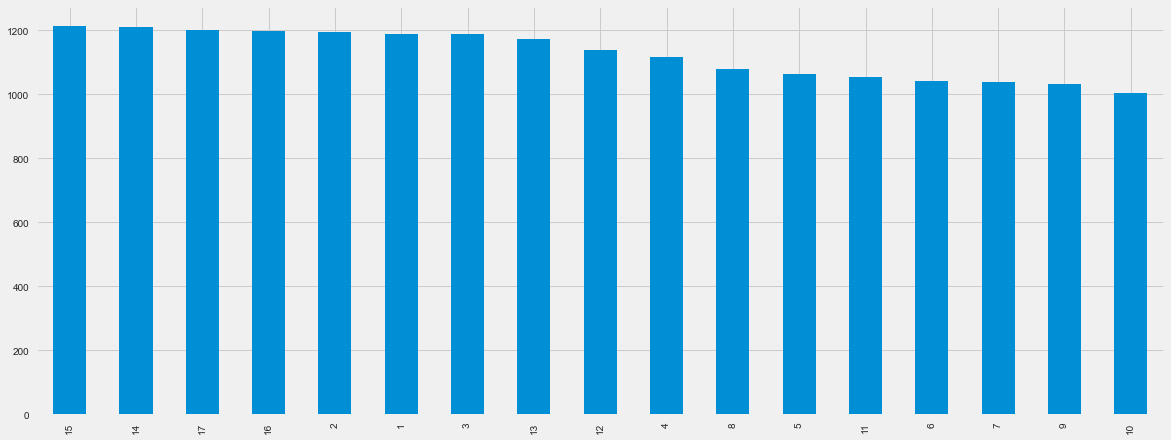

In [203]:
df['Week'].sort_values().value_counts().plot(kind='bar')

<AxesSubplot:>

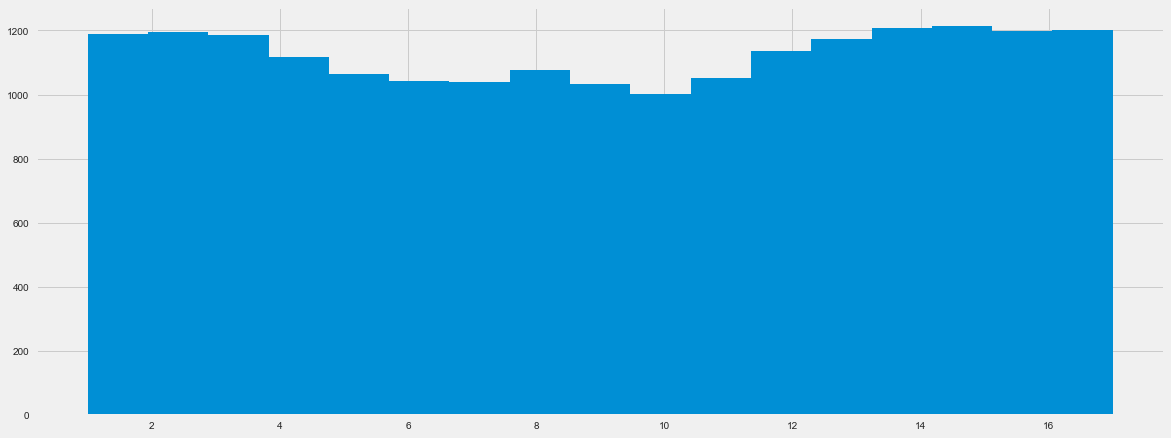

In [124]:
df['Week'].hist(bins = 17)

In [95]:
boxplot_cols = [
 'Week',
 'days_since_last_game',
 'absolute_hours_displaced',
 'weather_temperature',
 'weather_wind_mph_number',
 'weather_cloud_cover',
 'weather_precipitation',
 'weather_humidity',
 'age',
 'elevation_displacement',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecovered',
 'FumbleReturnTouchdowns',
 'Interceptions',
 'InterceptionReturnTouchdowns',
 'FieldGoalsAttempted',
 'FieldGoalsMade',
 'ExtraPointsMade',
 'TwoPointConversionPasses',
 'TwoPointConversionRuns',
 'TwoPointConversionReceptions',
 'ExtraPointsAttempted',
 'FieldGoalsMade0to19',
 'FieldGoalsMade20to29',
 'FieldGoalsMade30to39',
 'FieldGoalsMade40to49',
 'FieldGoalsMade50Plus',
 'PointsAllowedByDefenseSpecialTeams',
 'BlockedKickReturnTouchdowns',
 'PointsAllowed',
 'SpecialTeamsTouchdowns',
 'DefensiveTouchdowns',
 'BlockedKicks',
 'TwoPointConversionReturns',
 'FieldGoalReturnTouchdowns',
 'Safeties',
 'TouchdownsScored',
 'PassingYardsRZ',
 'PassingTouchdownsRZ',
 'PassingInterceptionsRZ',
 'RushingYardsRZ',
 'RushingTouchdownsRZ',
 'ReceptionsRZ',
 'ReceivingYardsRZ',
 'ReceivingTouchdownsRZ',
 'SacksRZ',
 'InterceptionsRZ',
 'FumblesForcedRZ',
 'FumlbesRecoveredRZ',
 'performance'
]

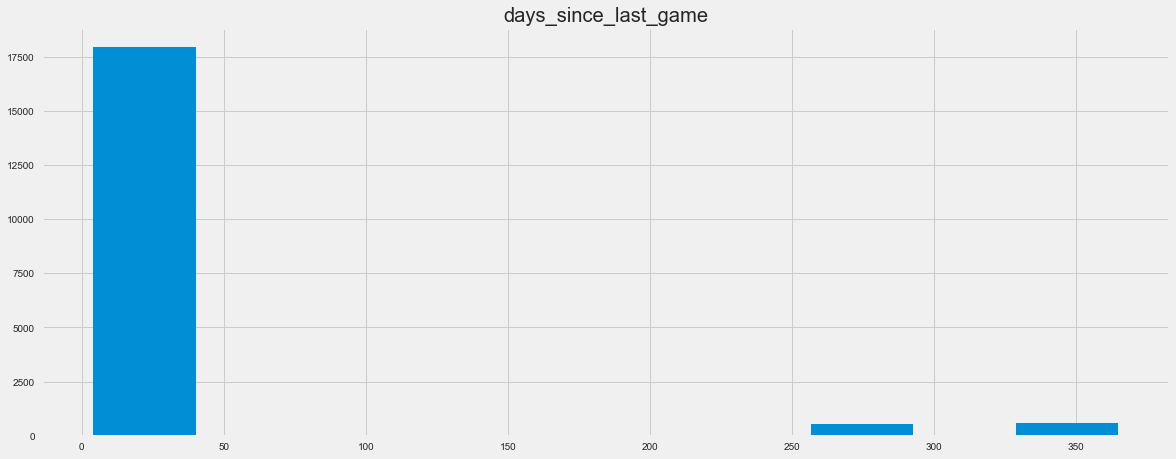

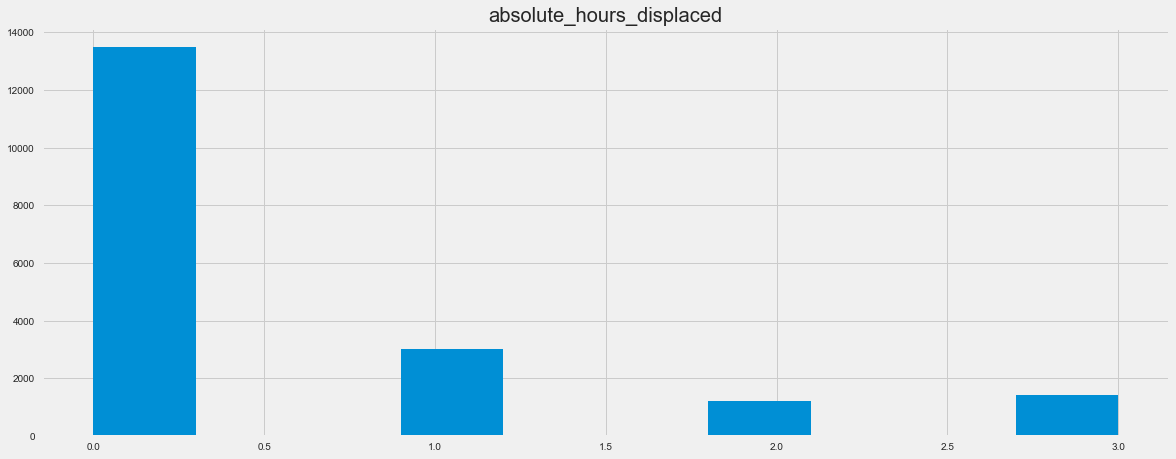

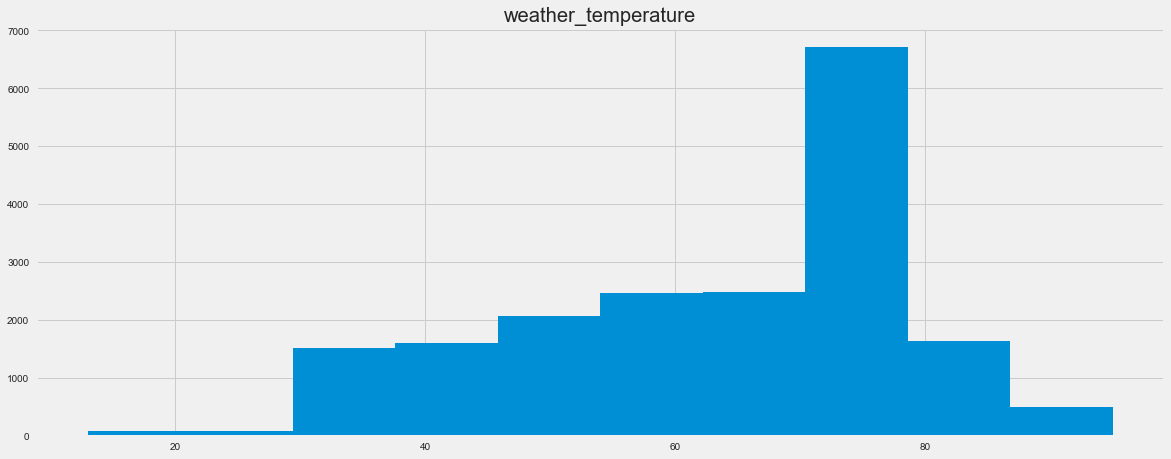

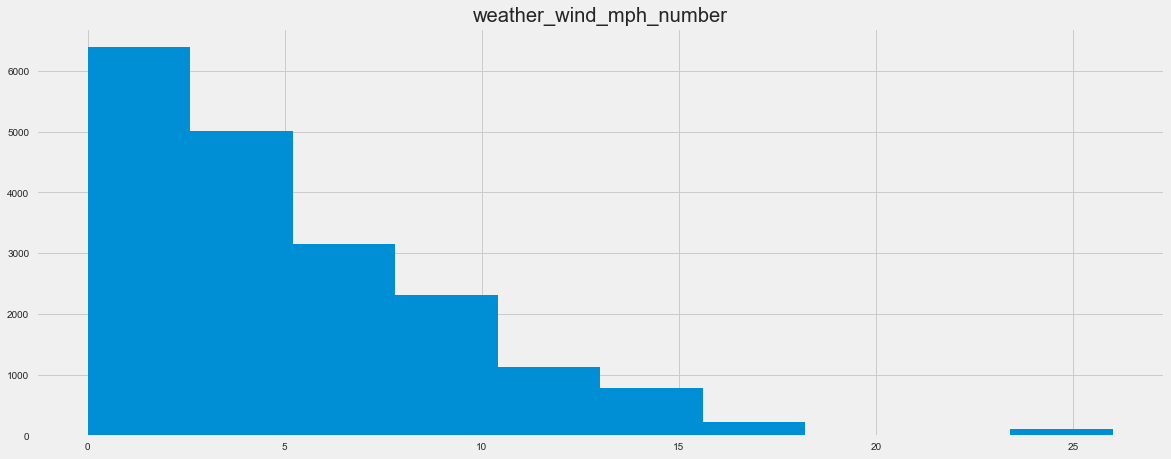

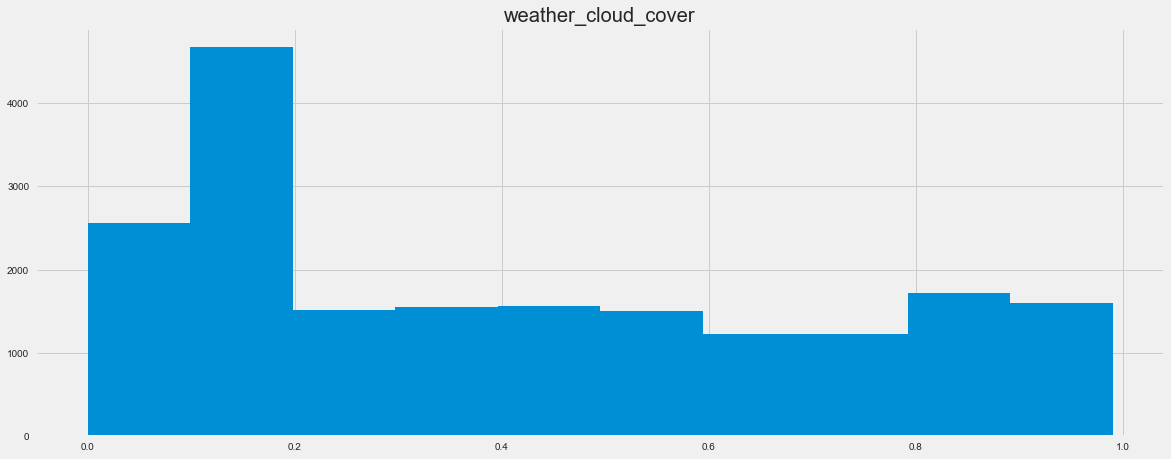

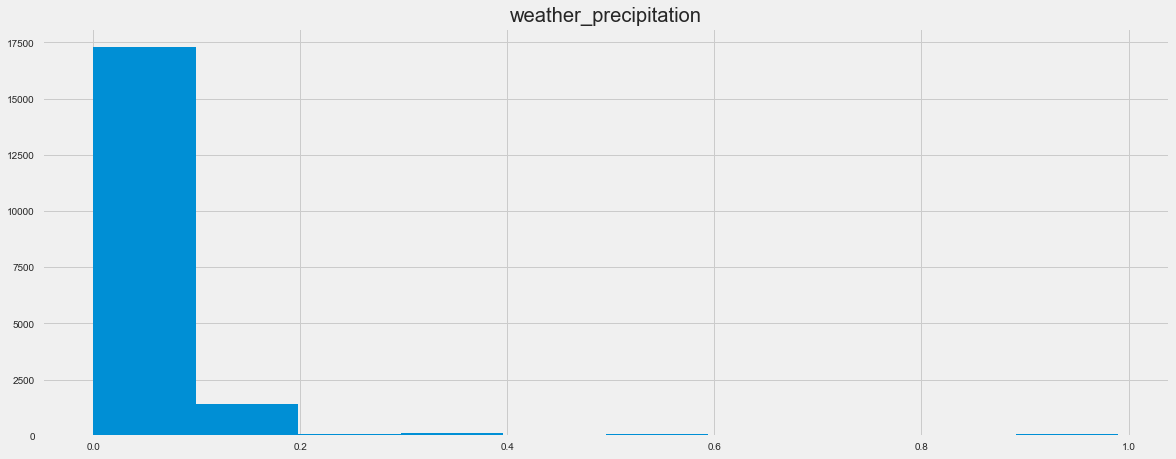

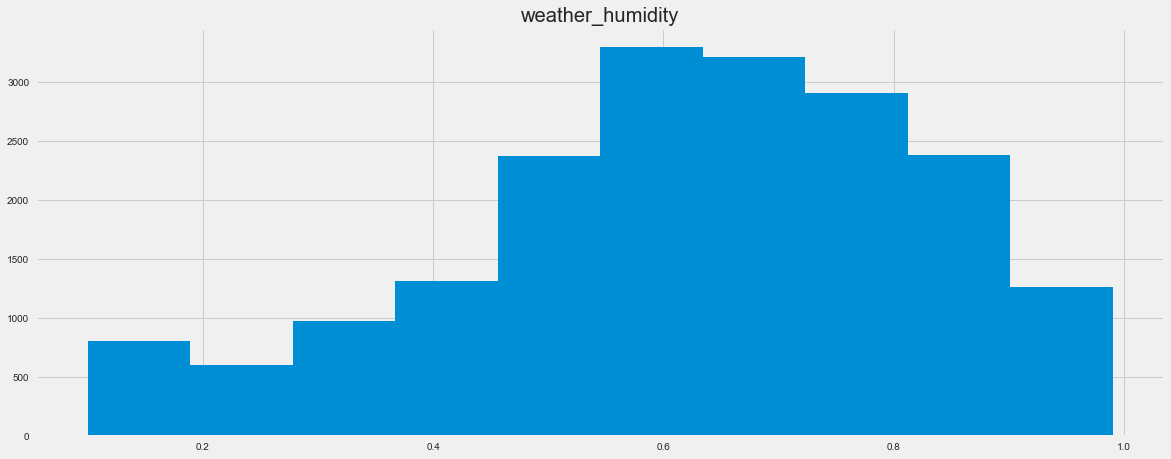

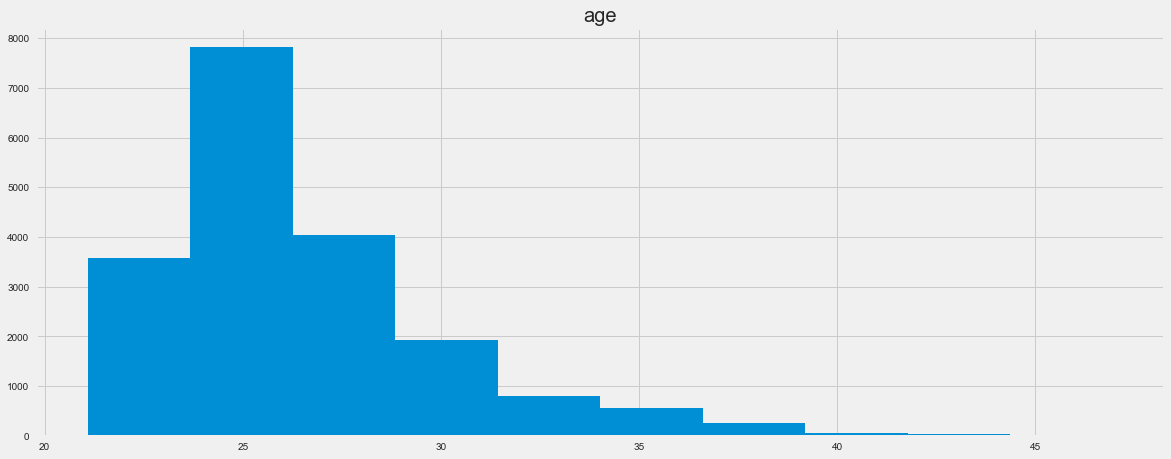

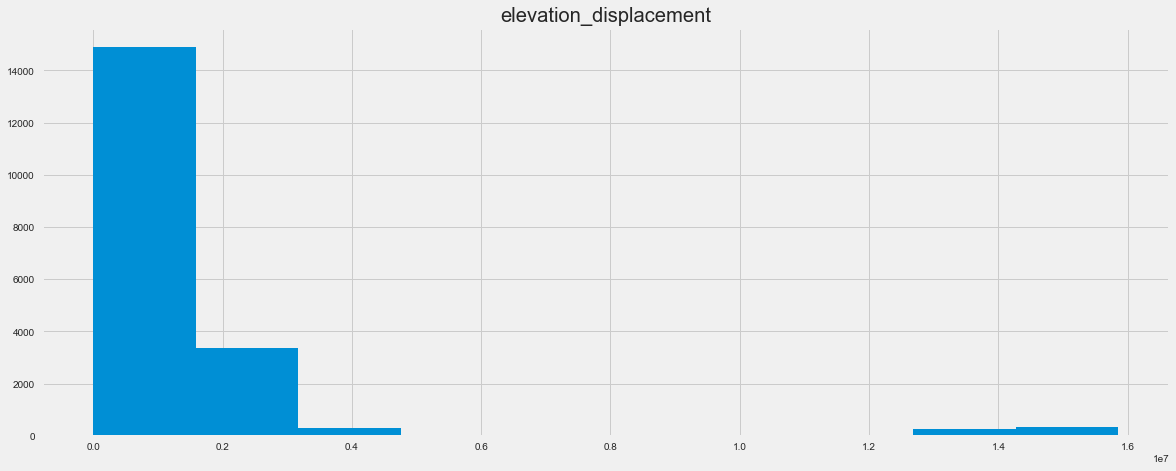

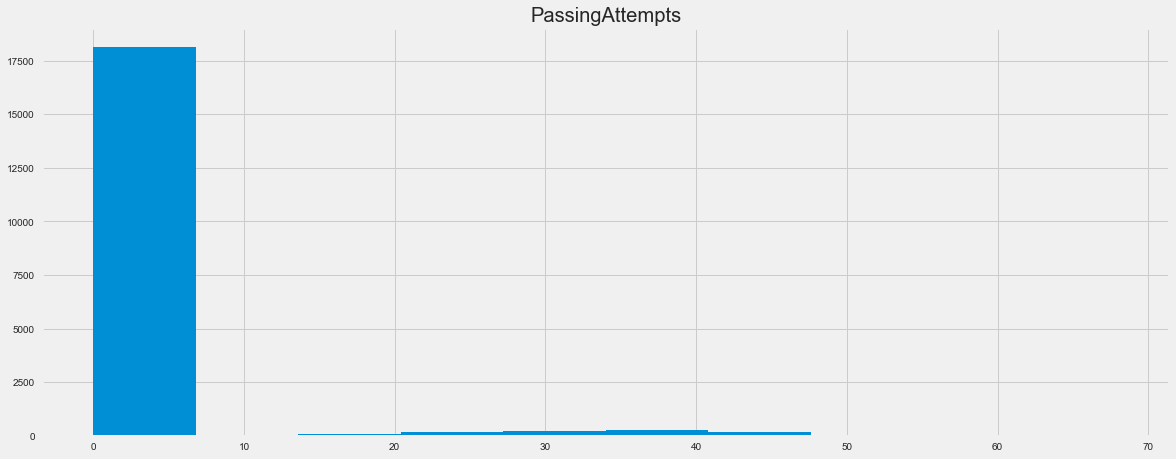

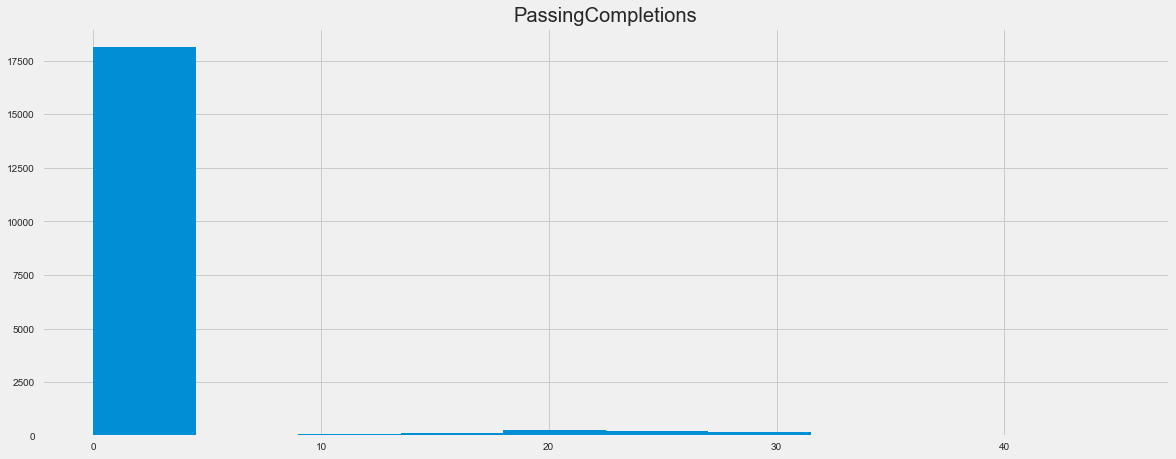

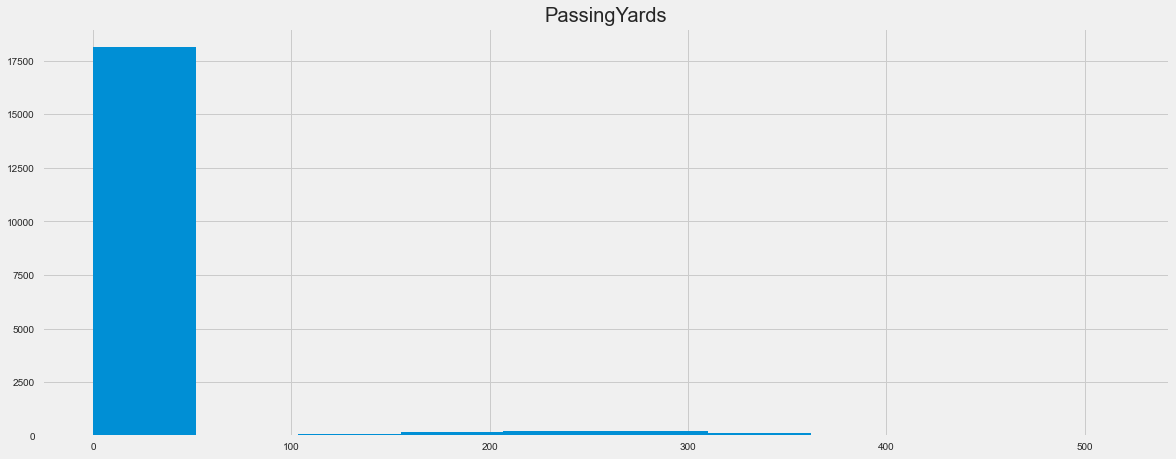

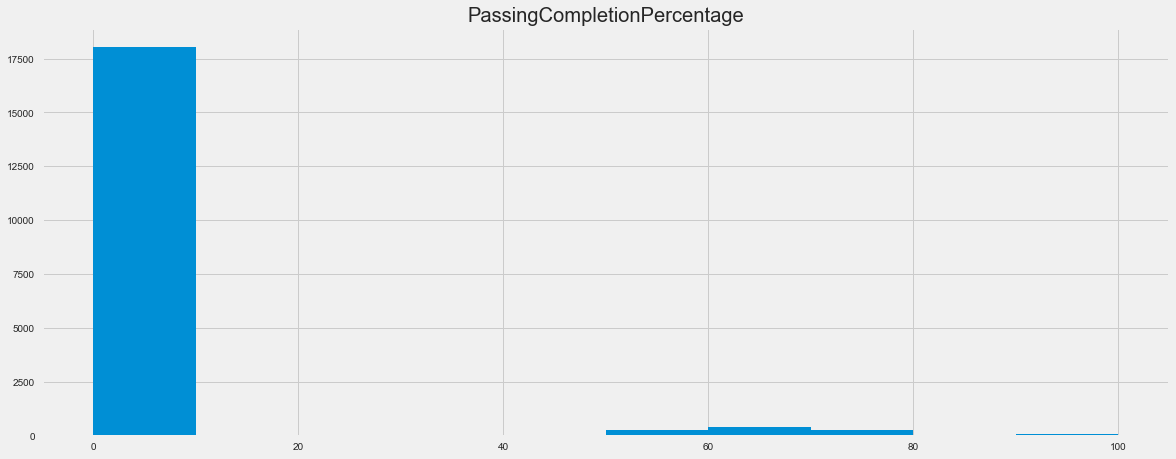

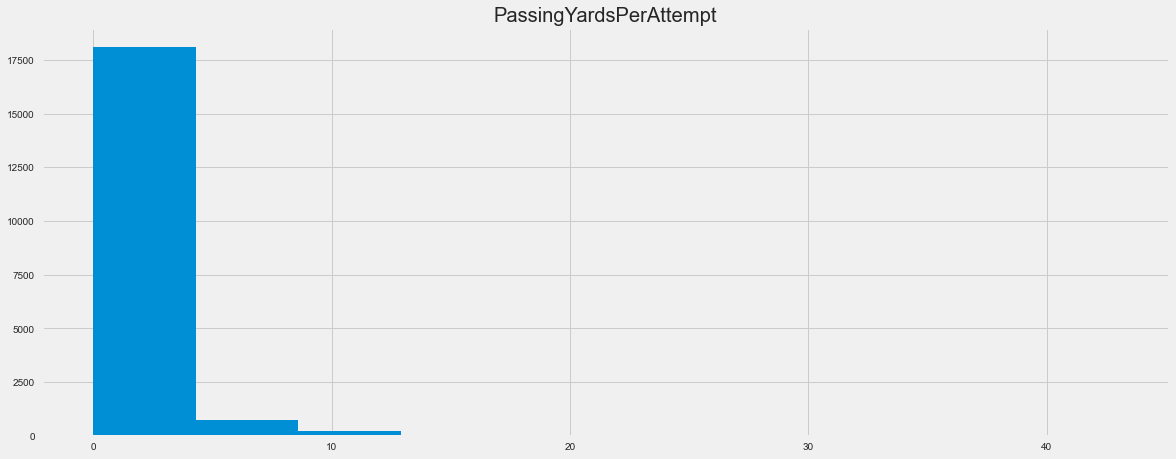

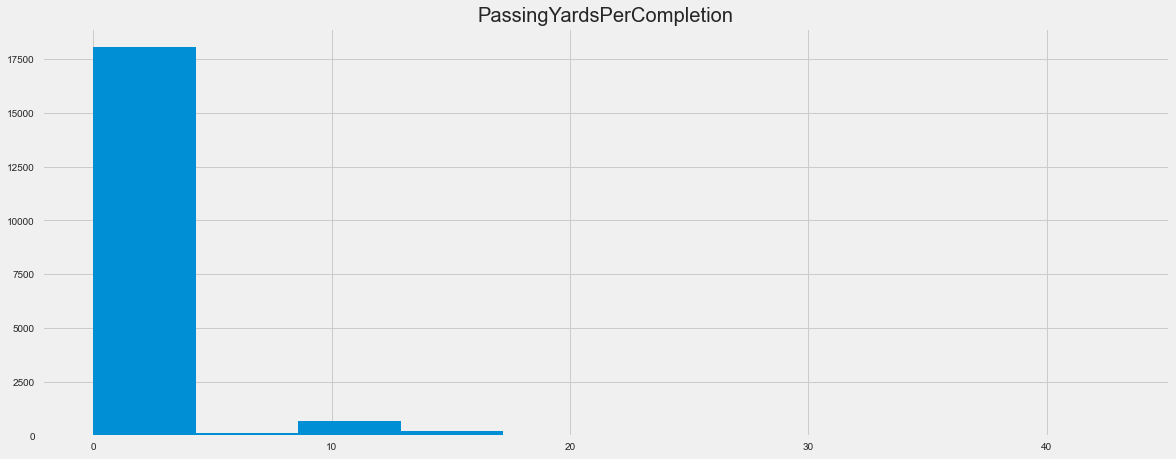

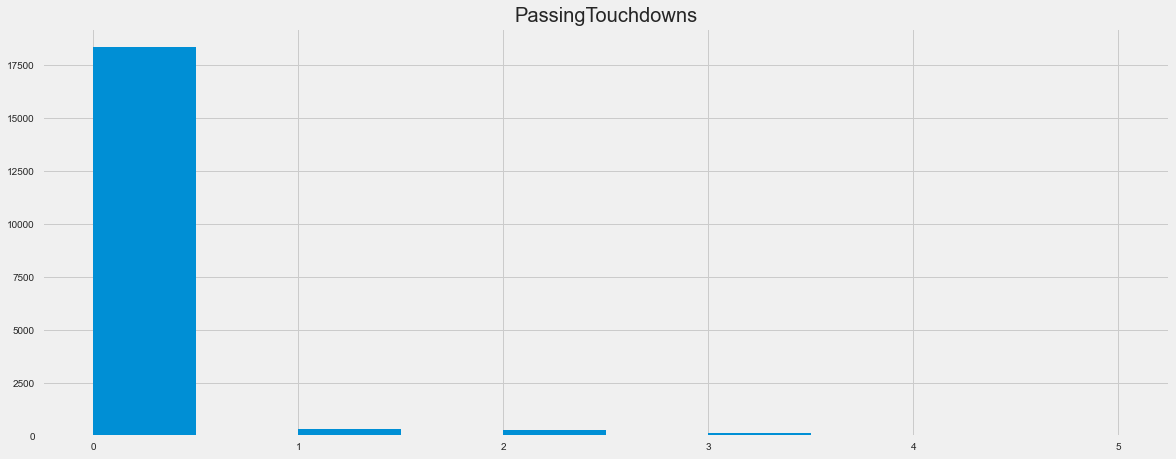

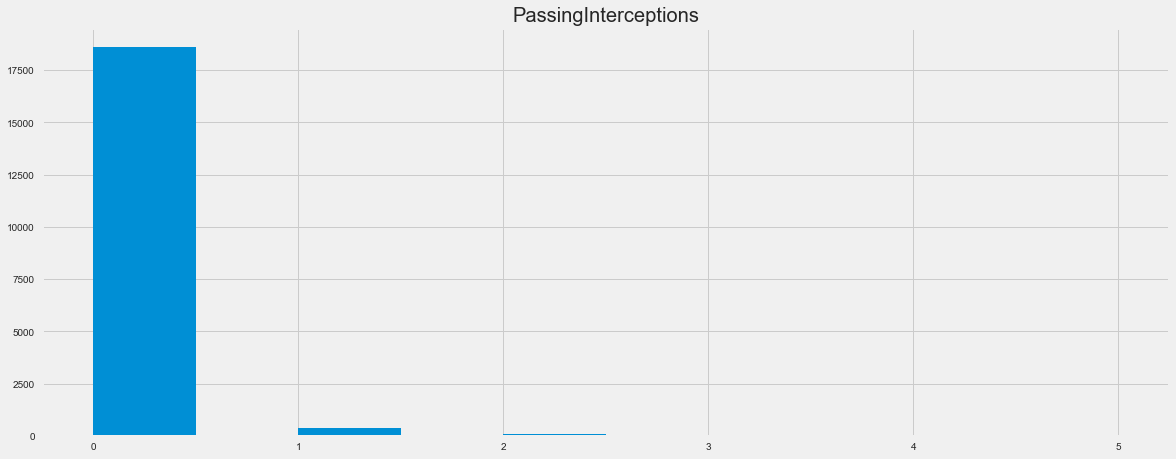

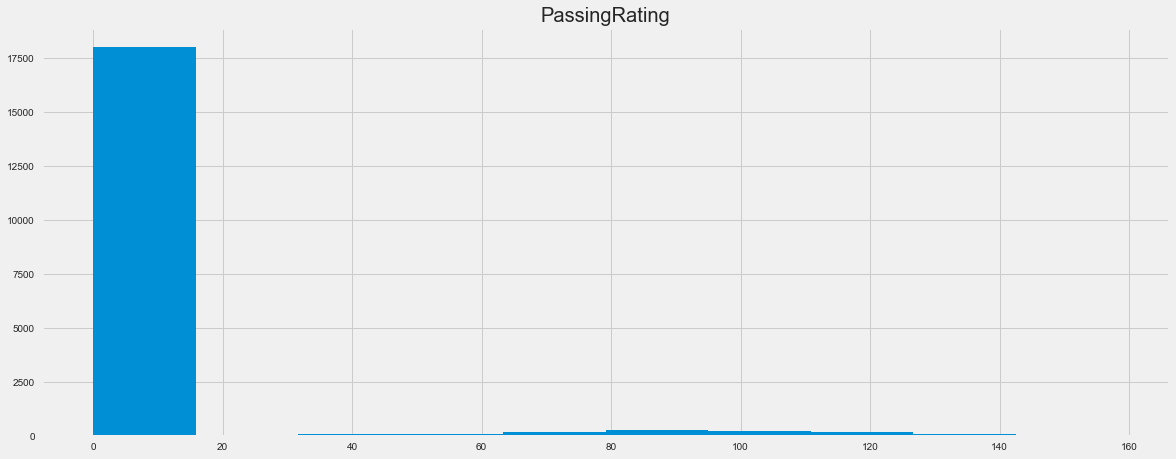

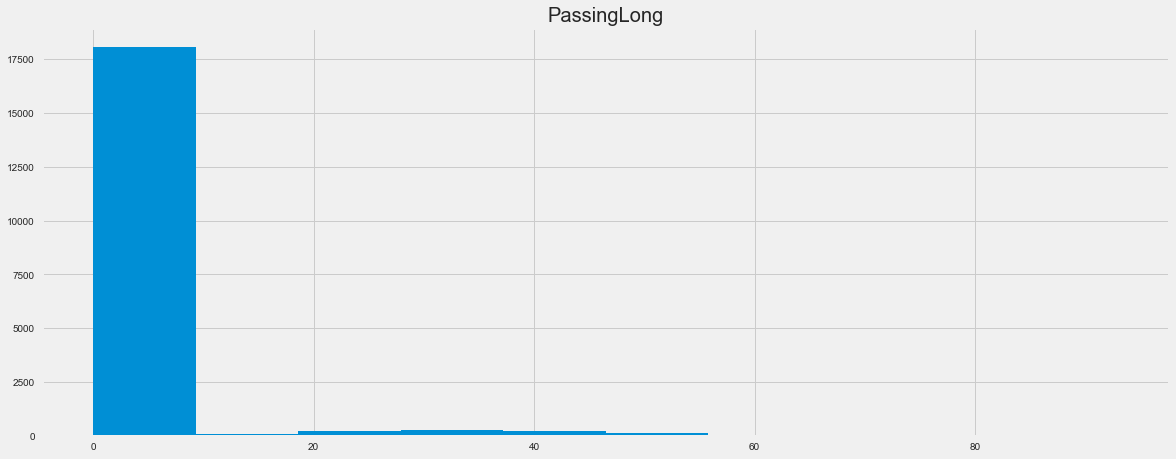

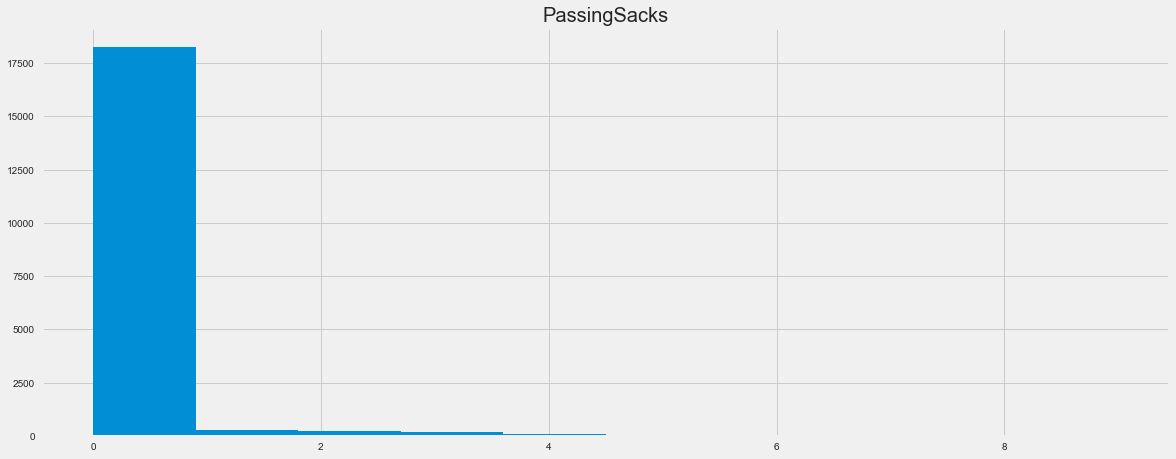

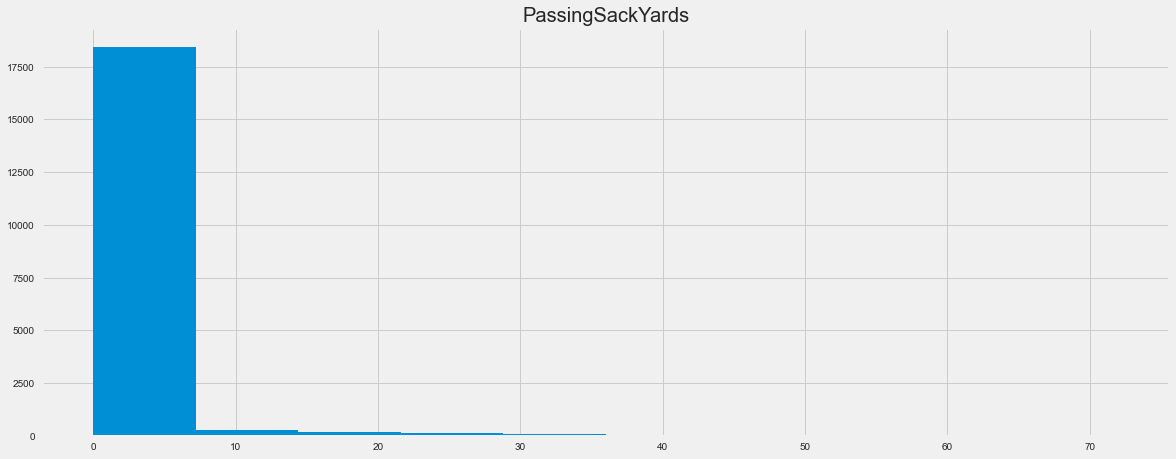

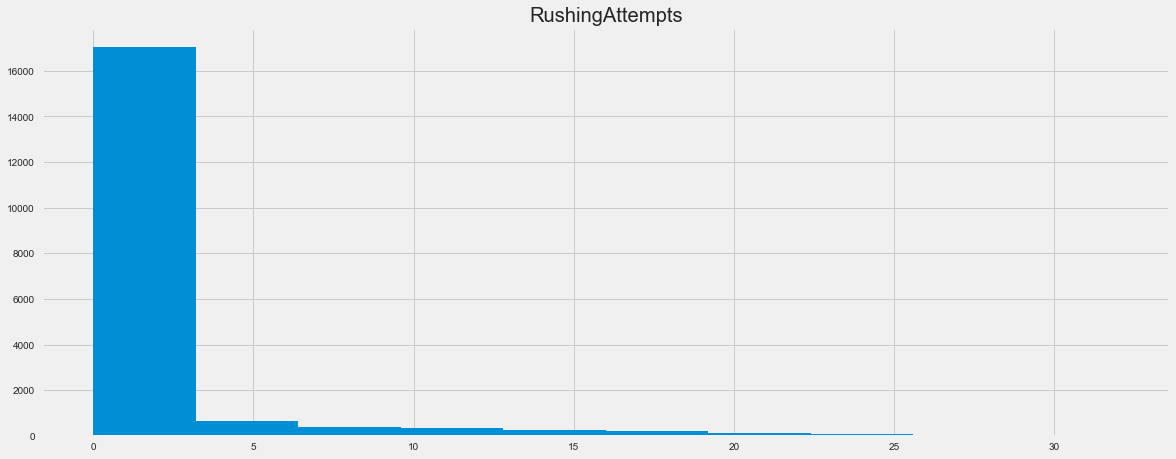

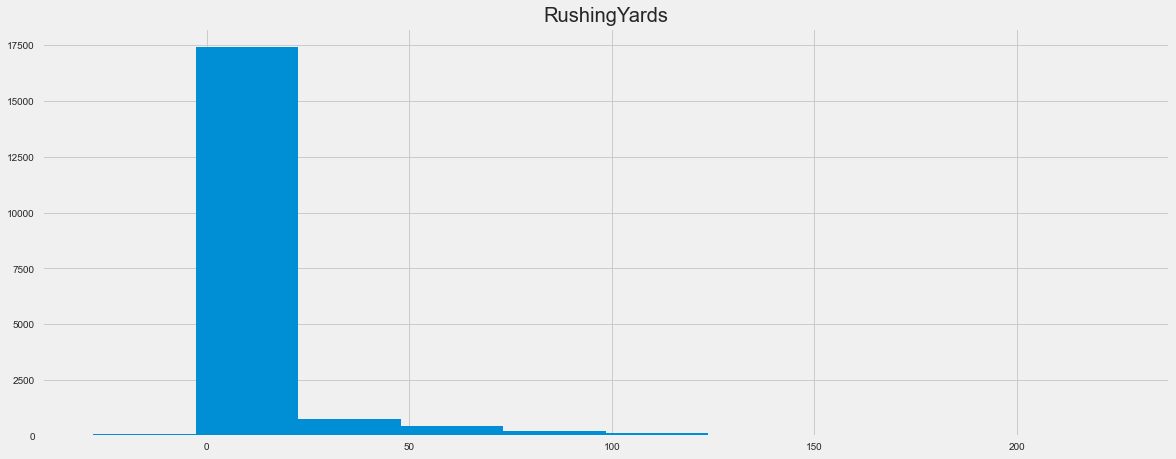

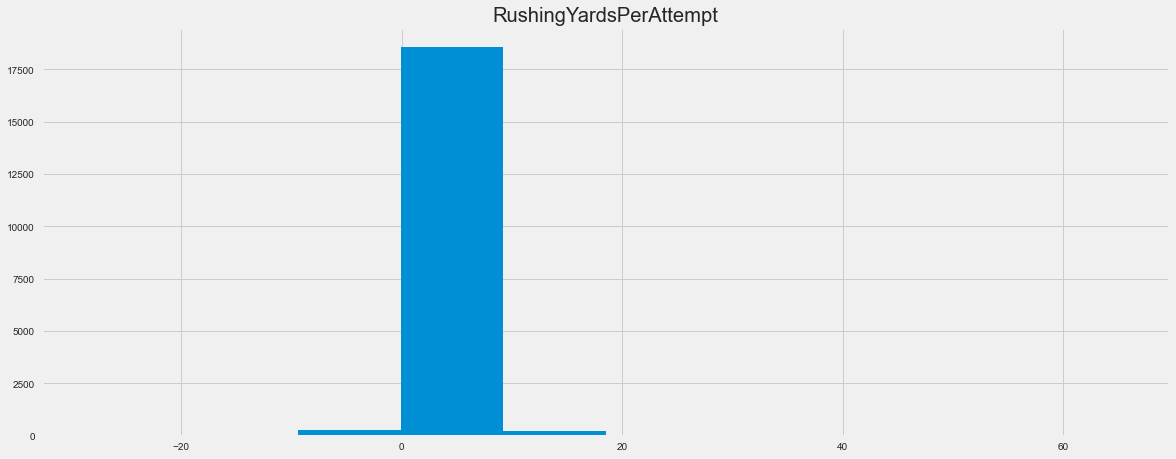

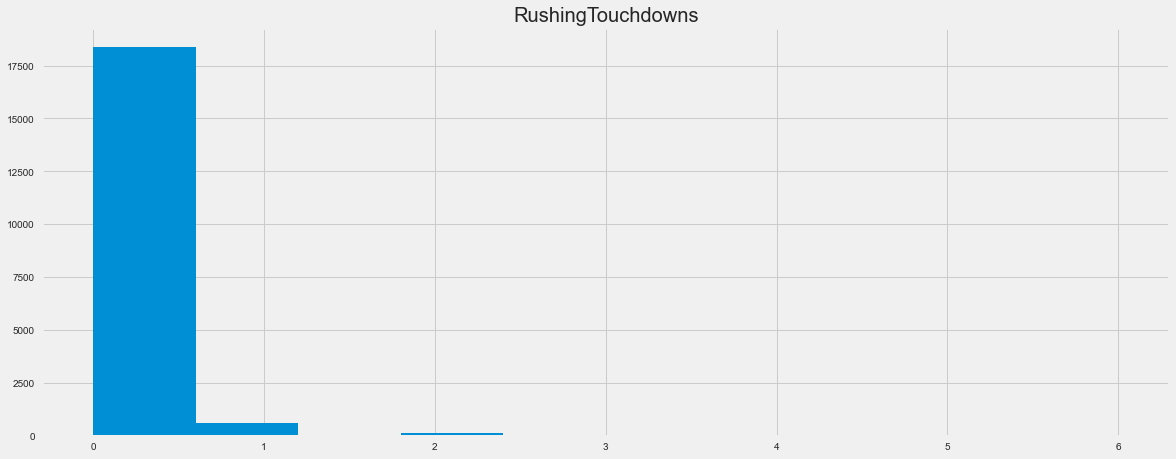

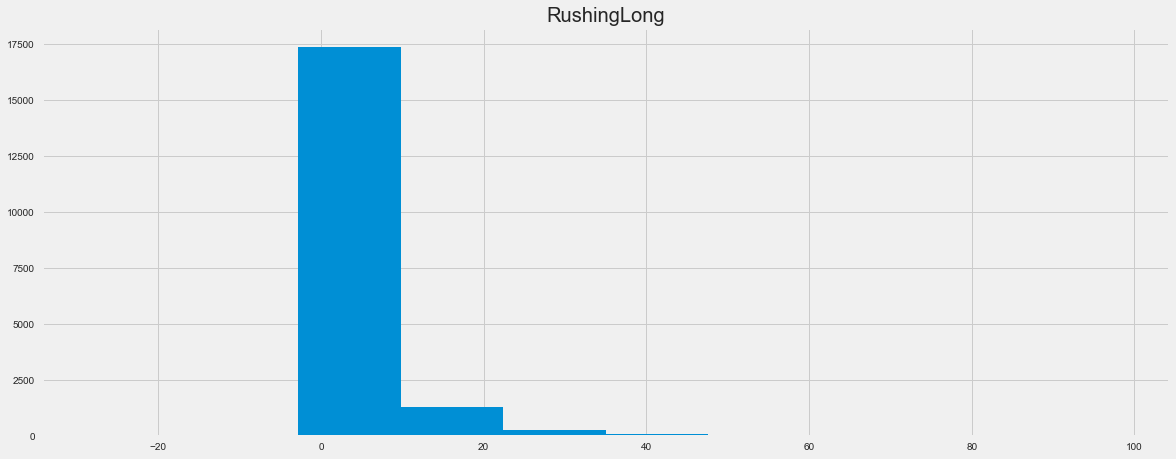

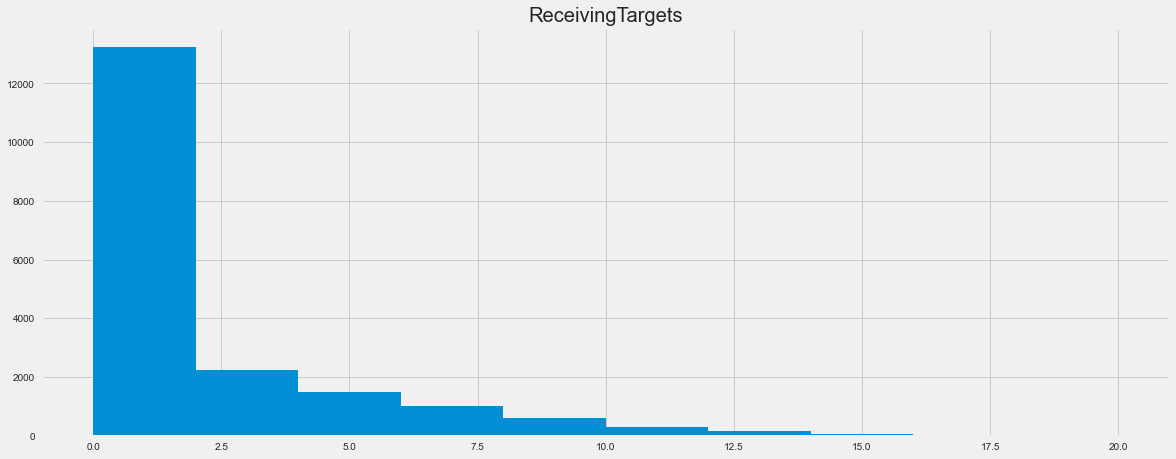

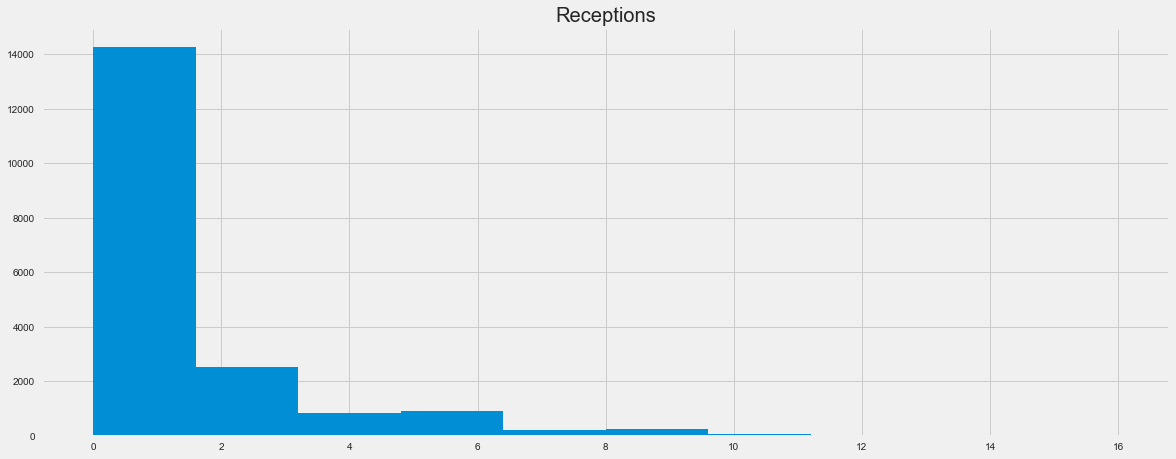

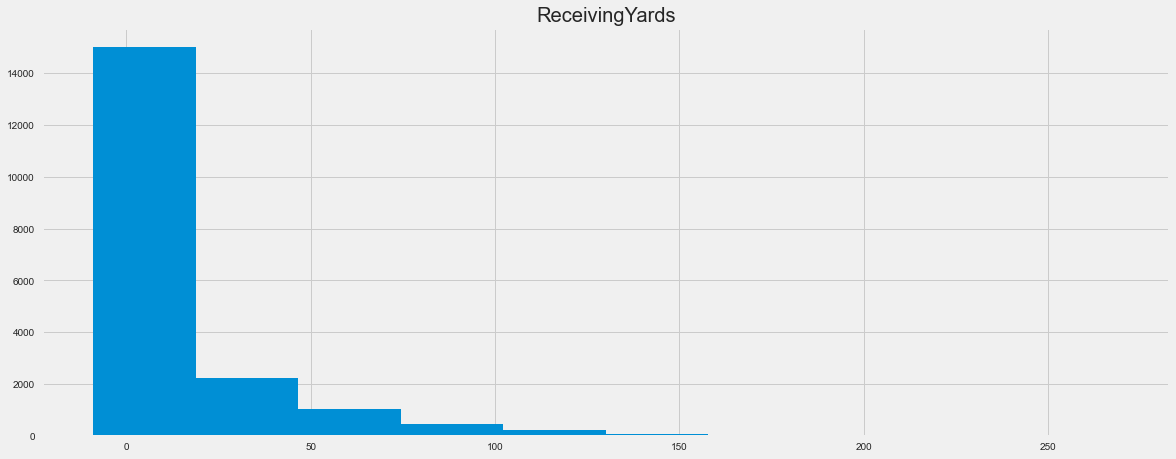

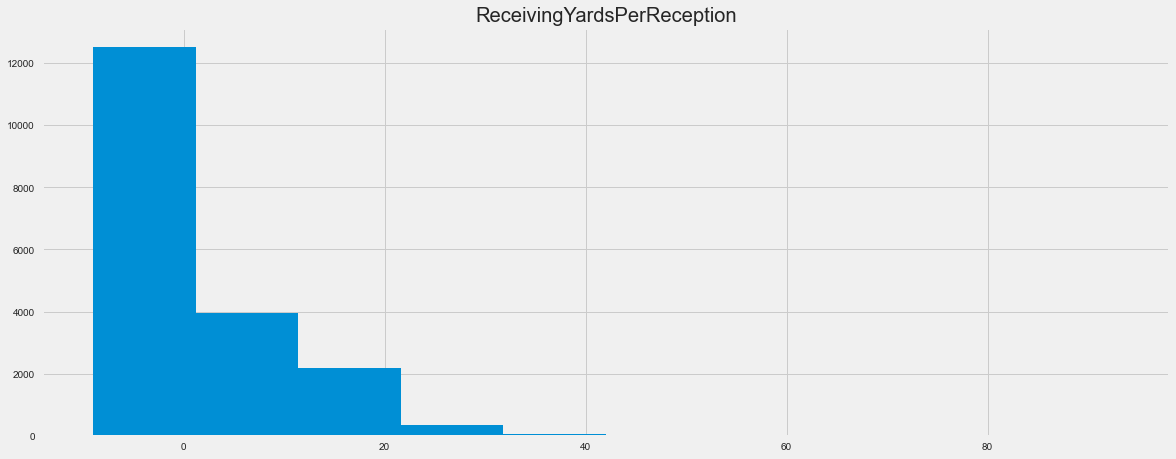

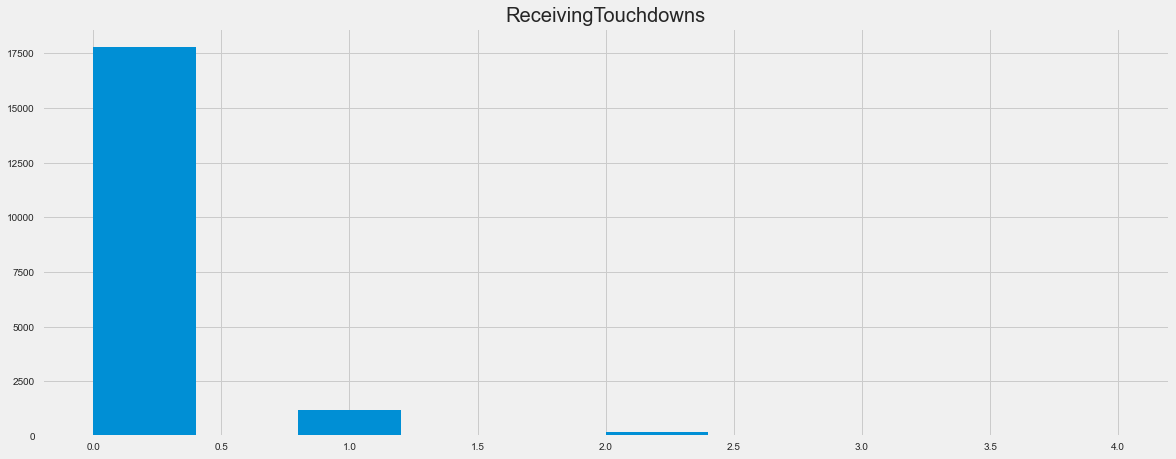

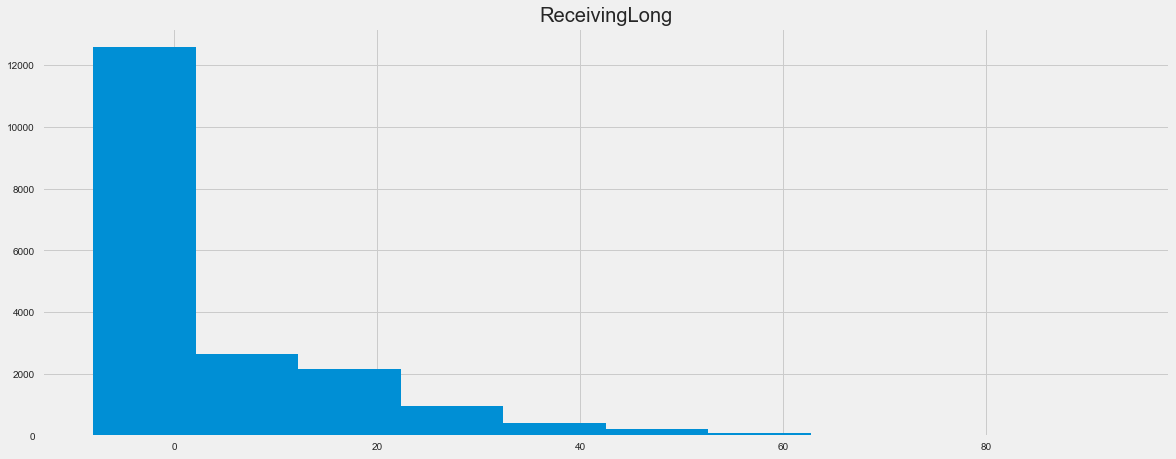

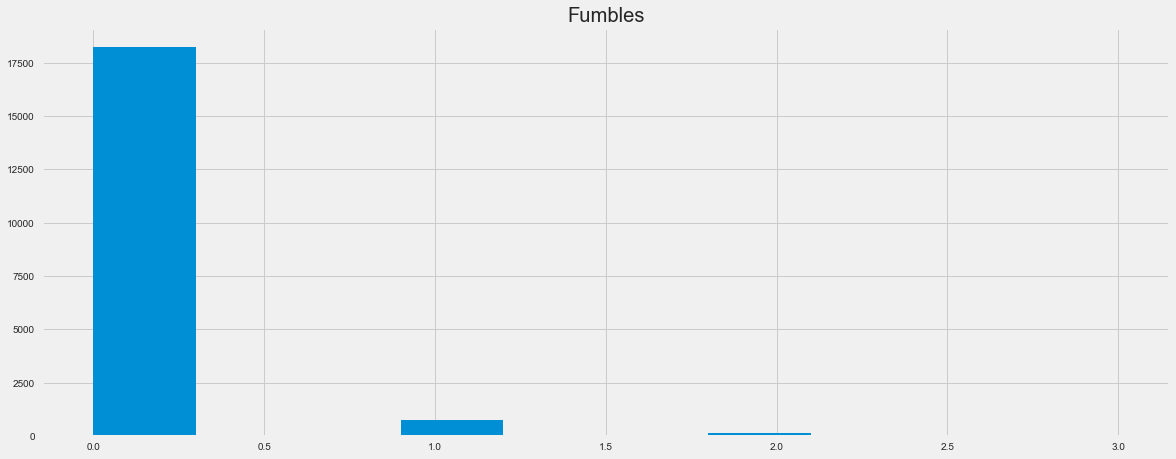

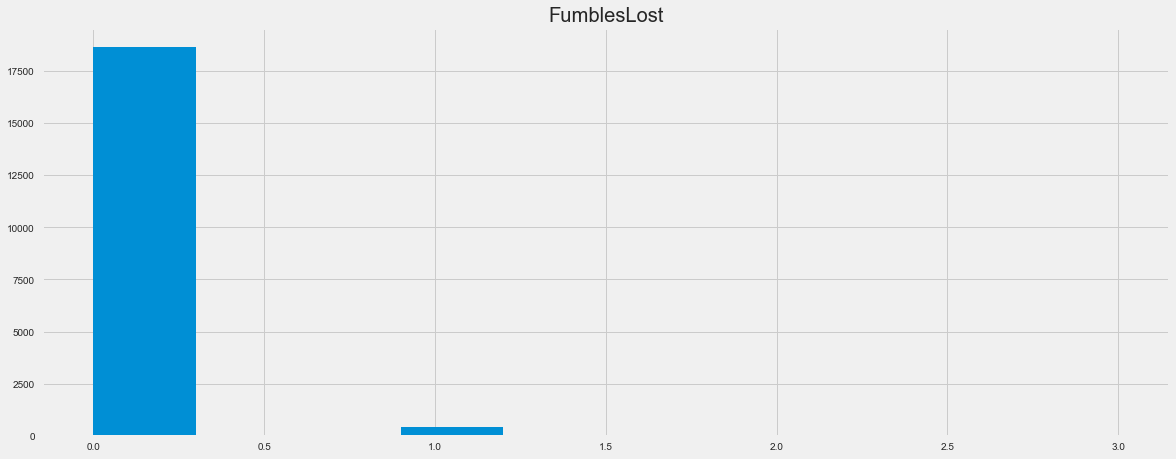

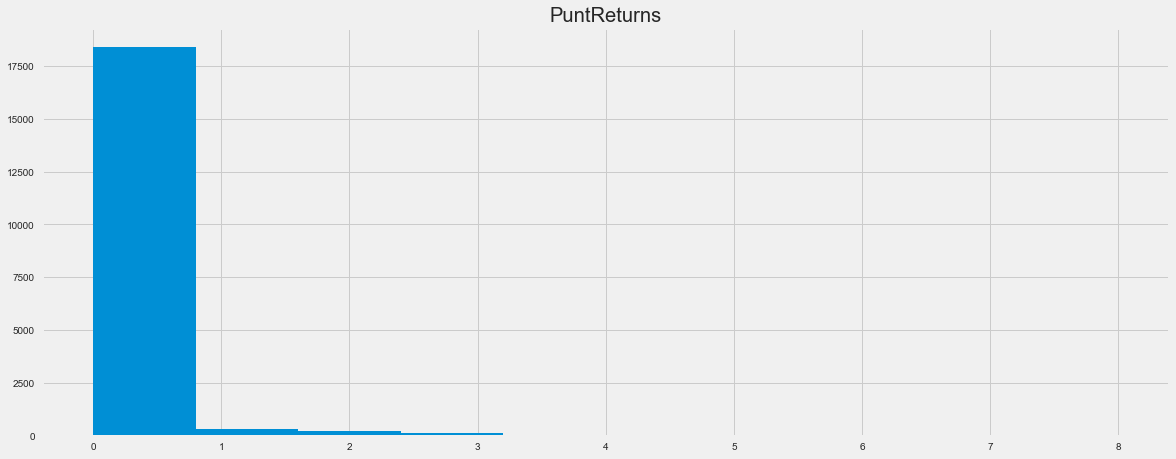

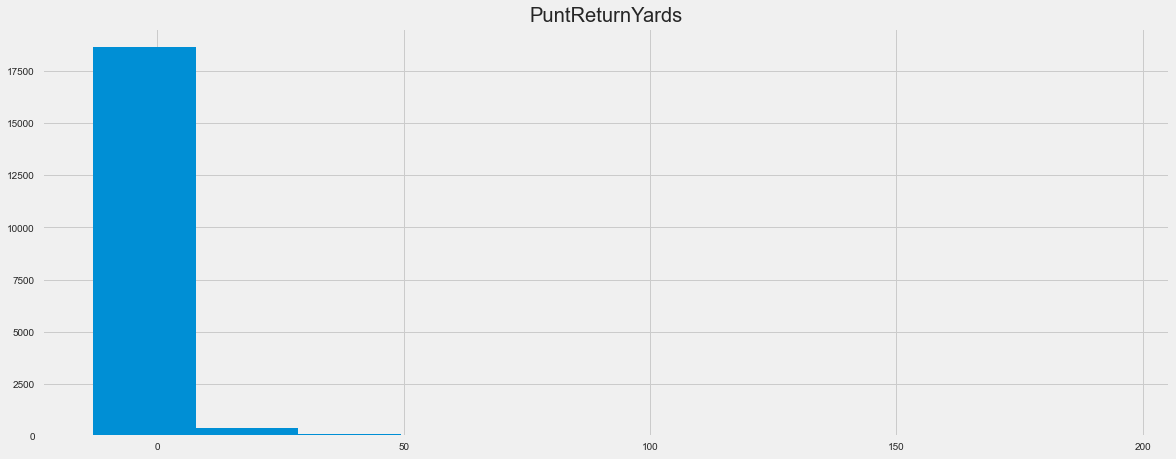

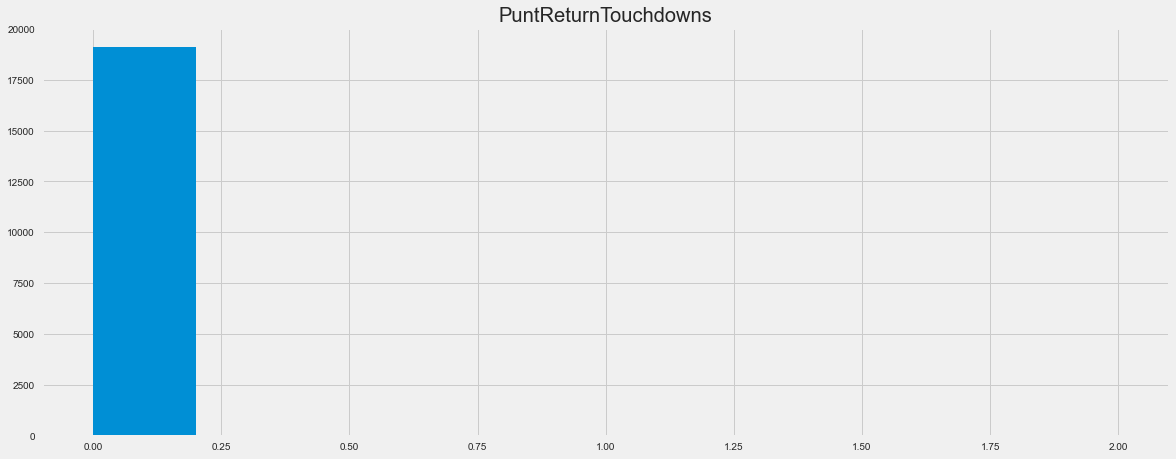

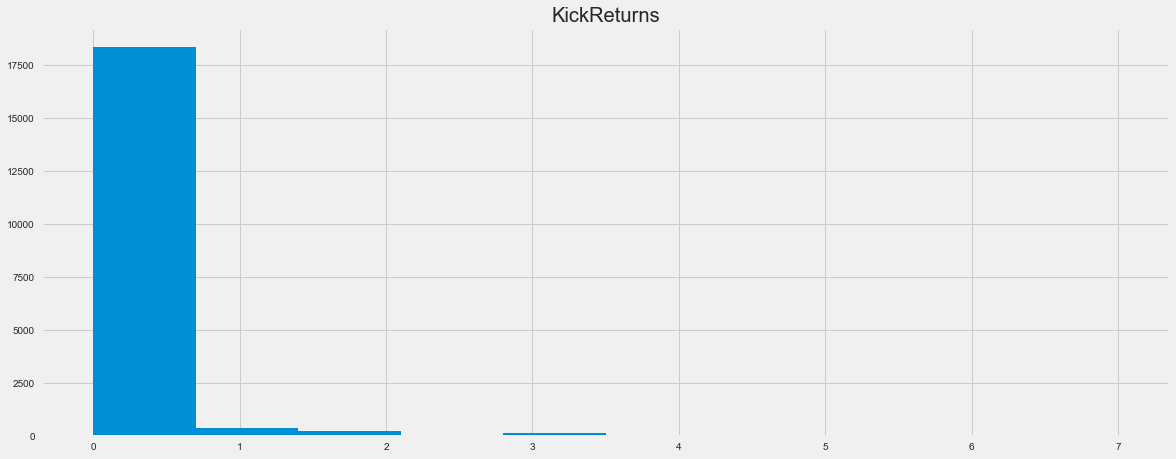

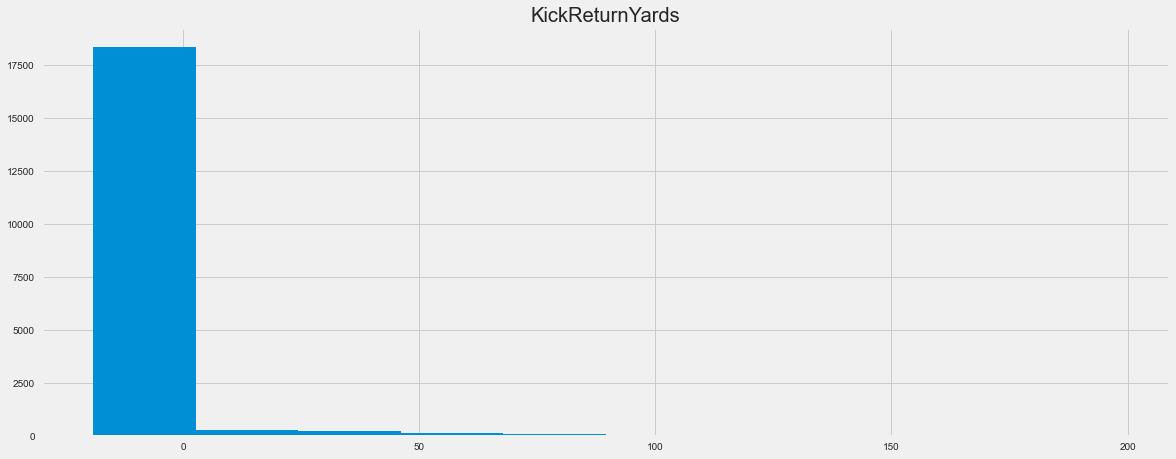

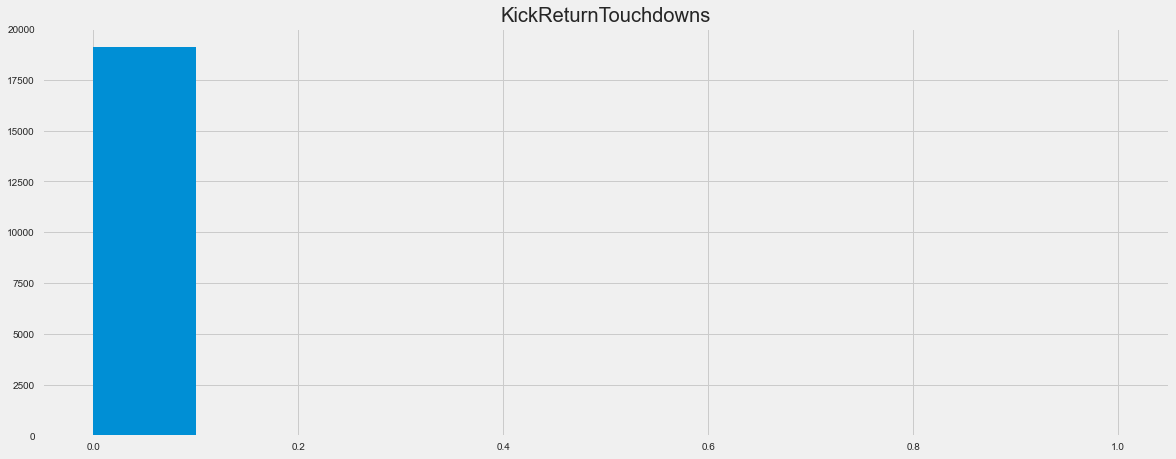

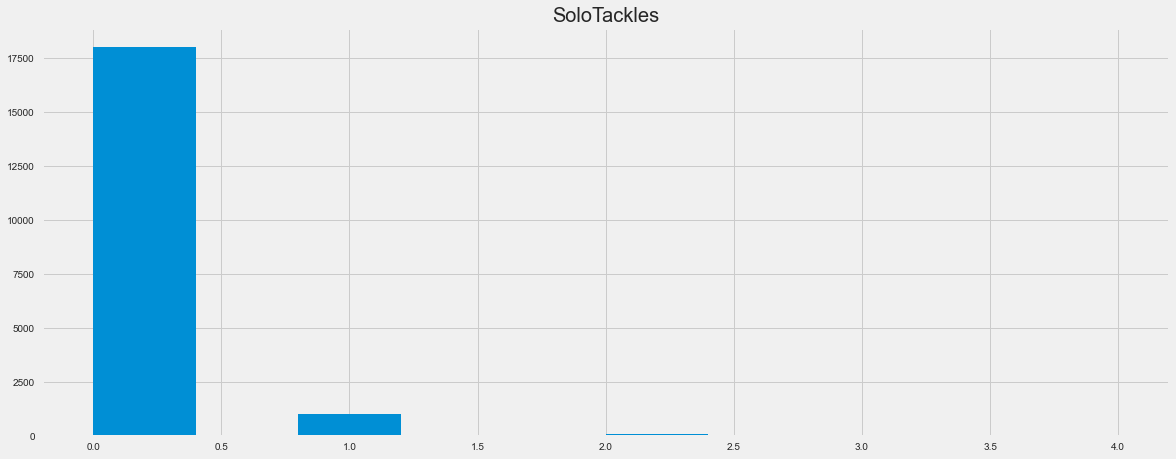

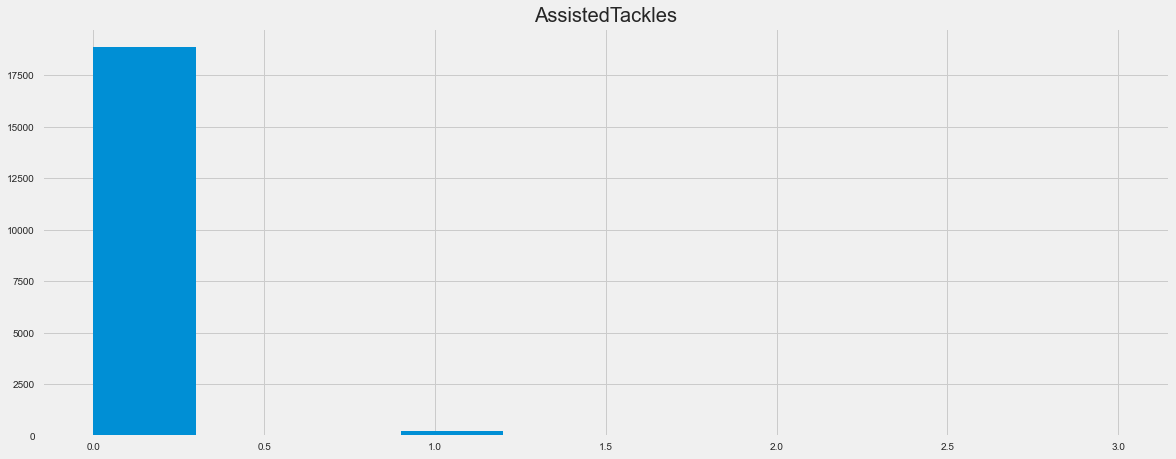

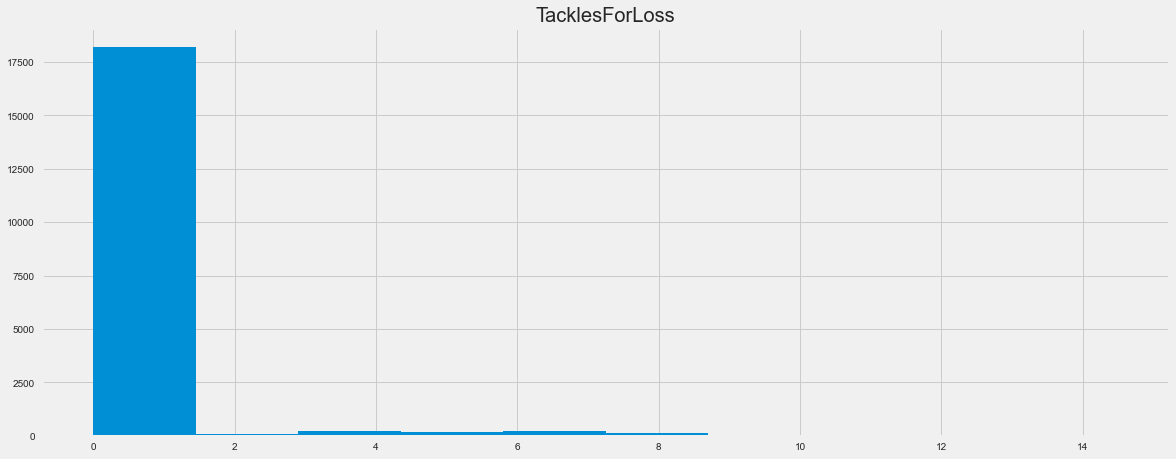

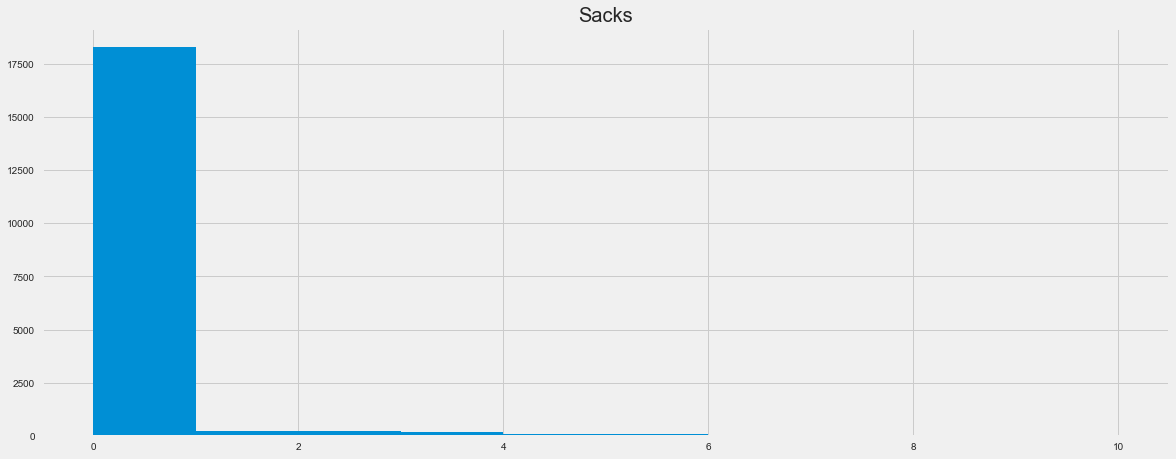

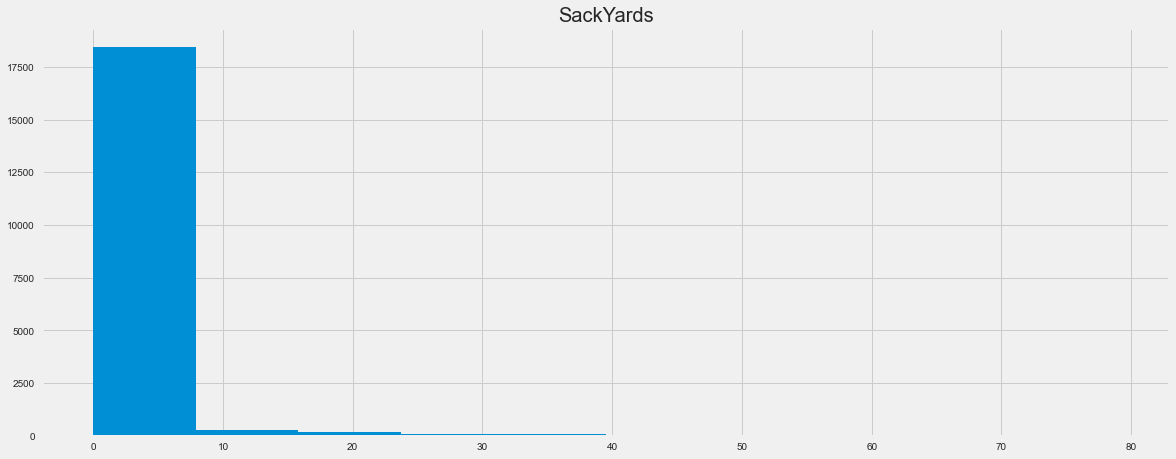

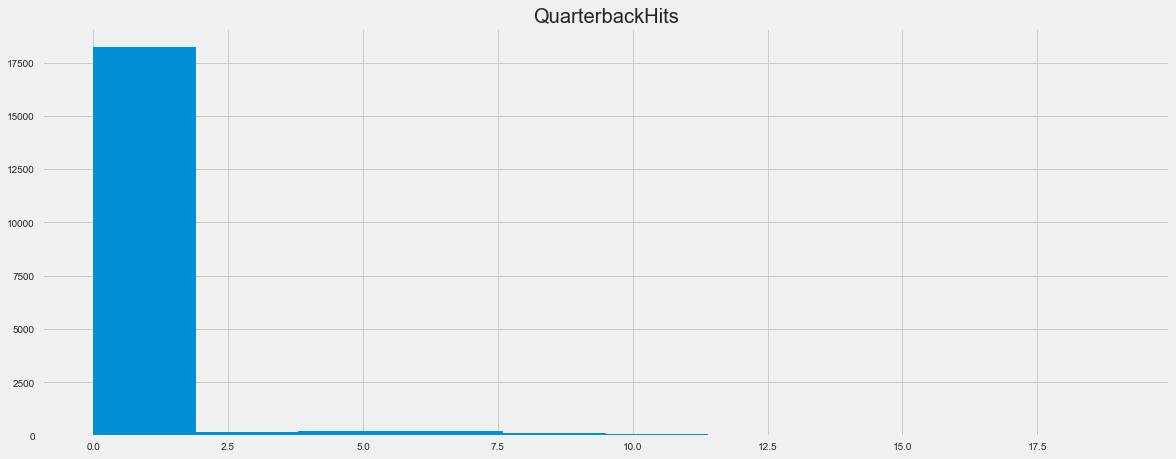

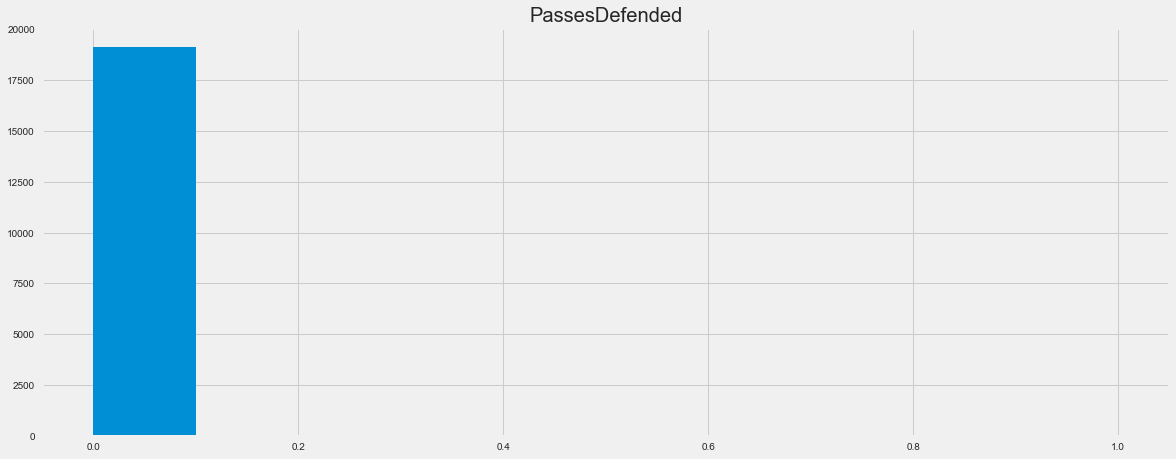

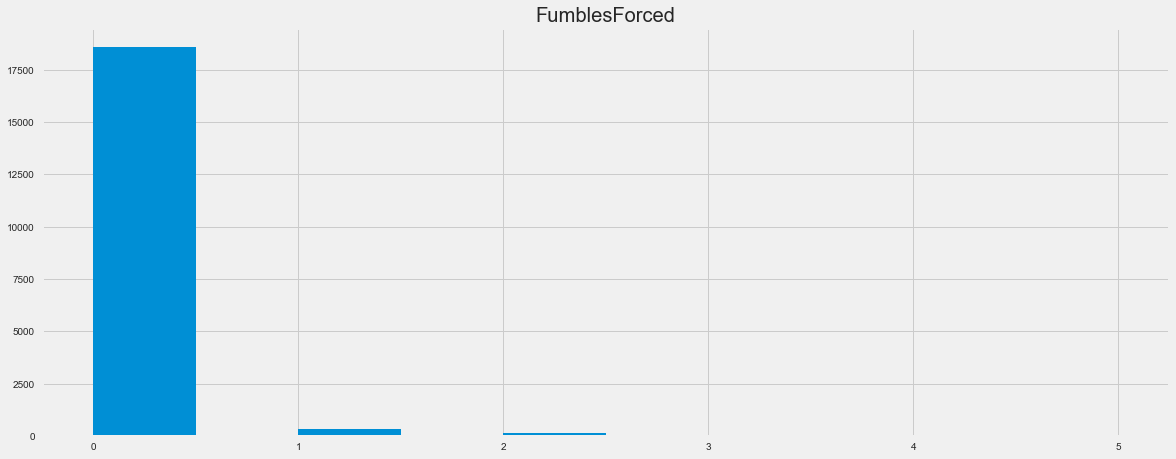

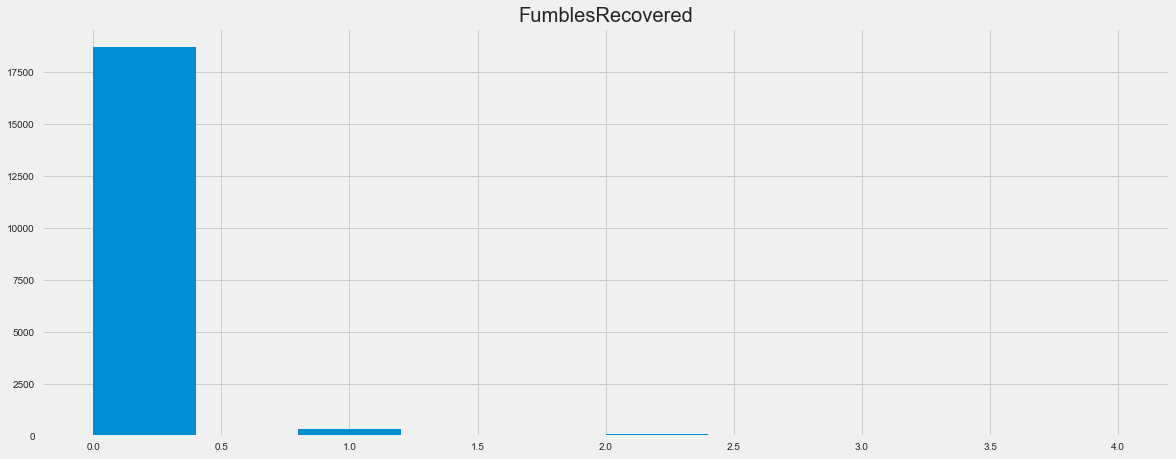

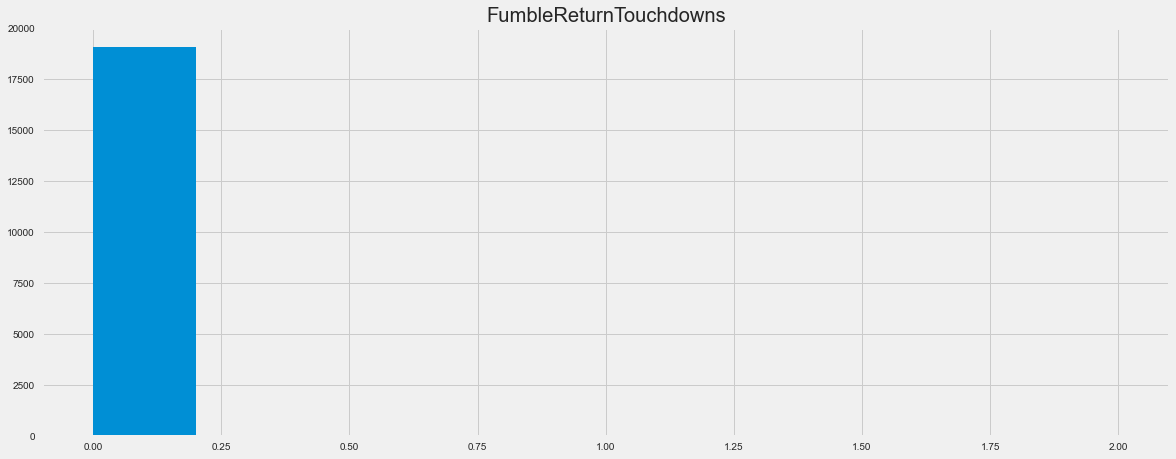

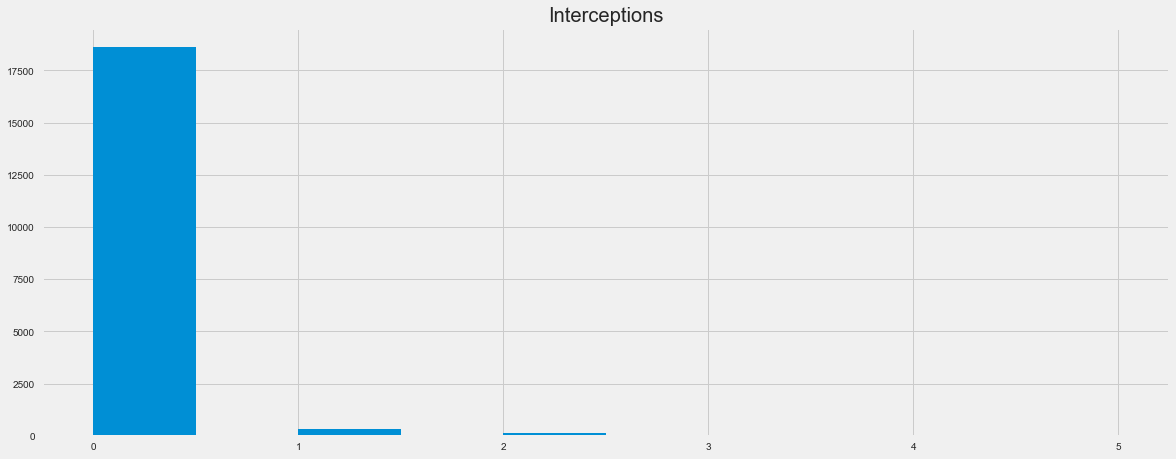

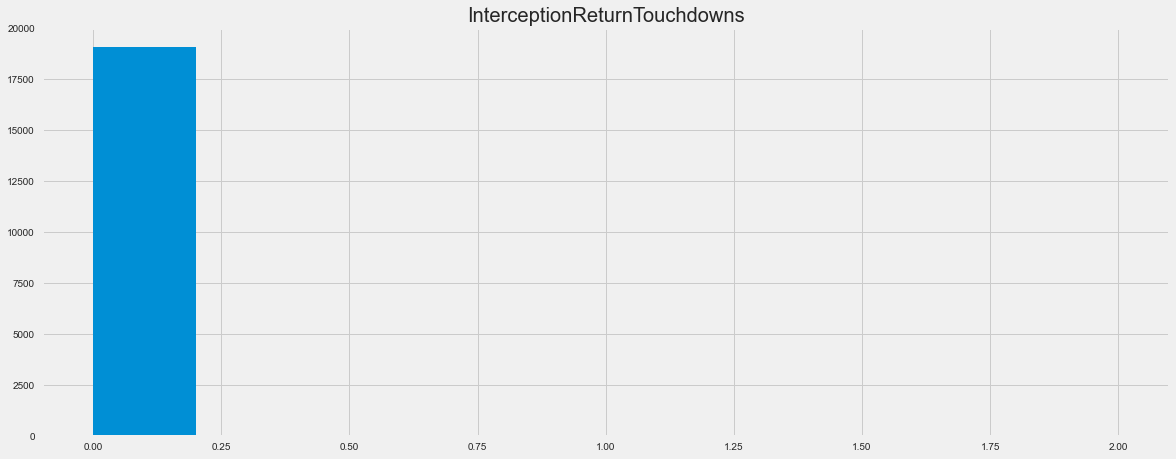

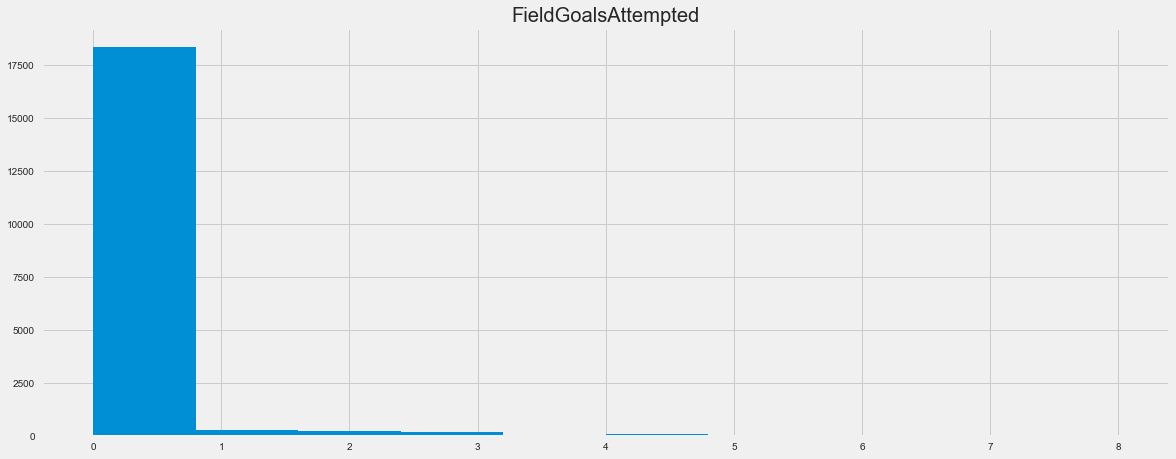

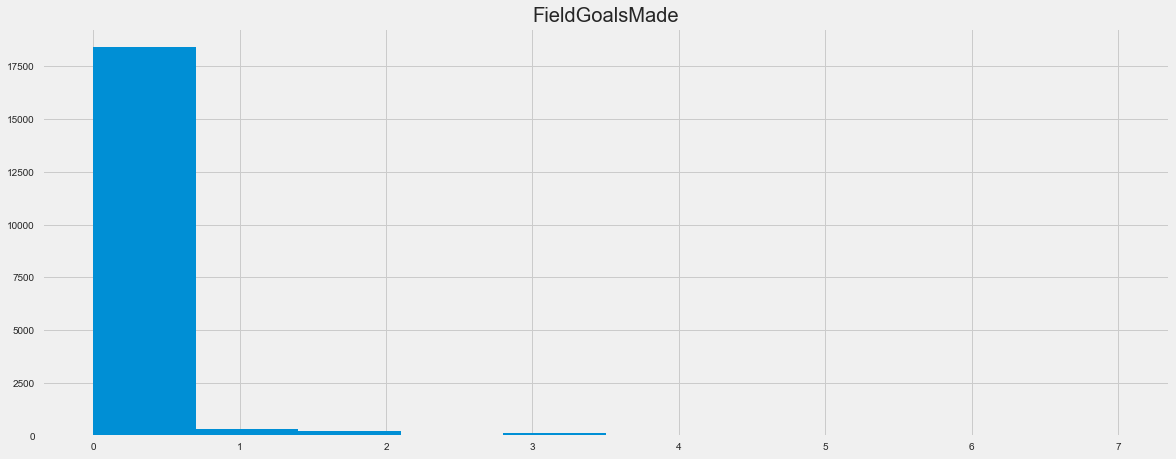

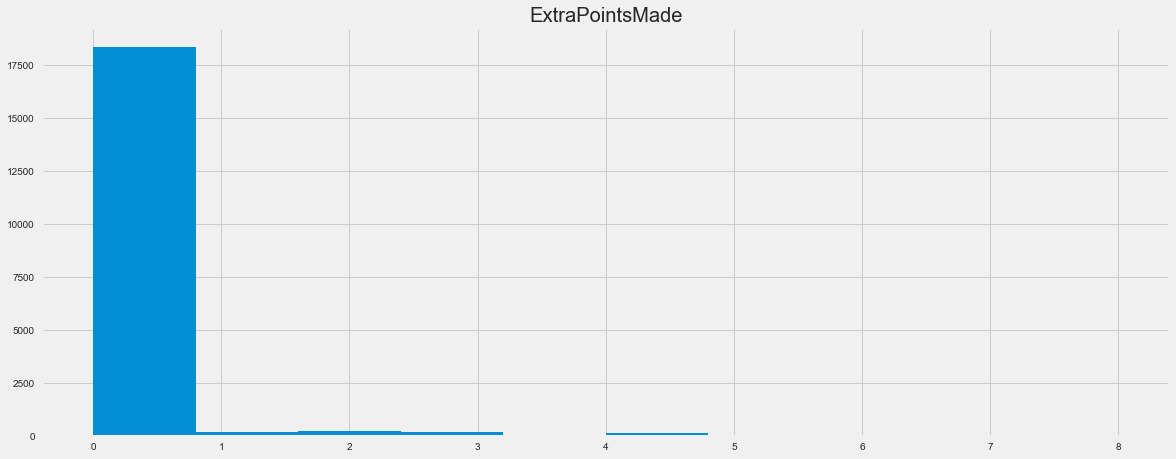

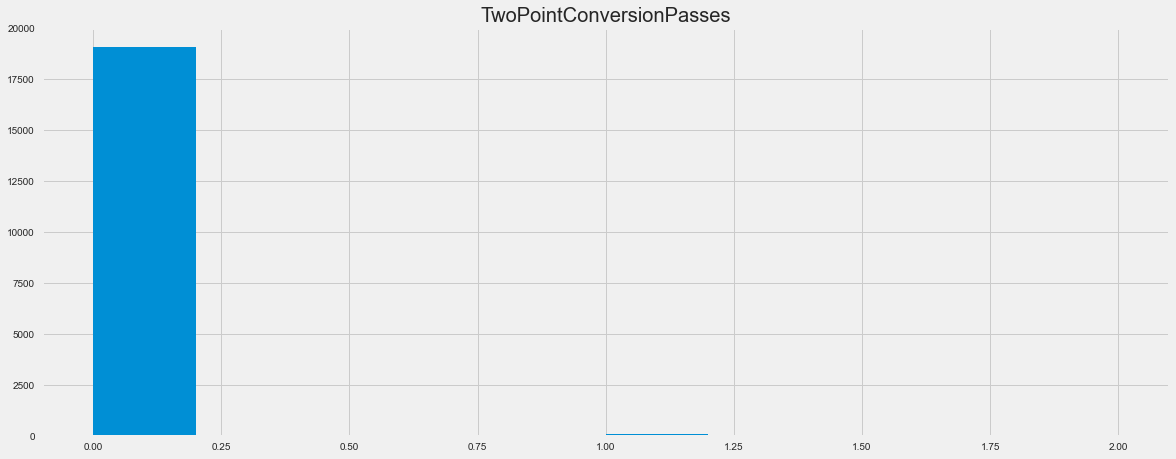

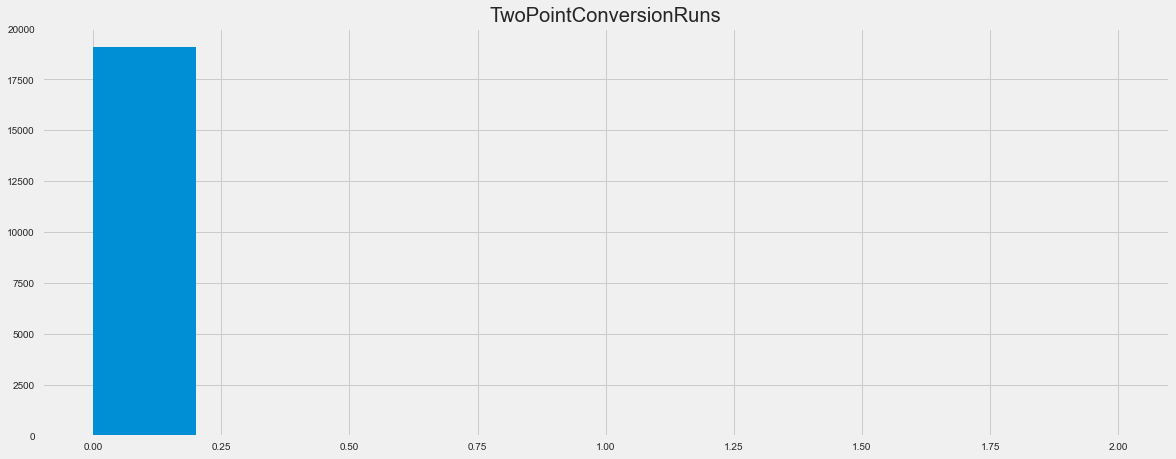

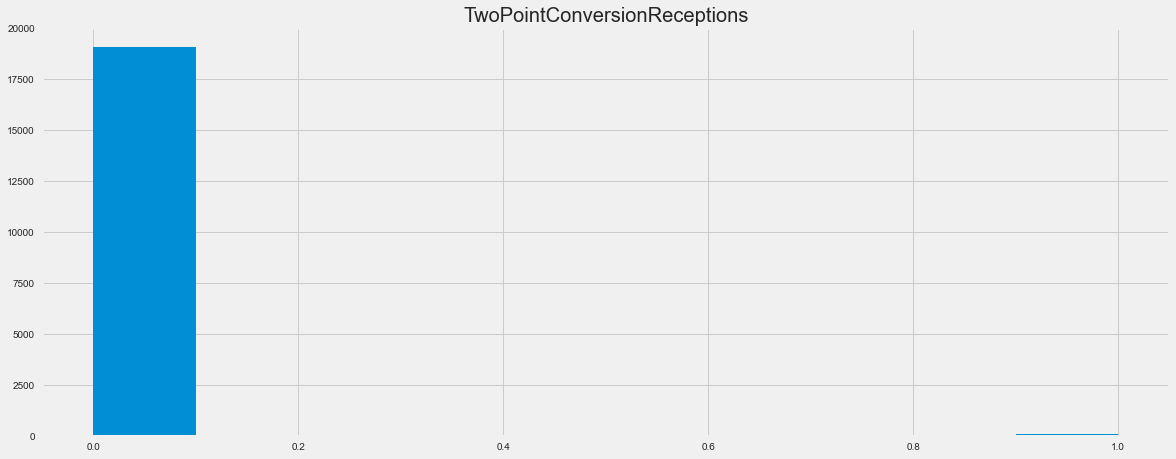

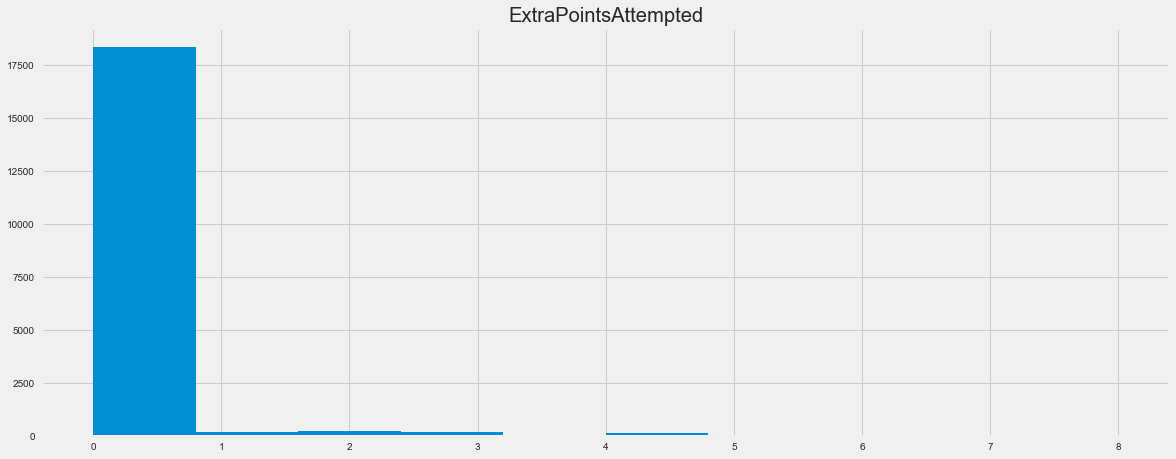

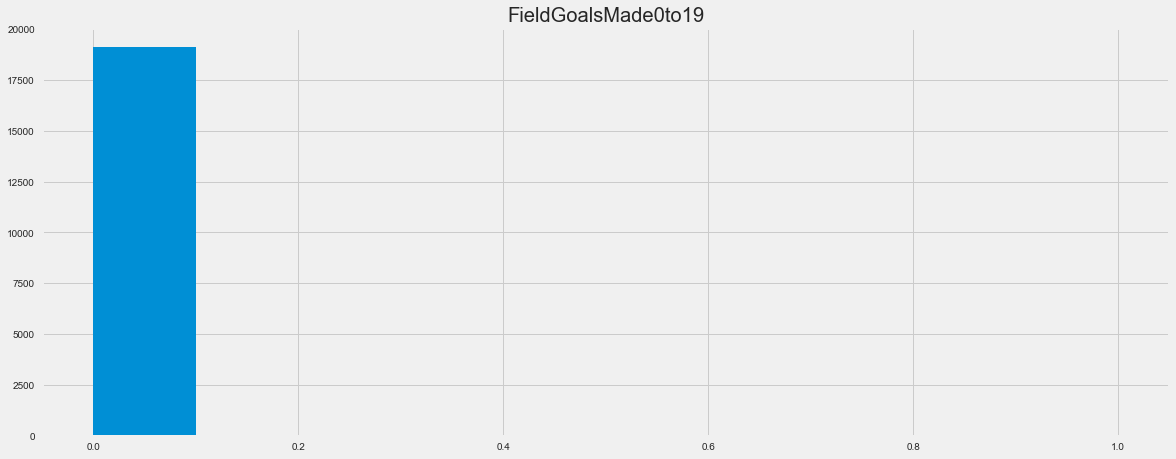

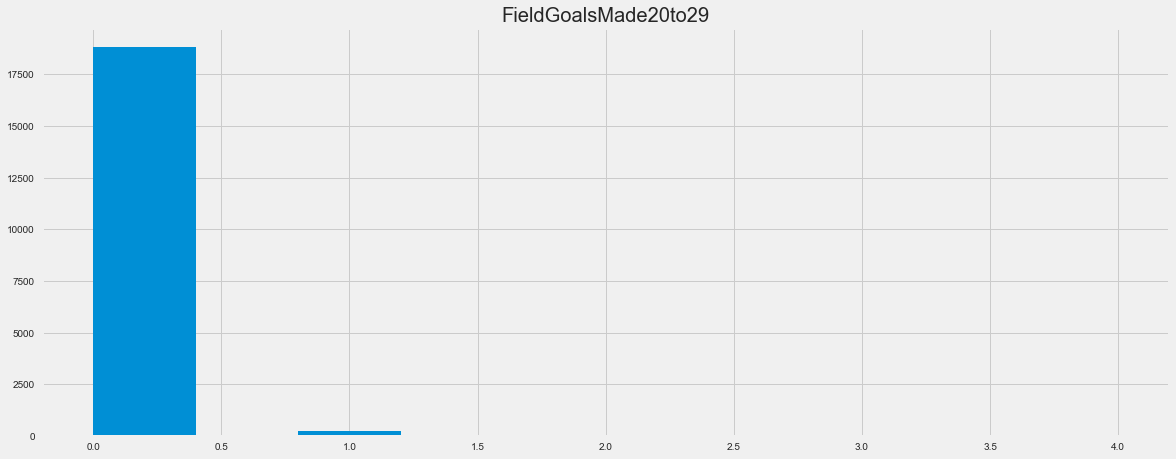

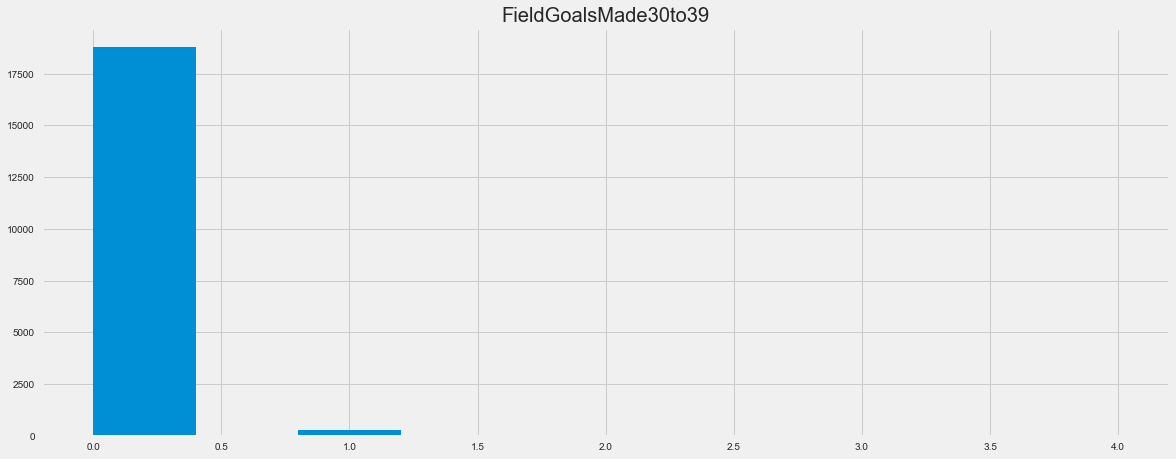

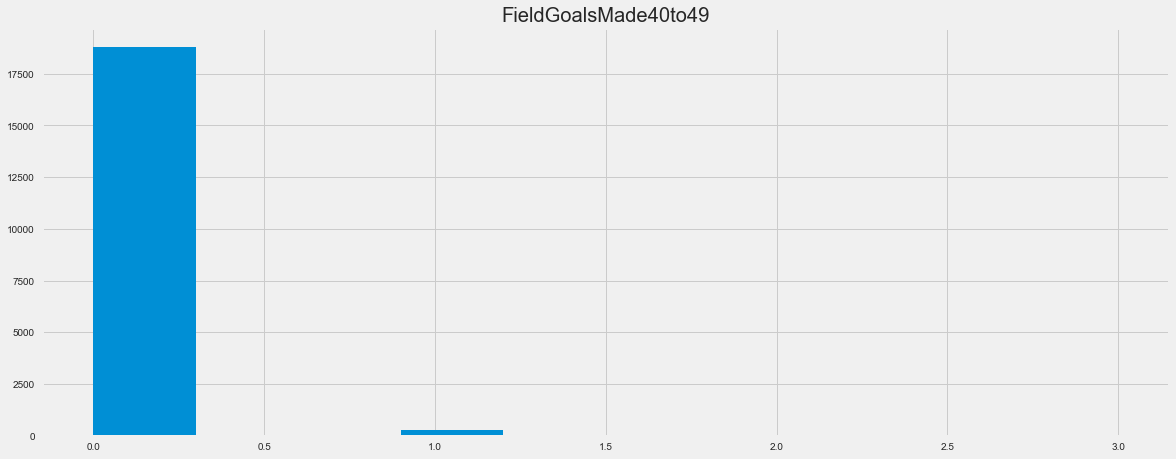

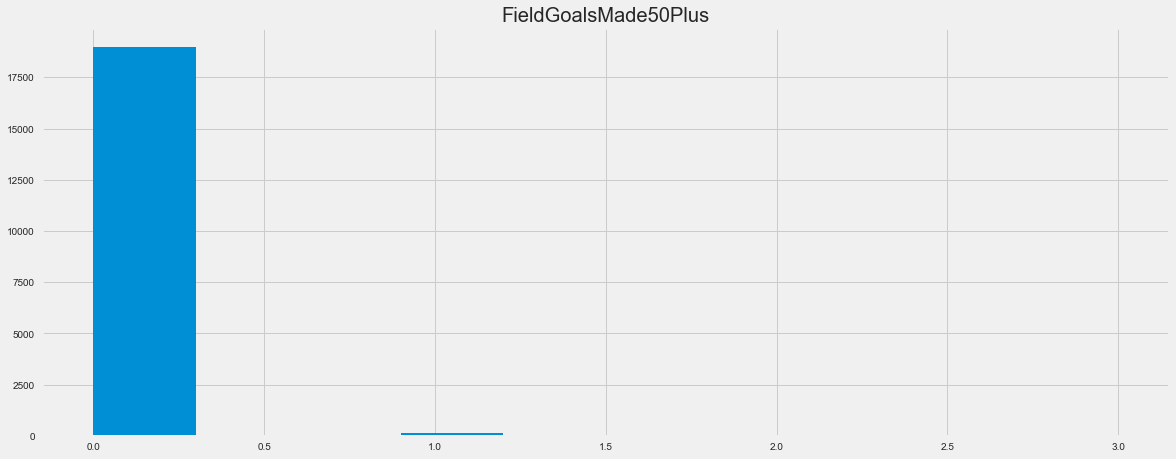

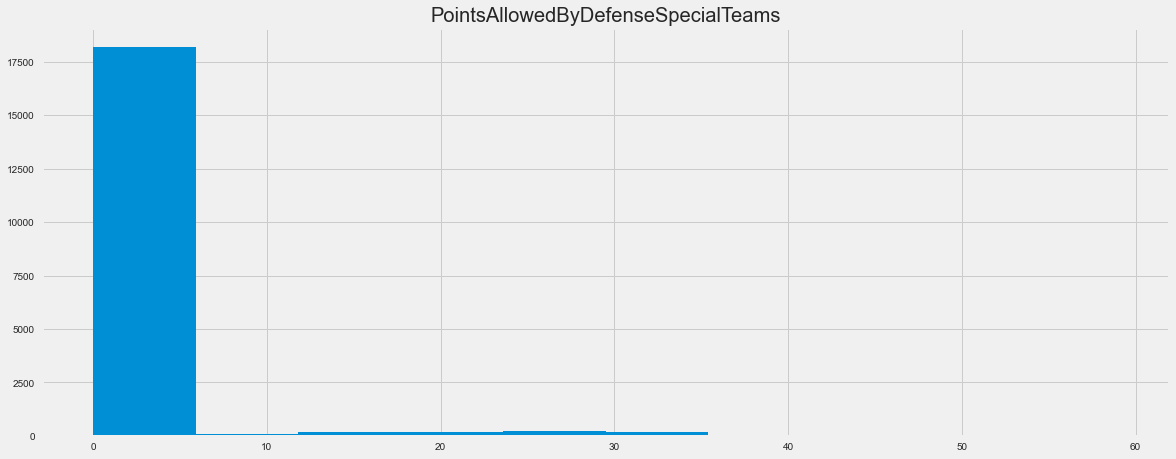

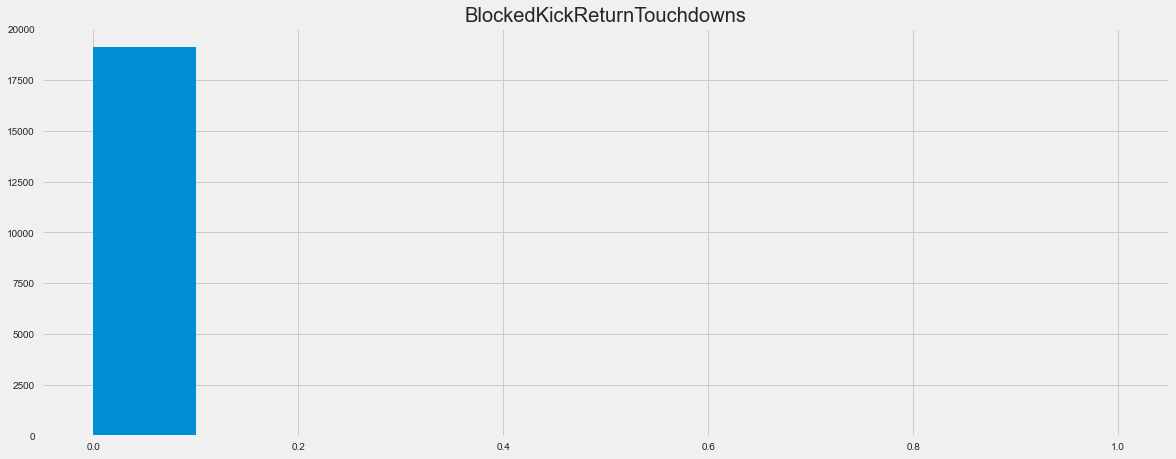

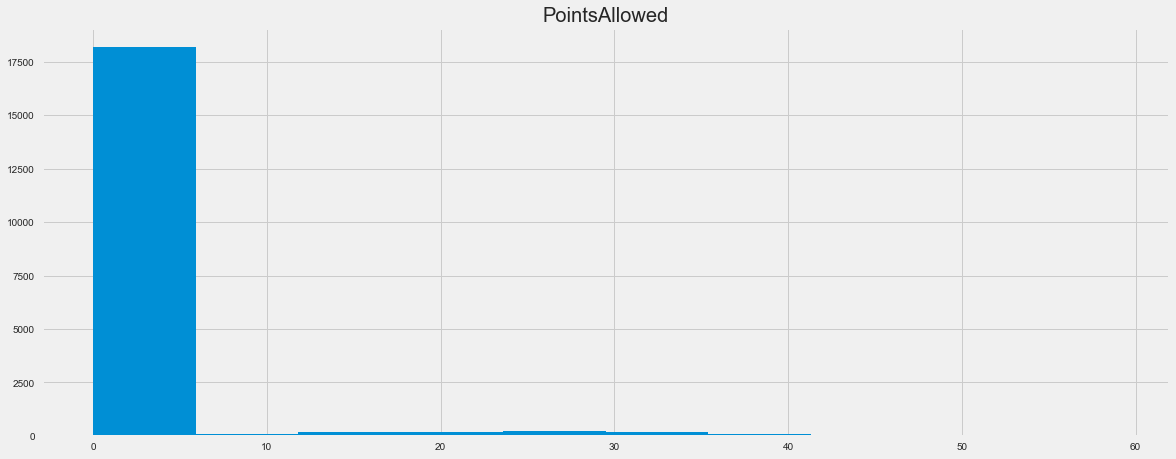

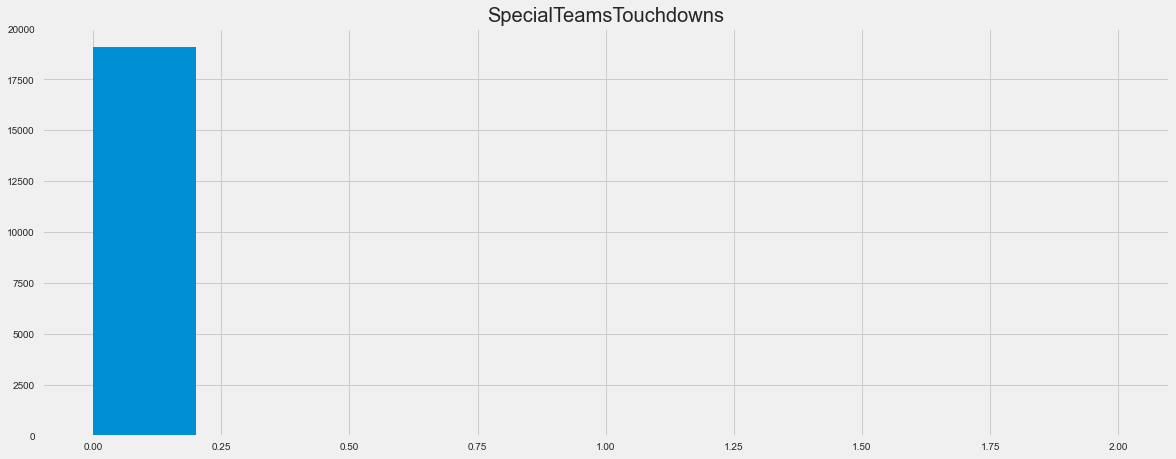

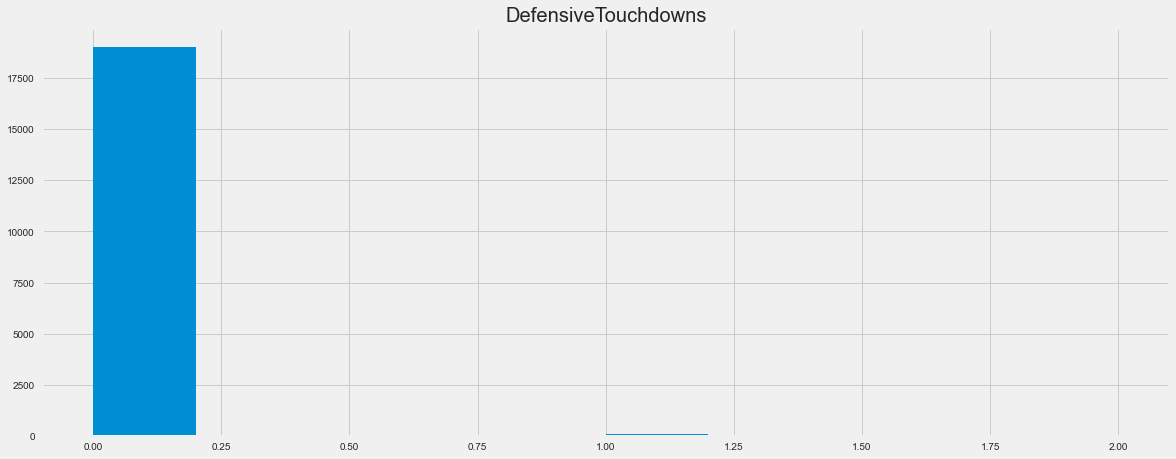

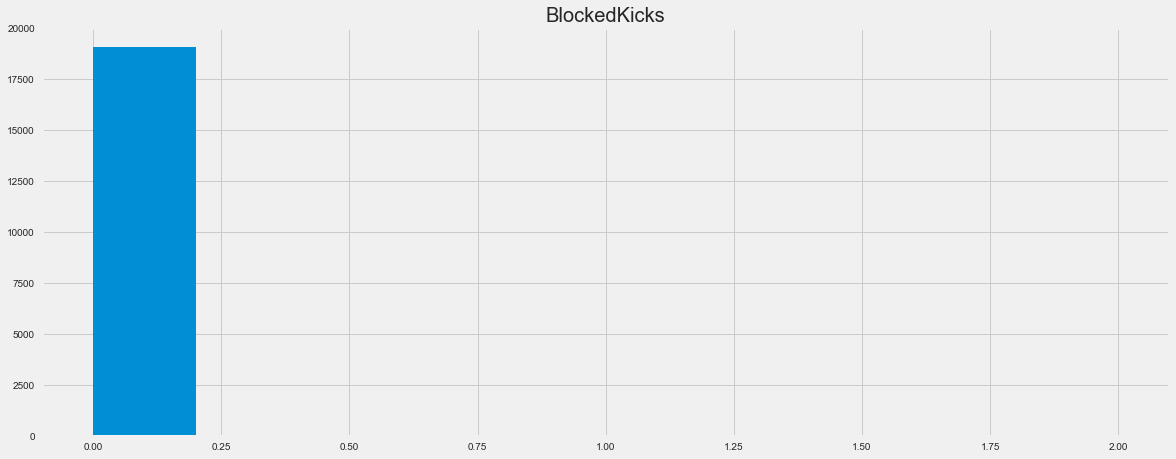

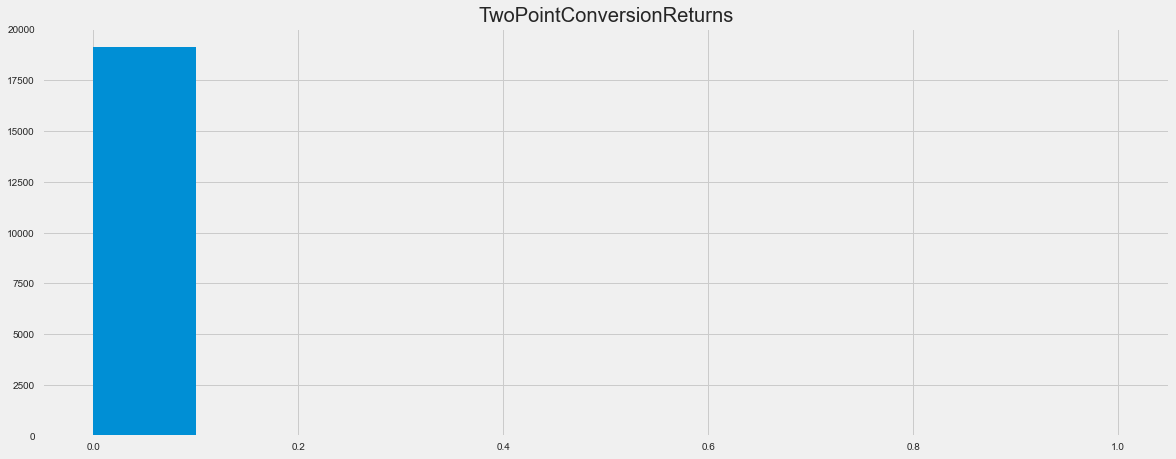

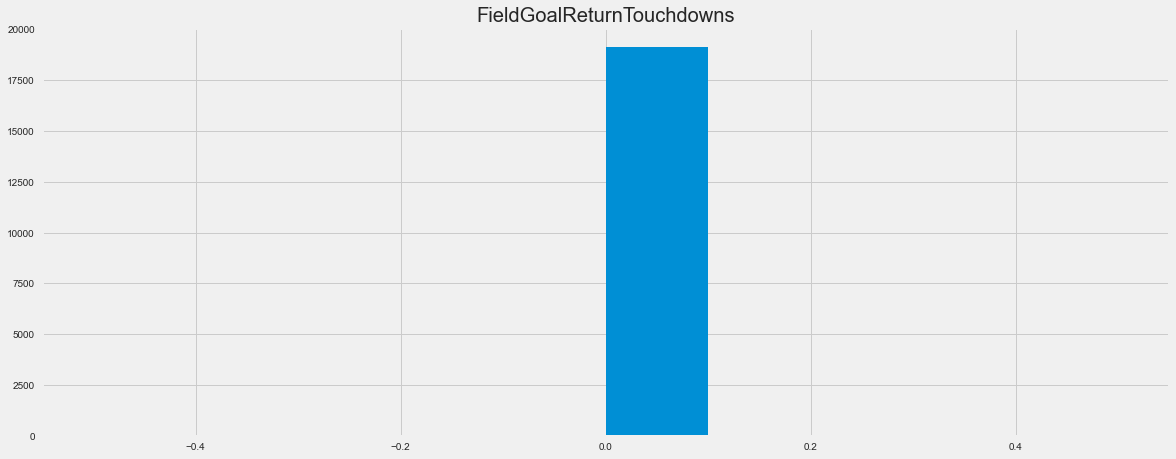

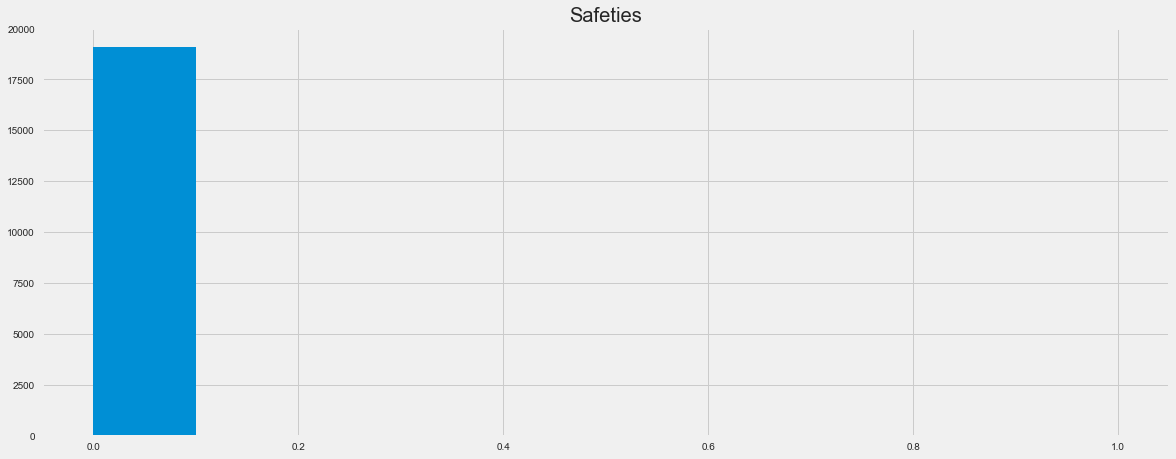

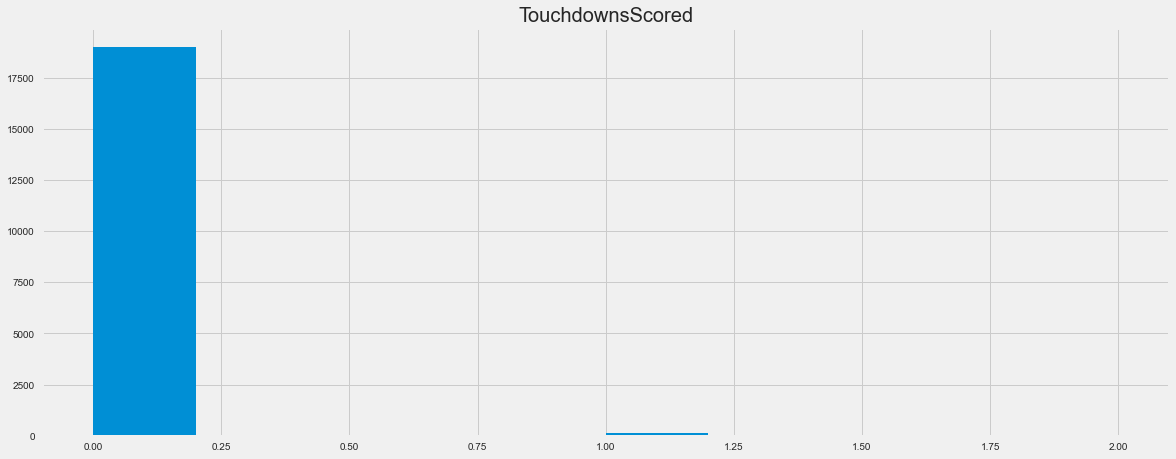

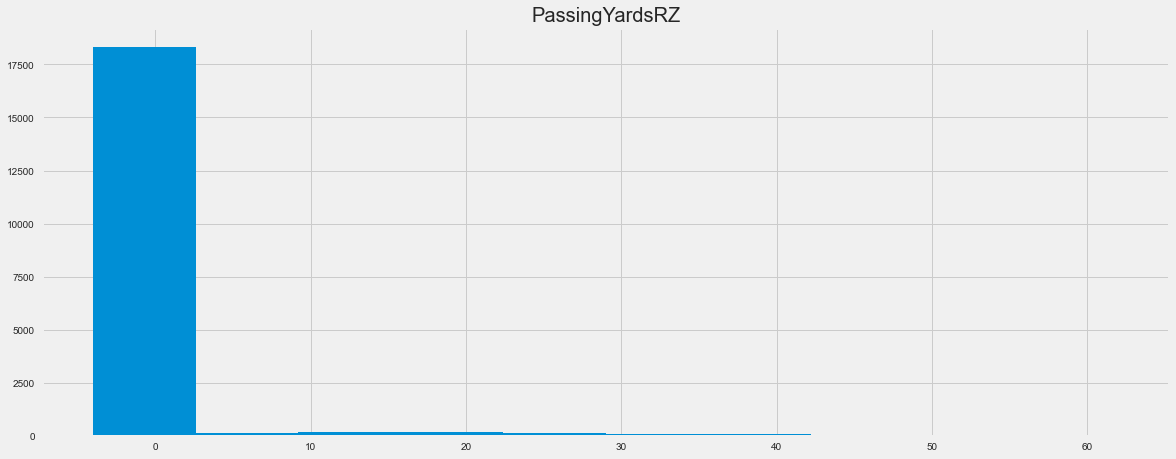

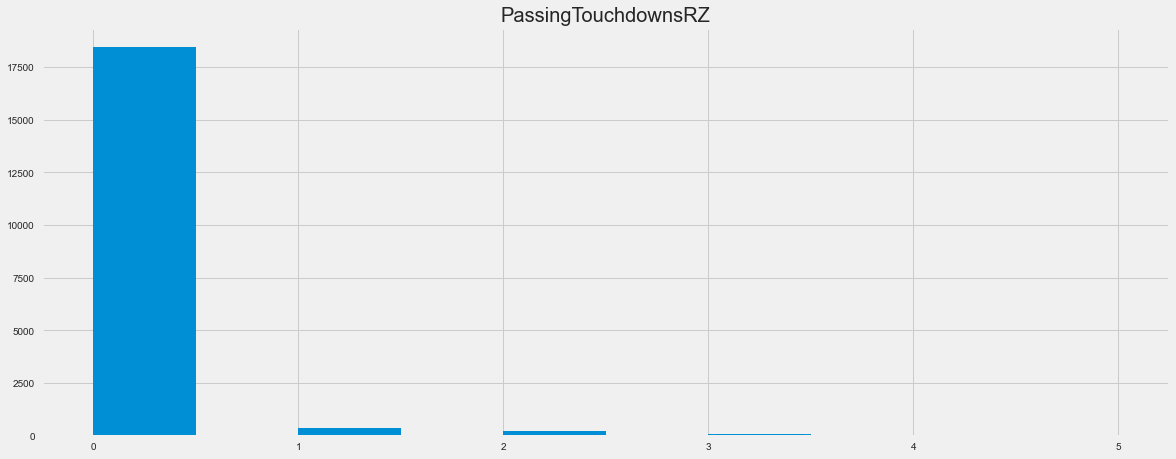

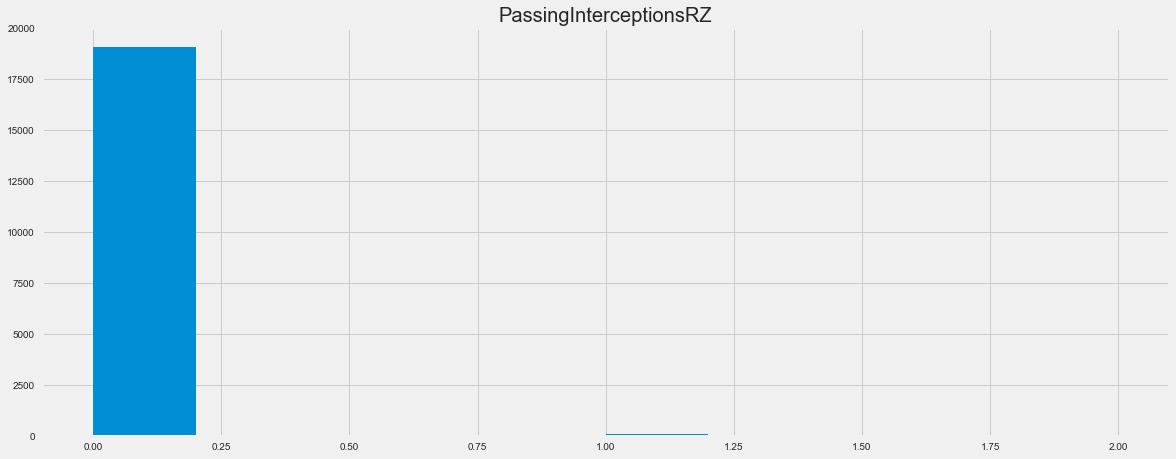

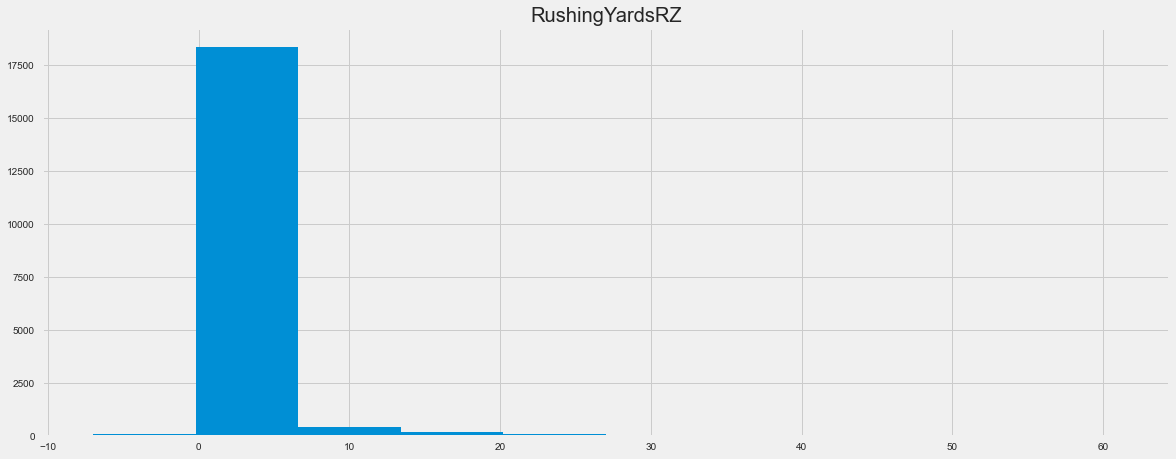

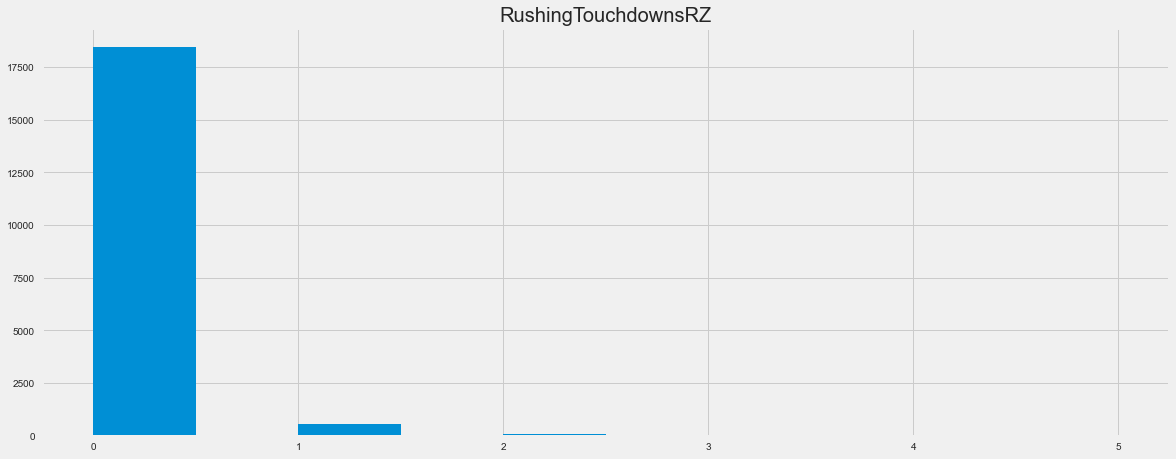

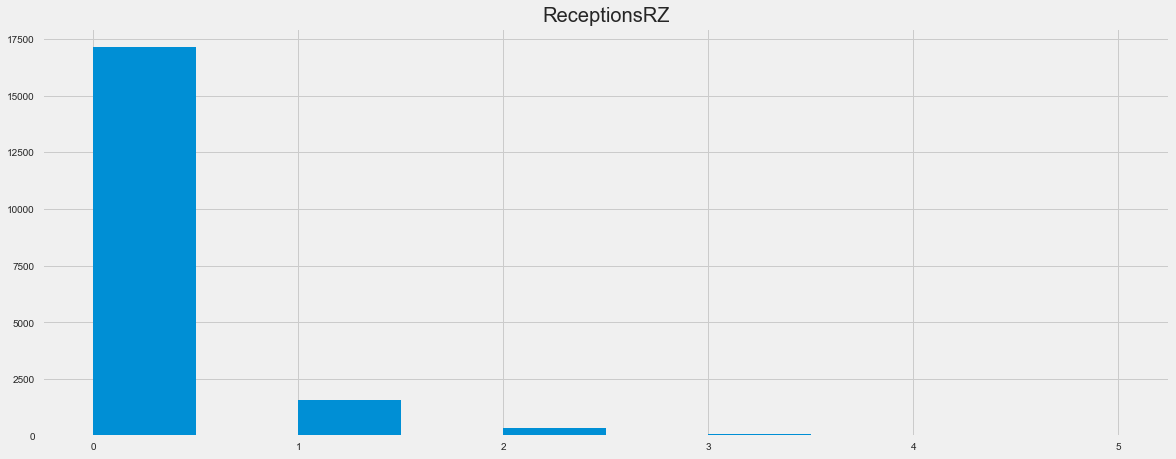

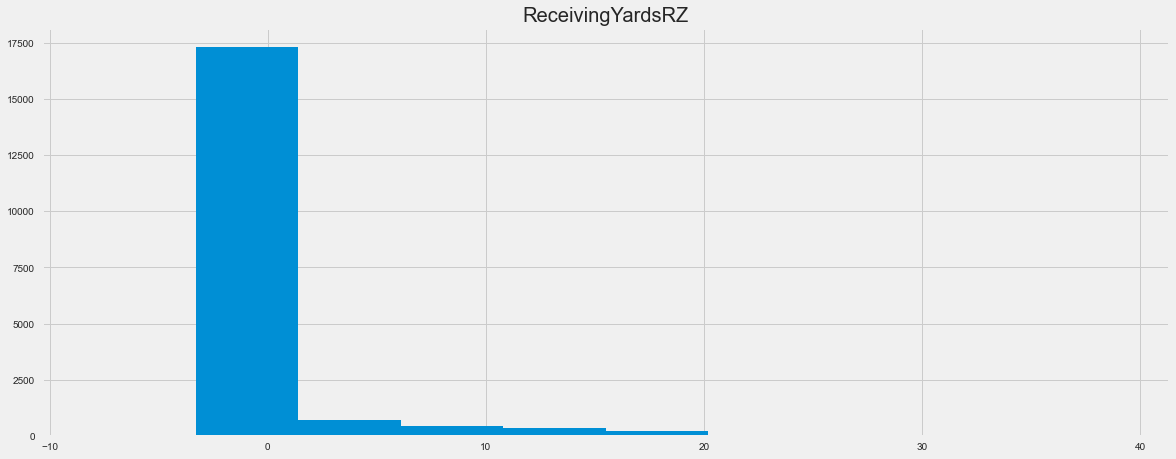

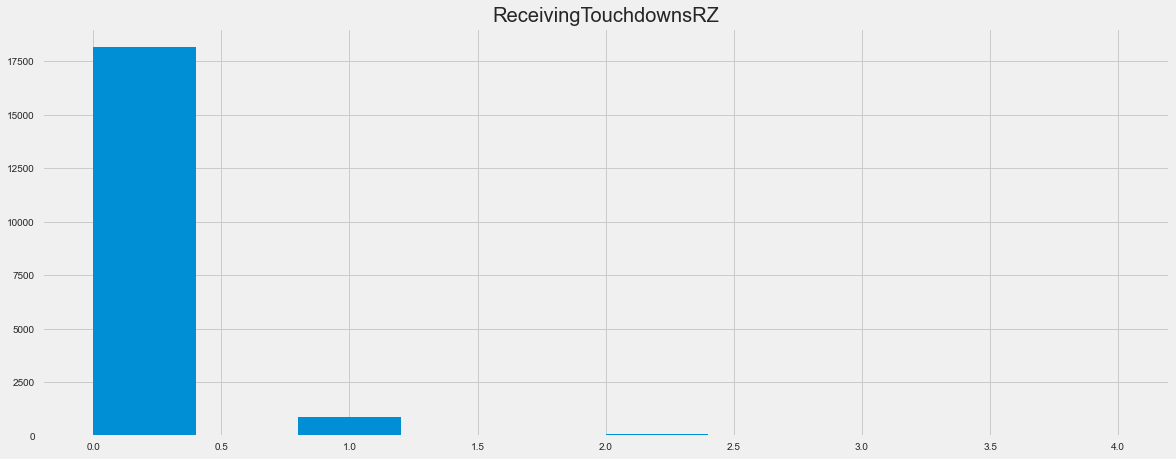

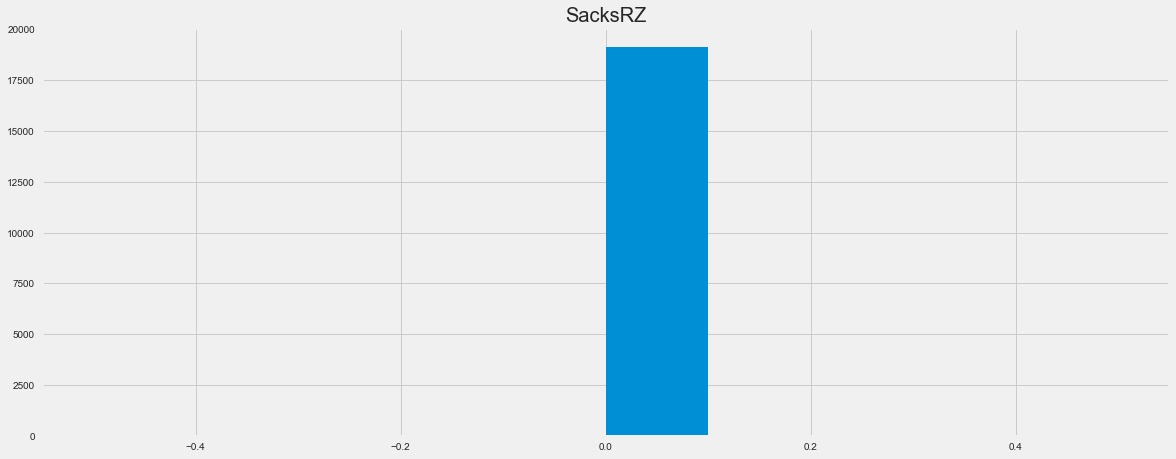

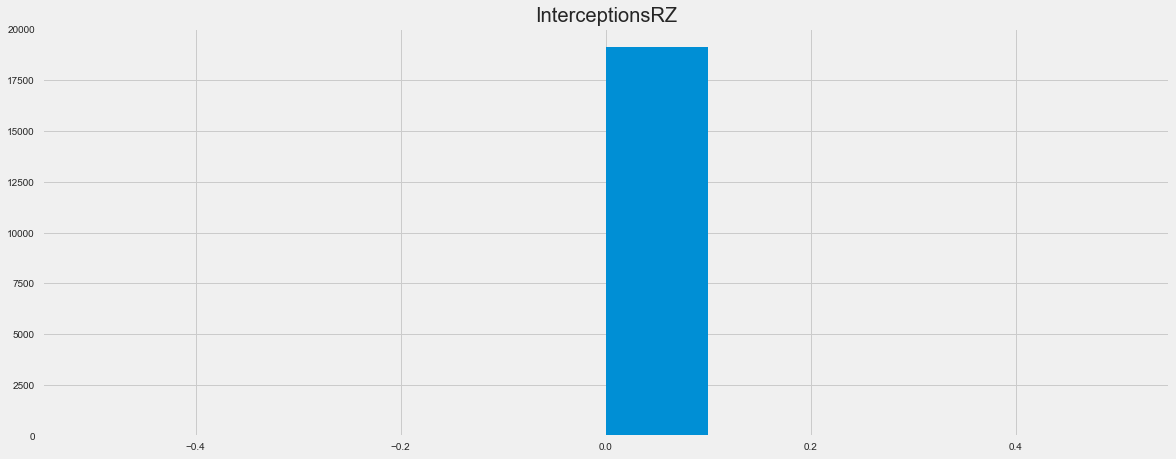

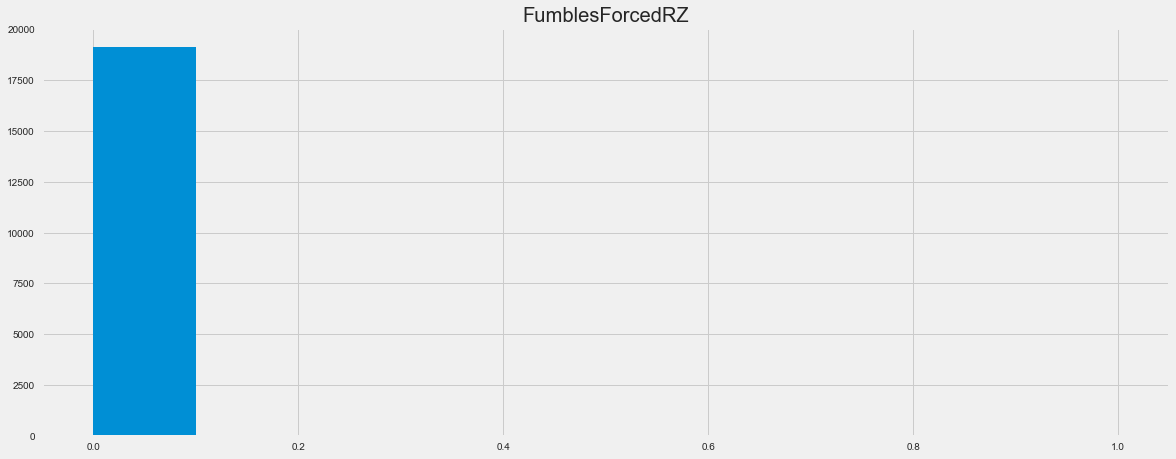

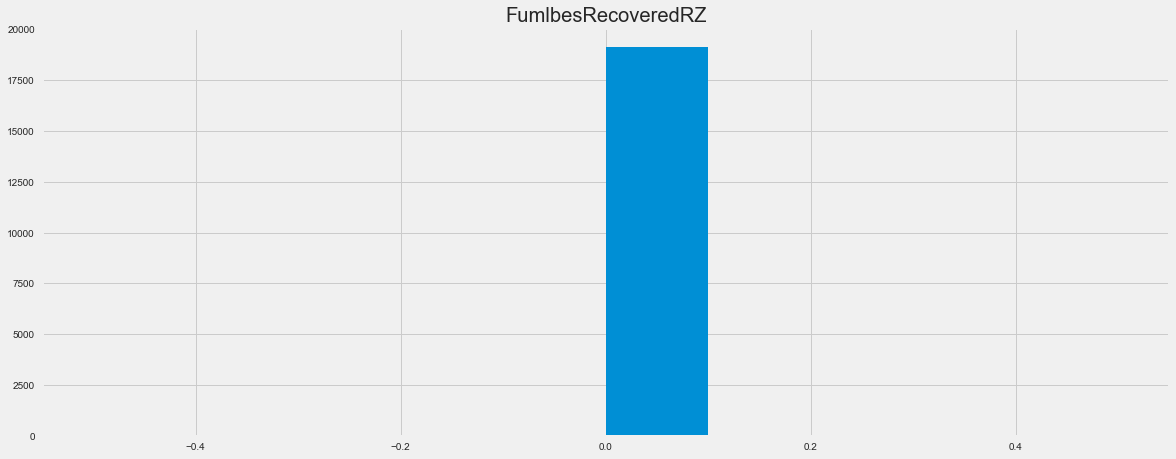

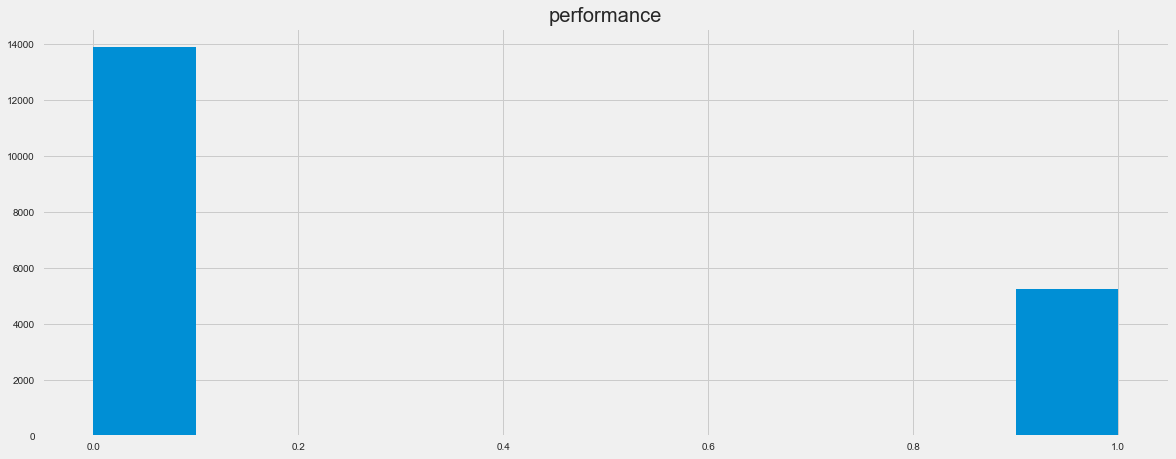

In [68]:
for col in boxplot_cols:
    
    df[col].hist()
    plt.title(col)
    plt.show()
    
    plt.close()

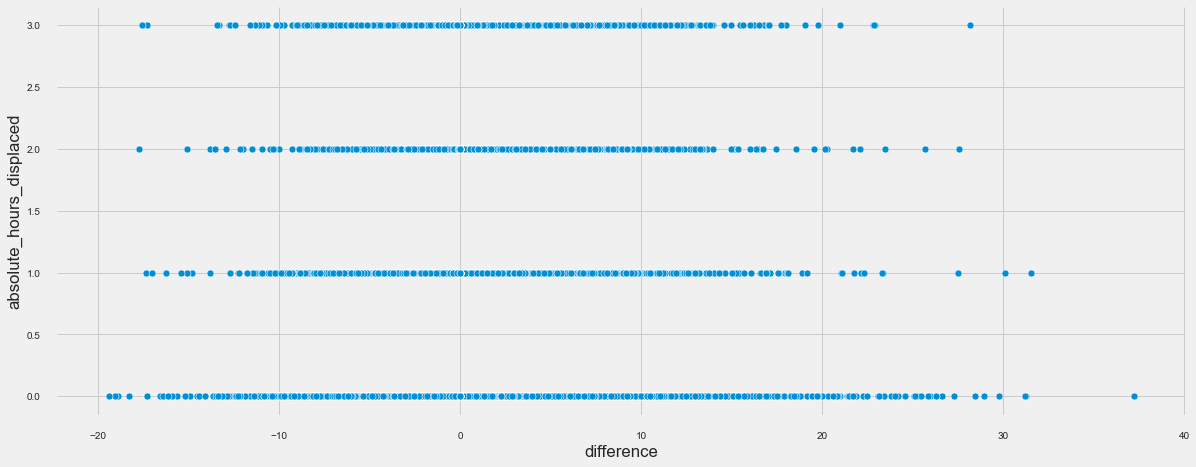

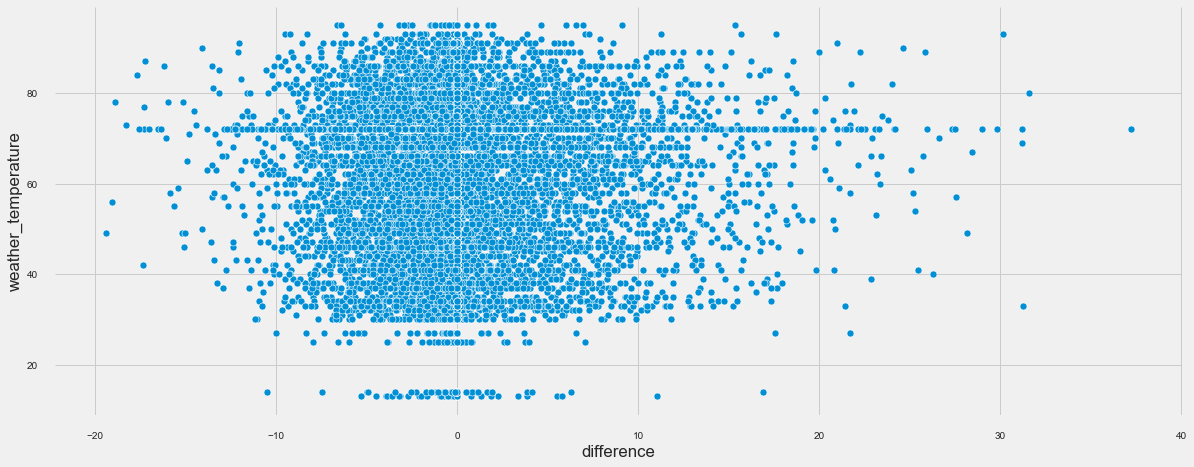

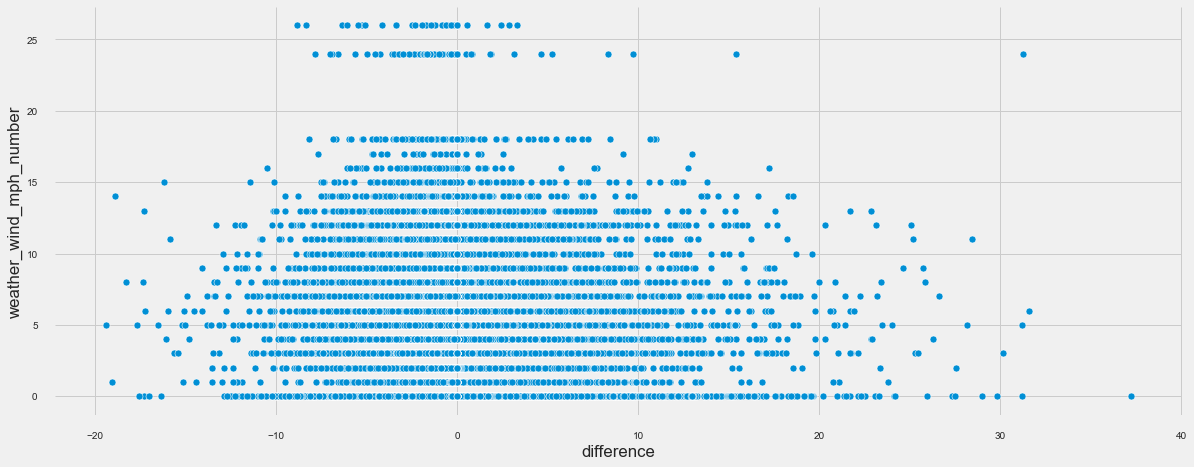

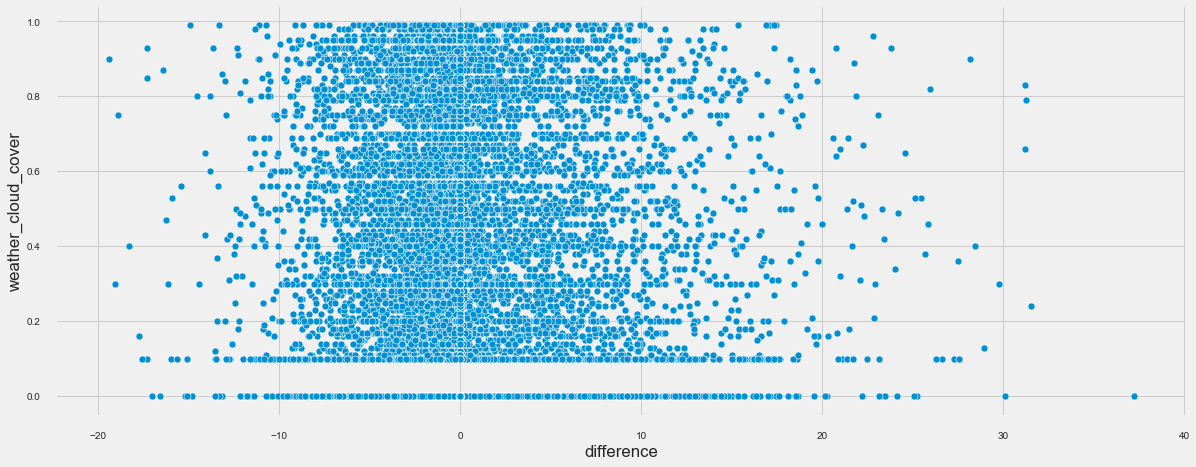

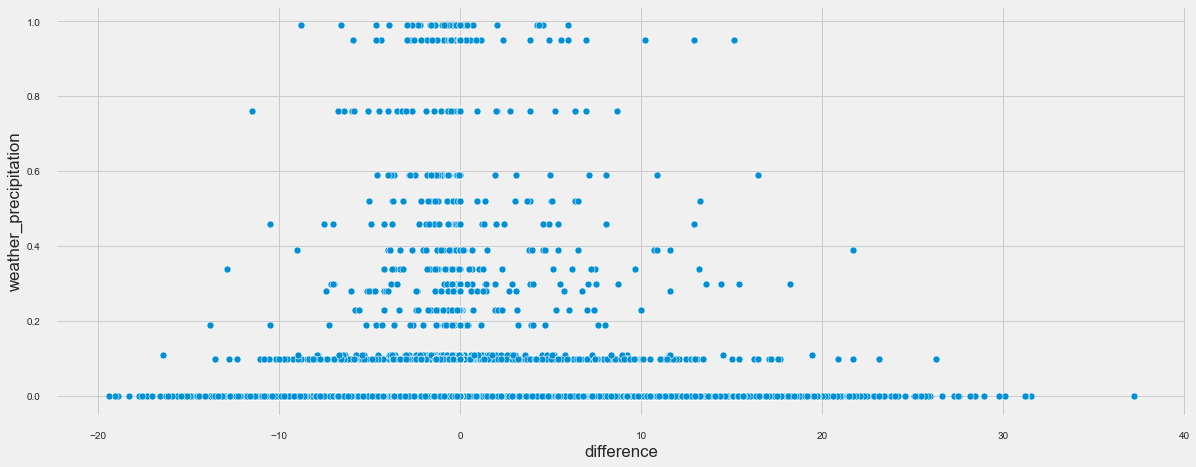

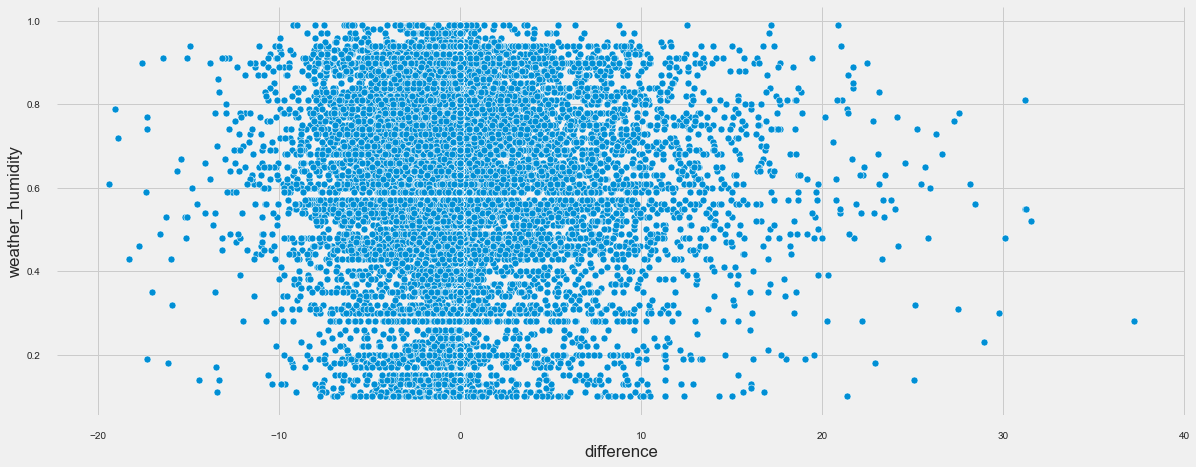

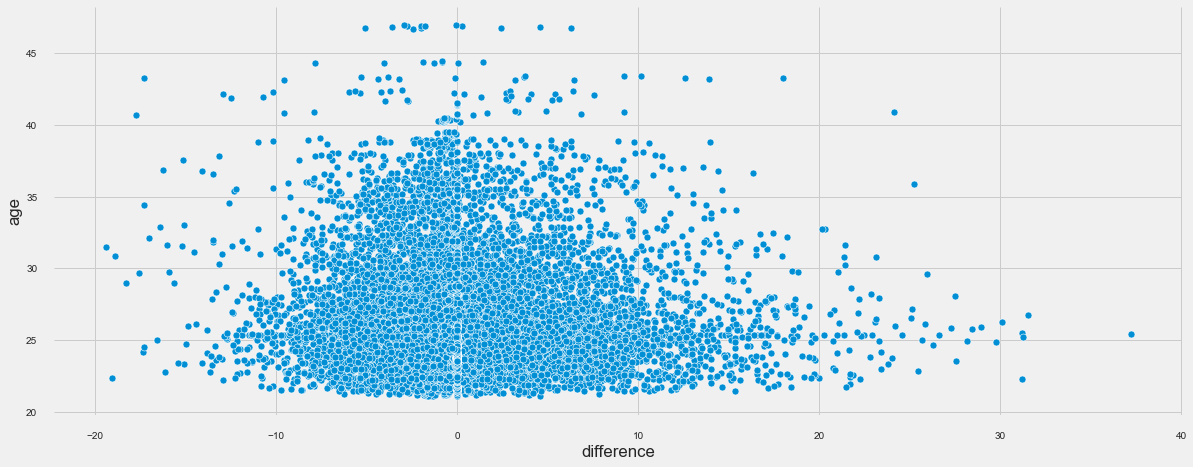

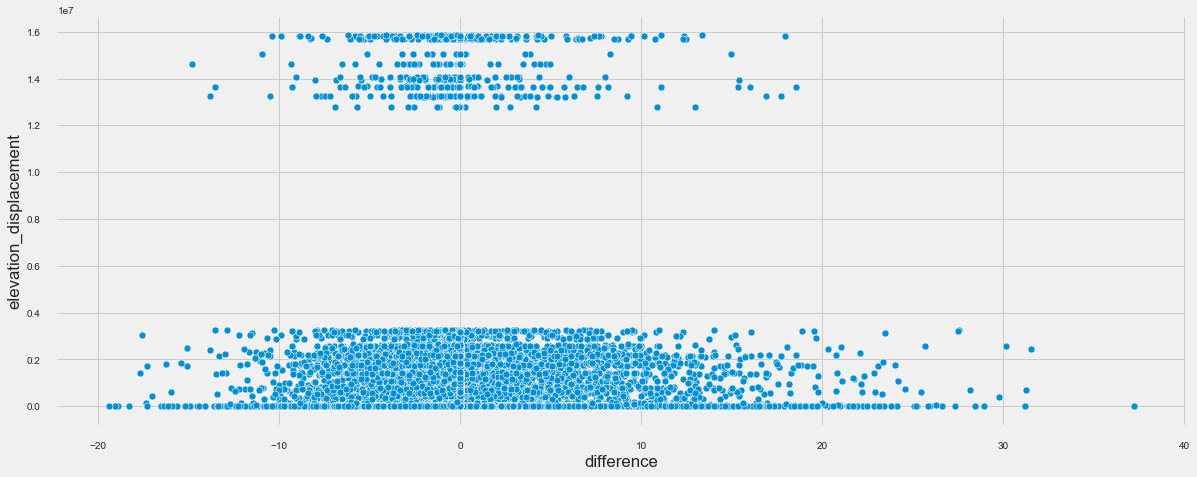

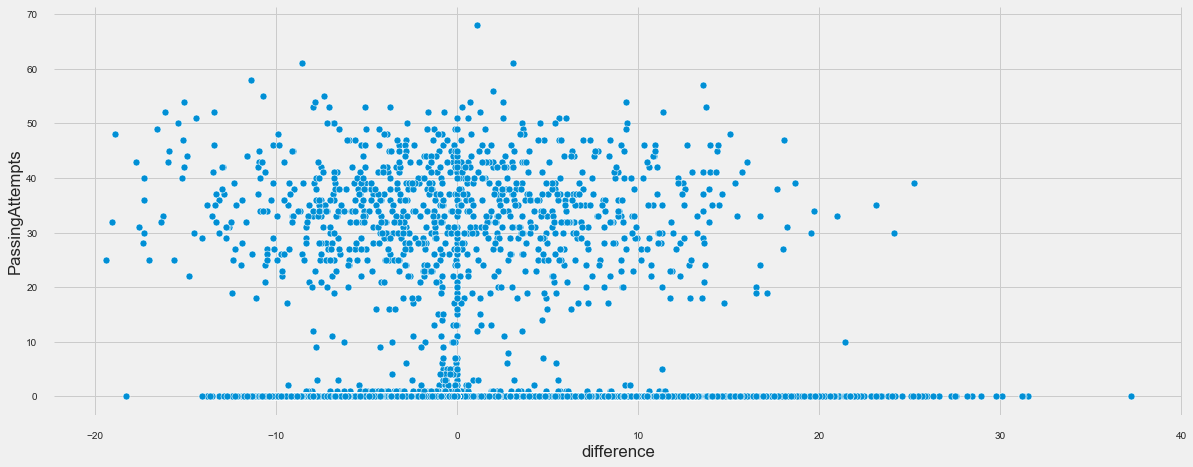

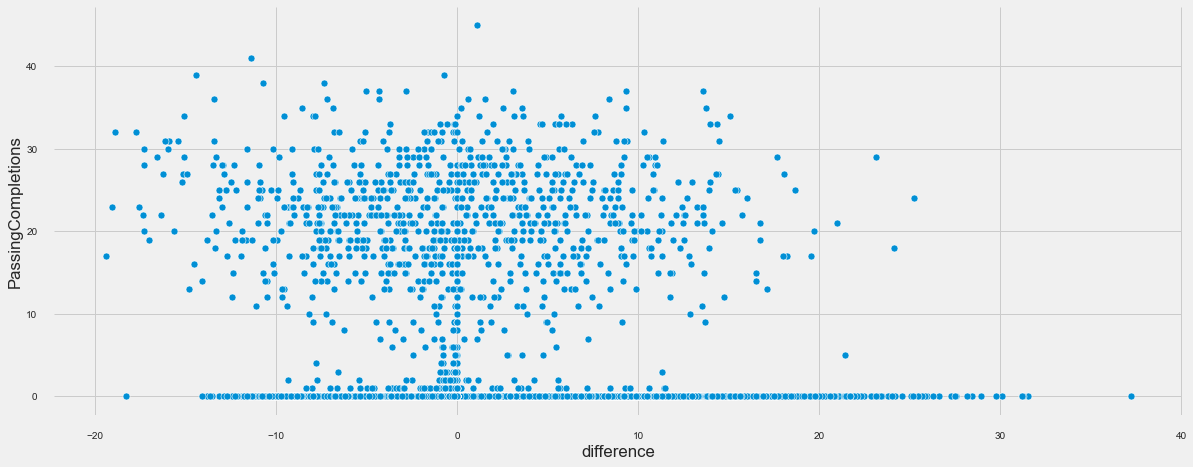

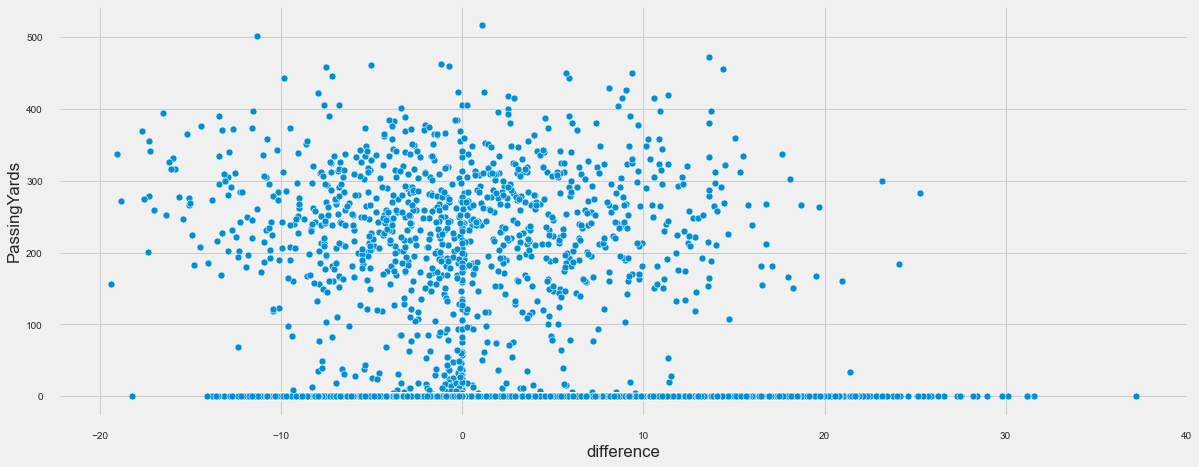

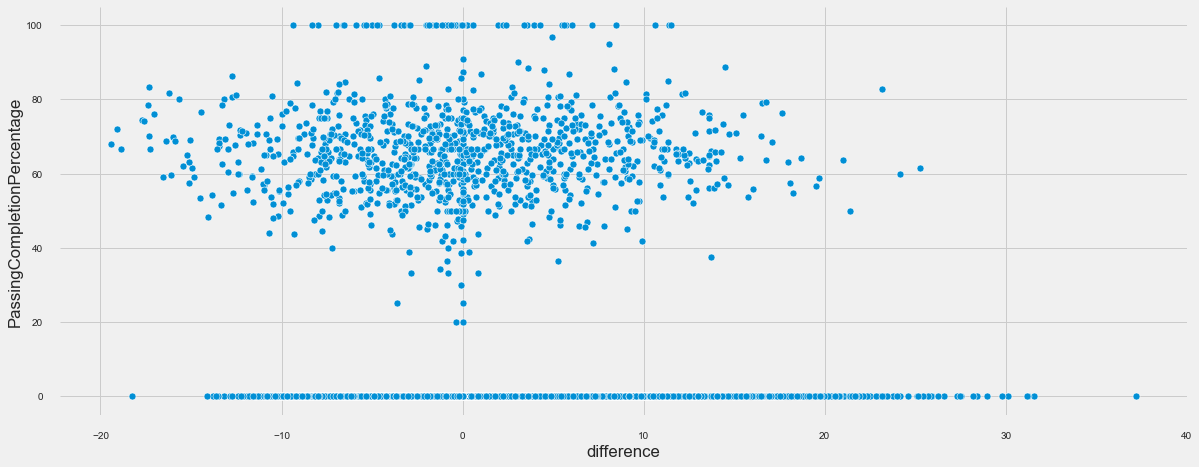

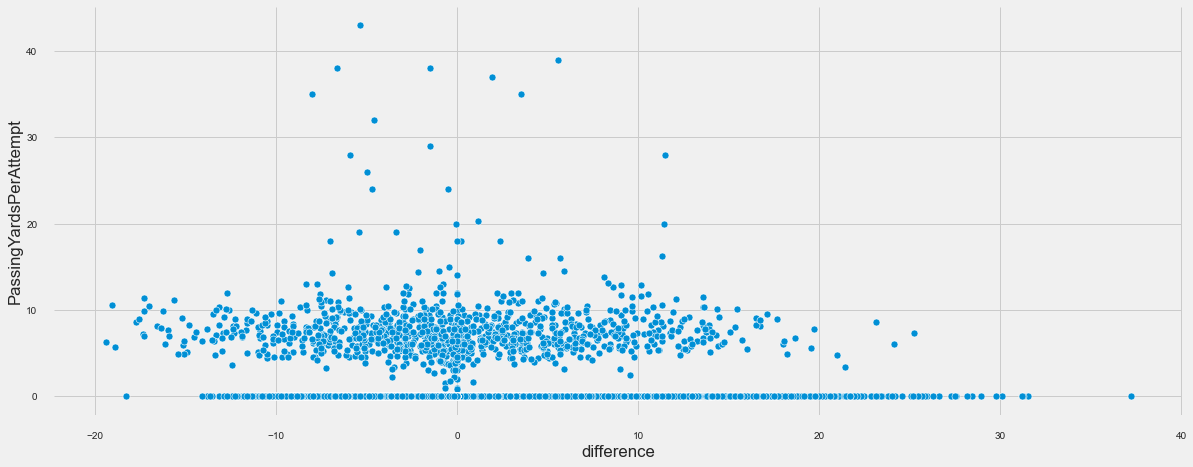

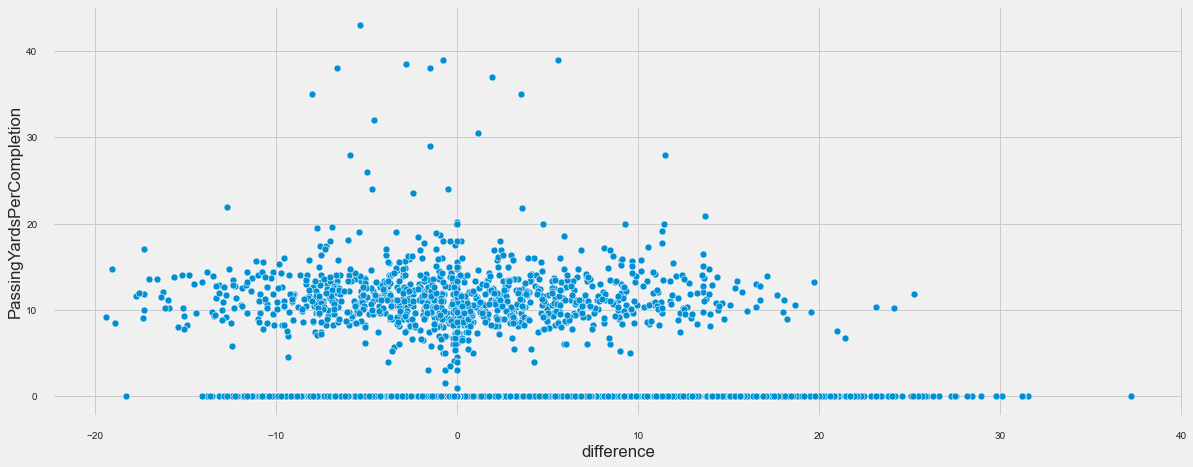

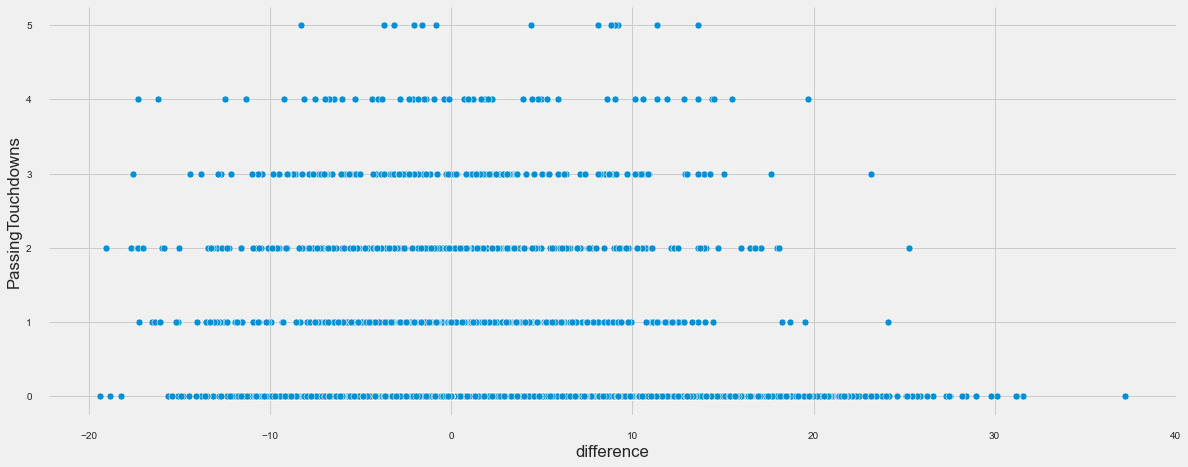

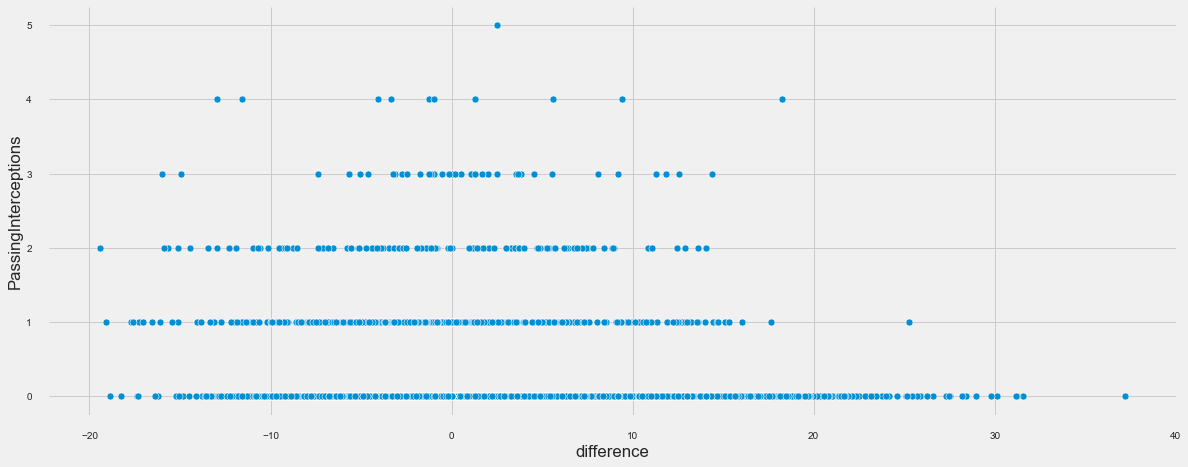

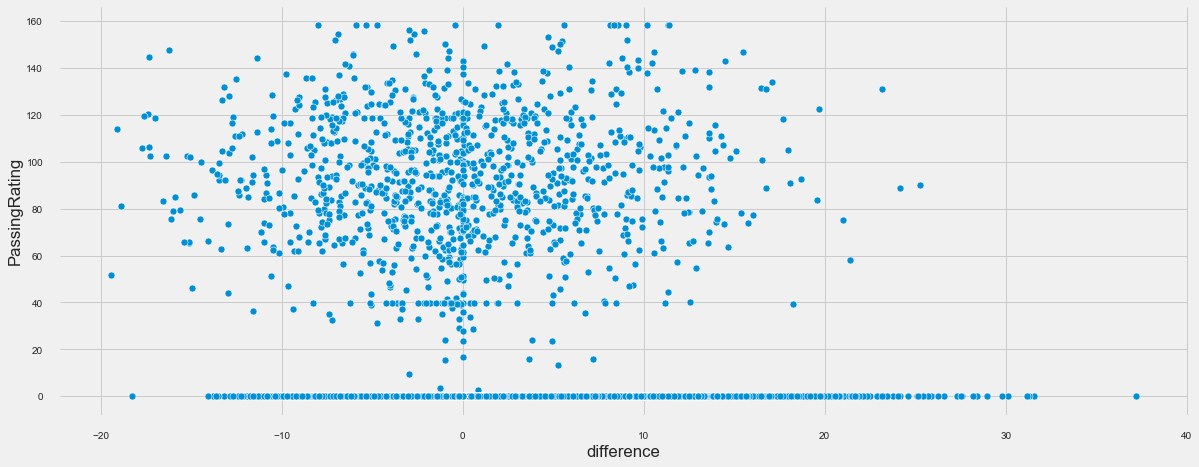

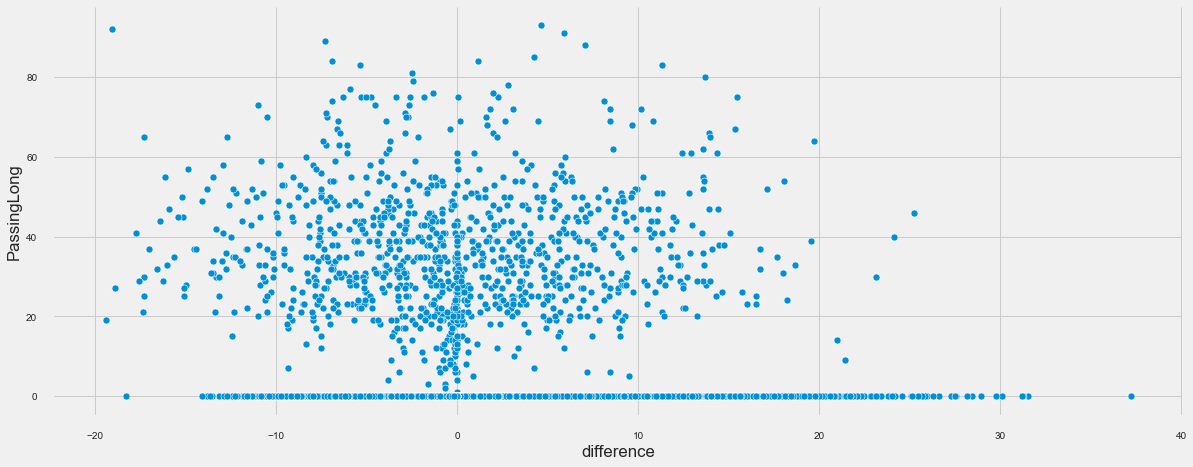

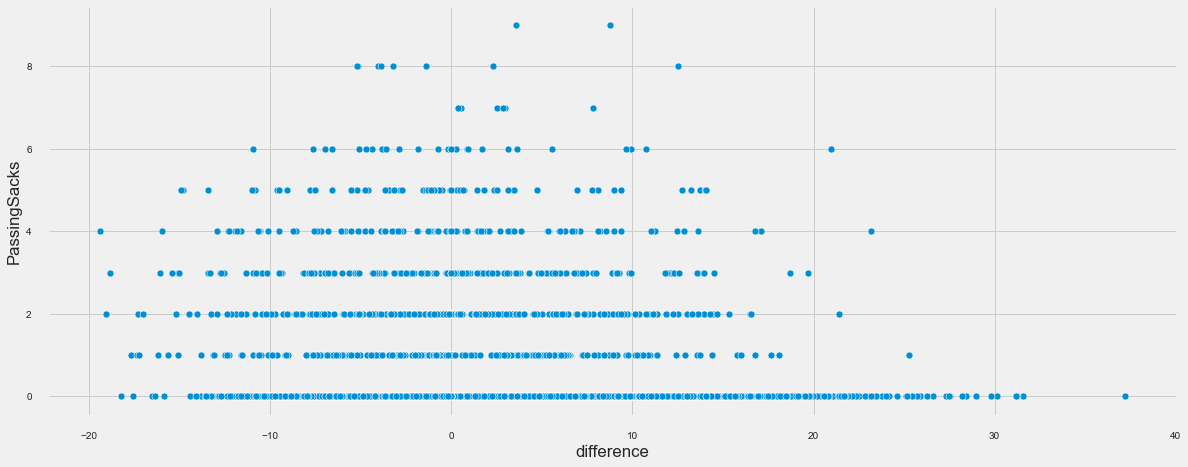

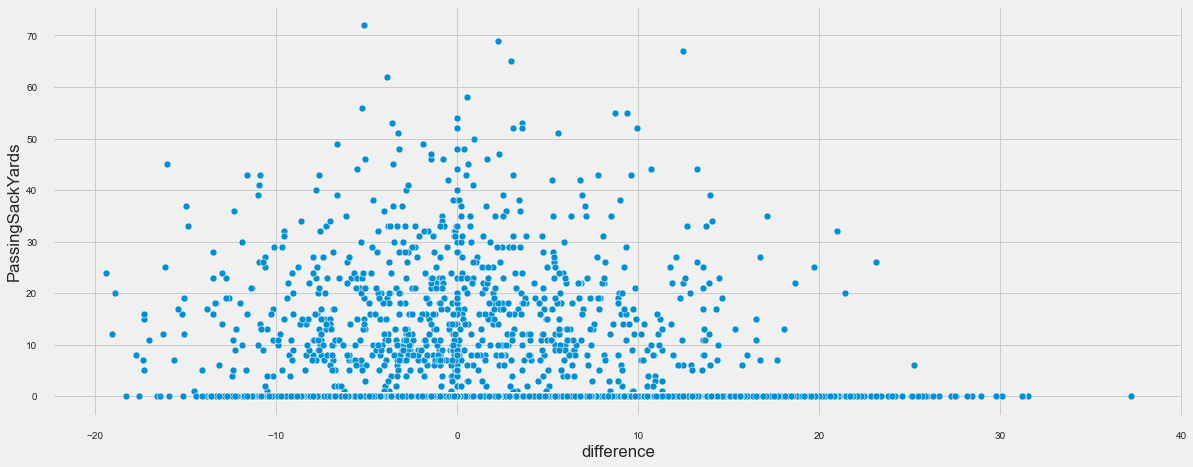

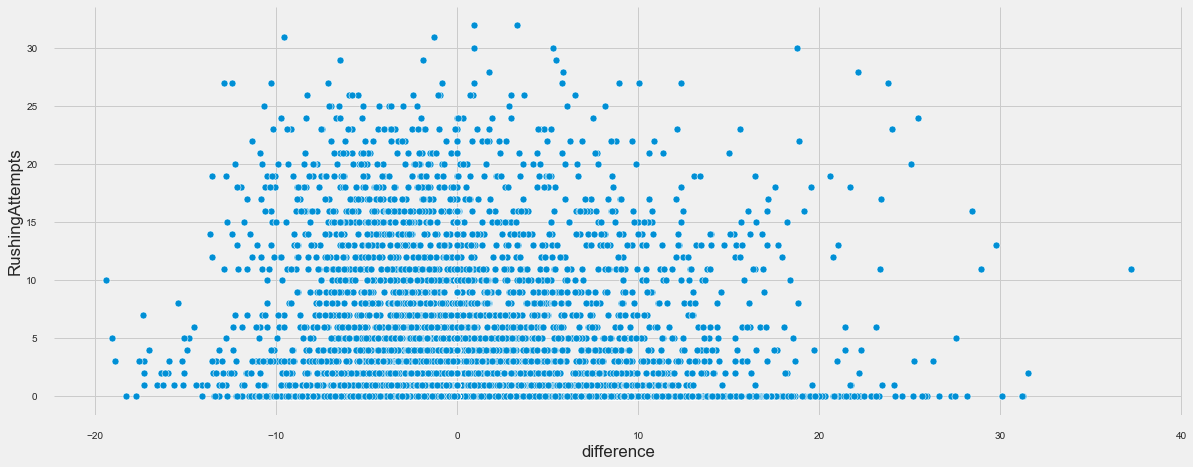

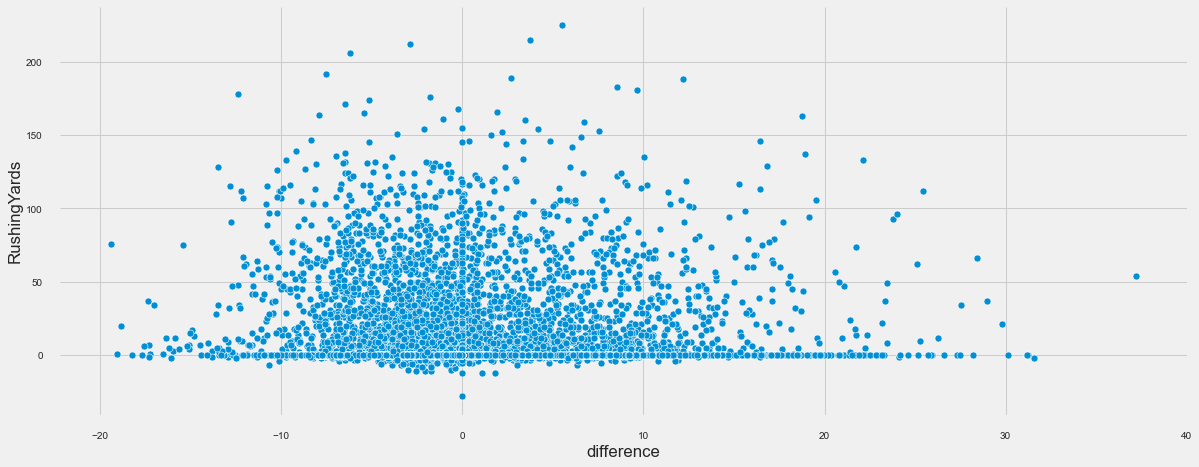

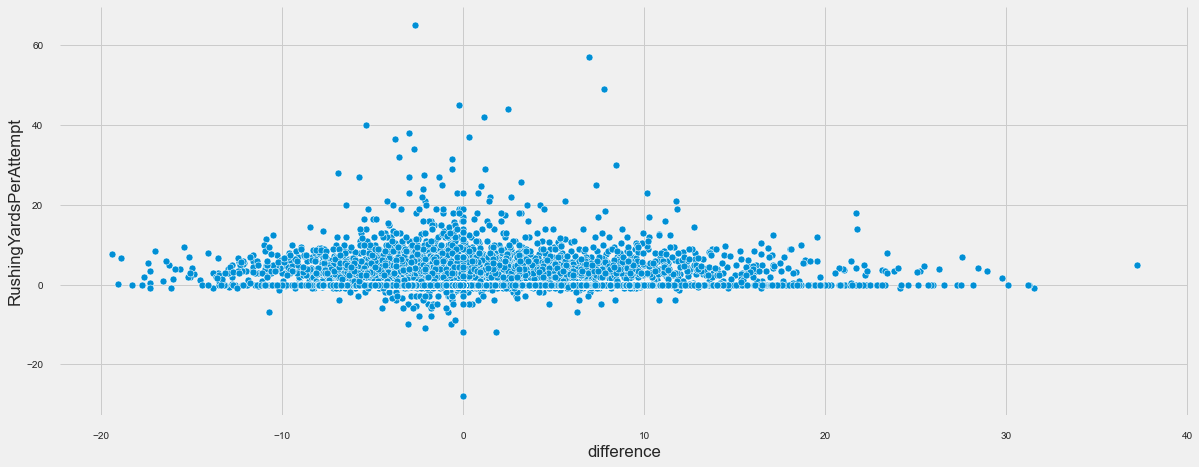

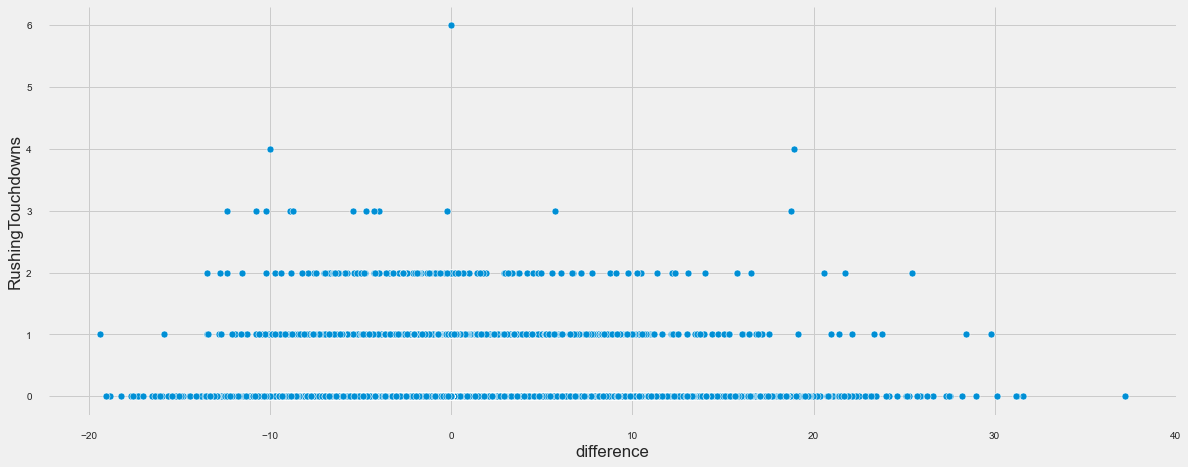

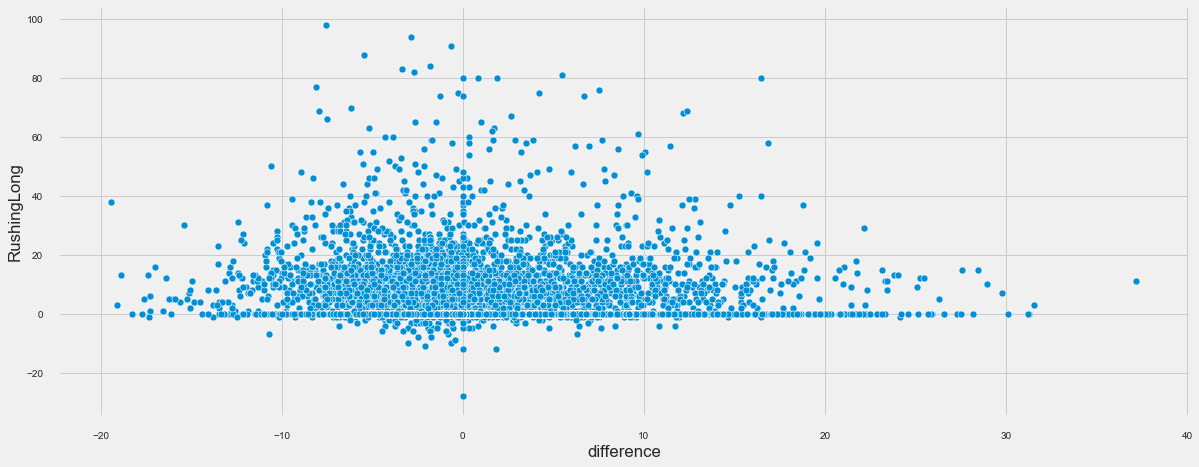

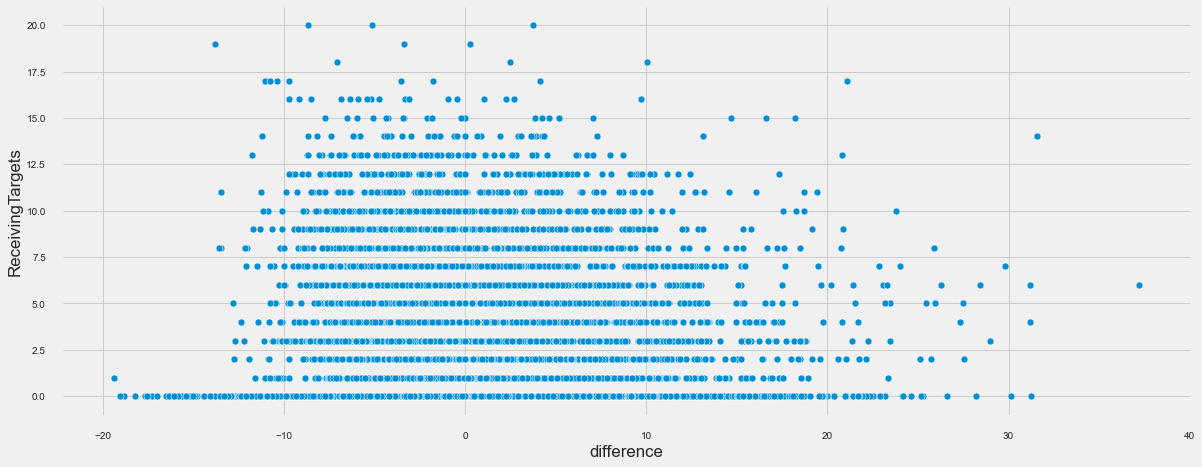

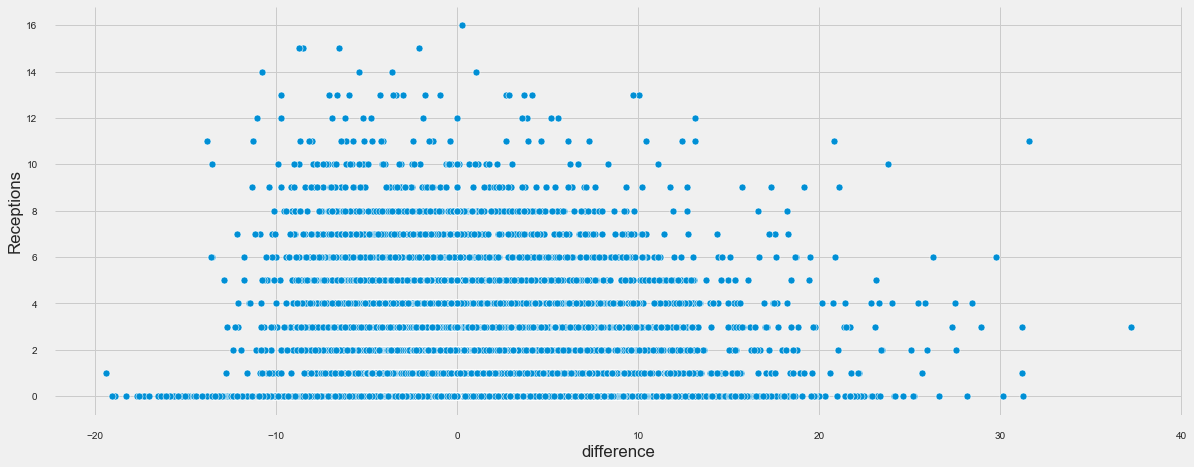

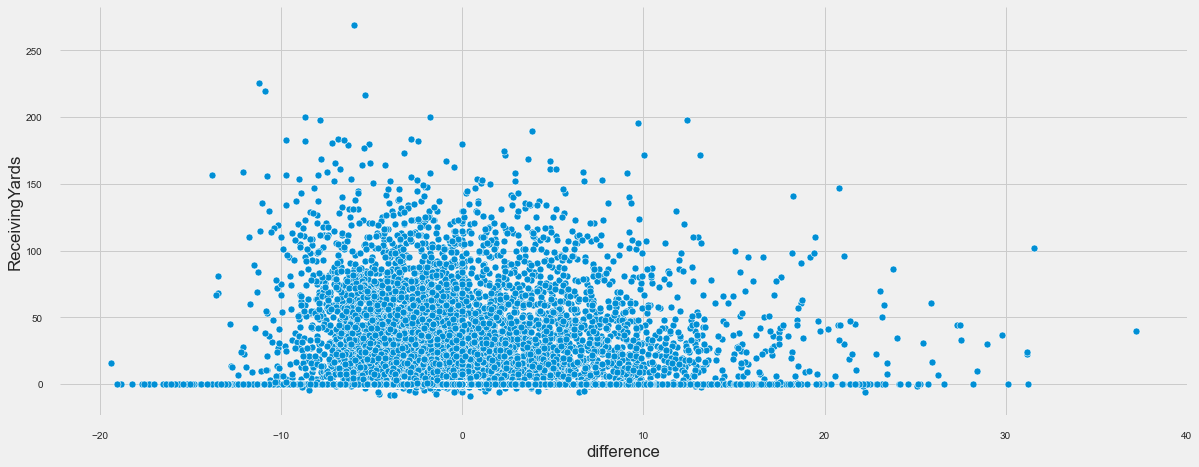

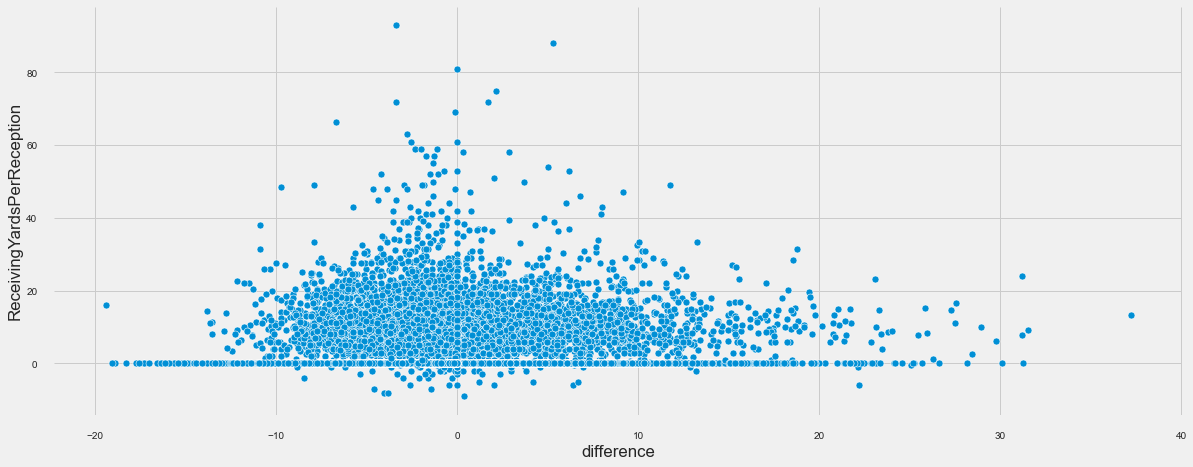

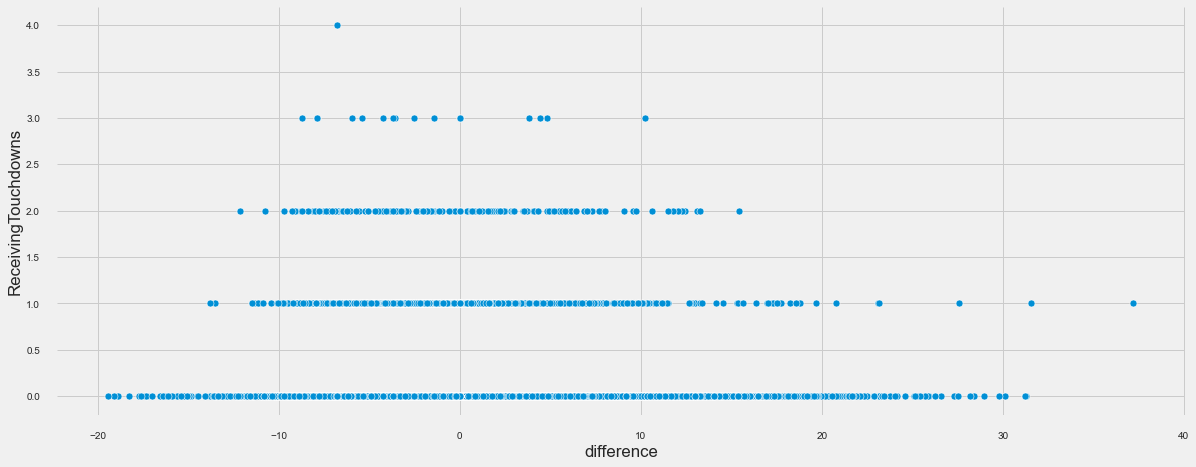

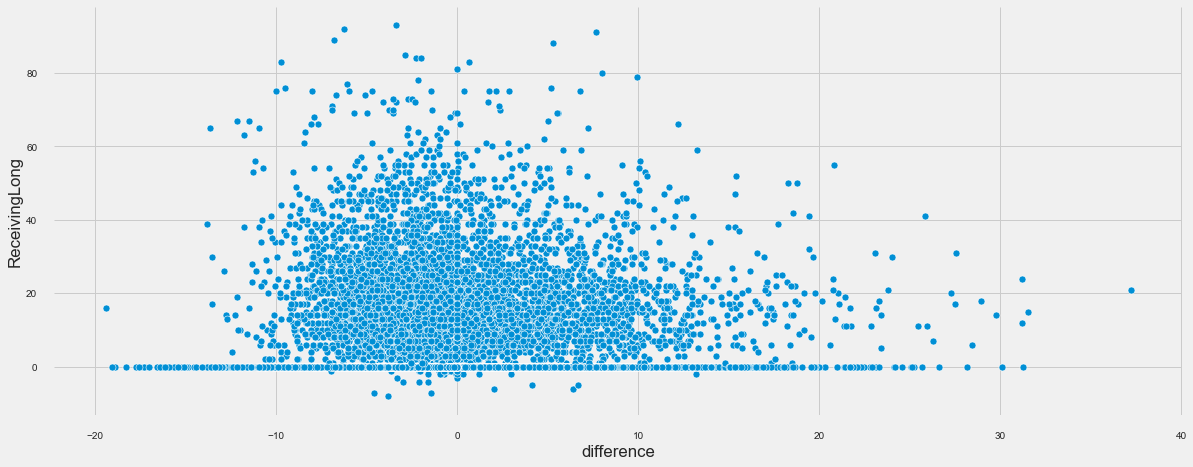

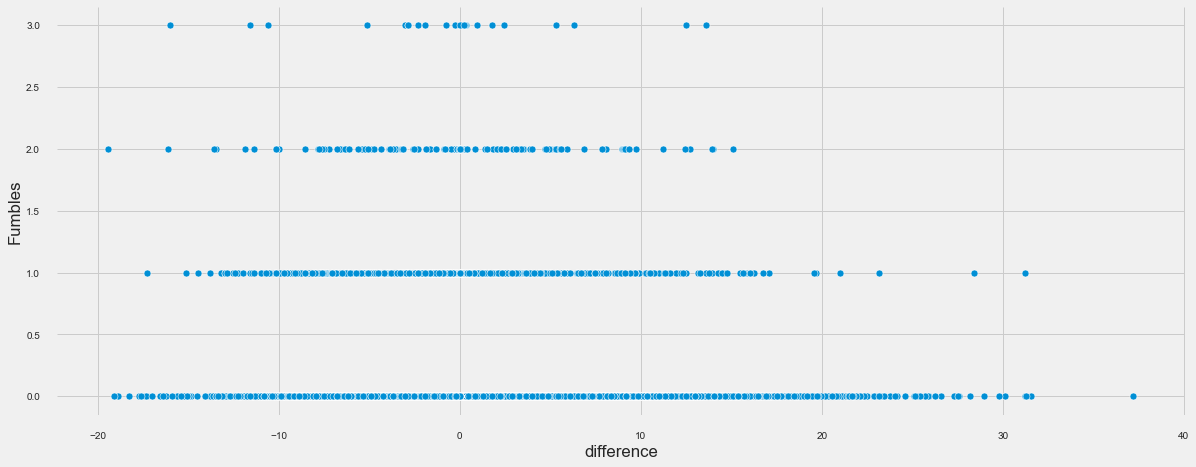

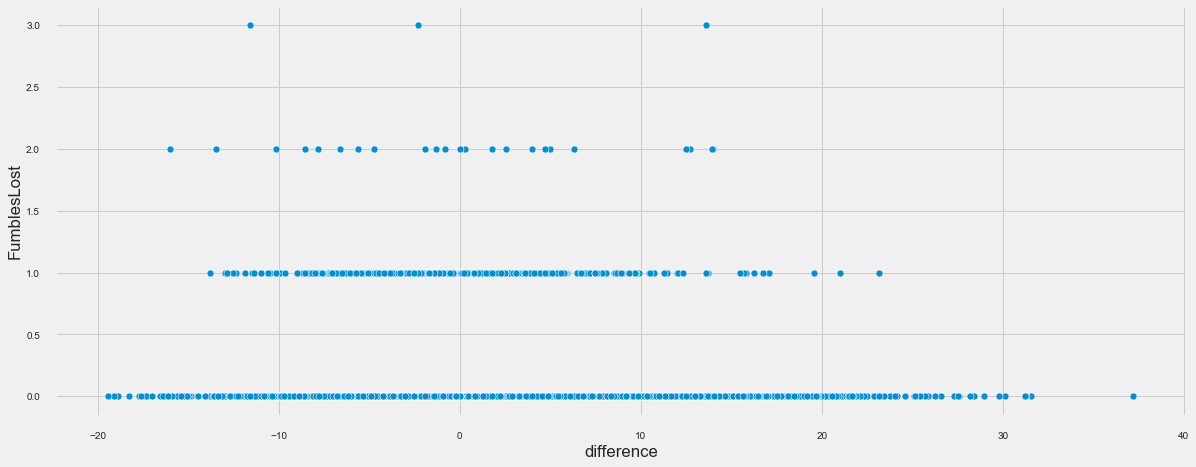

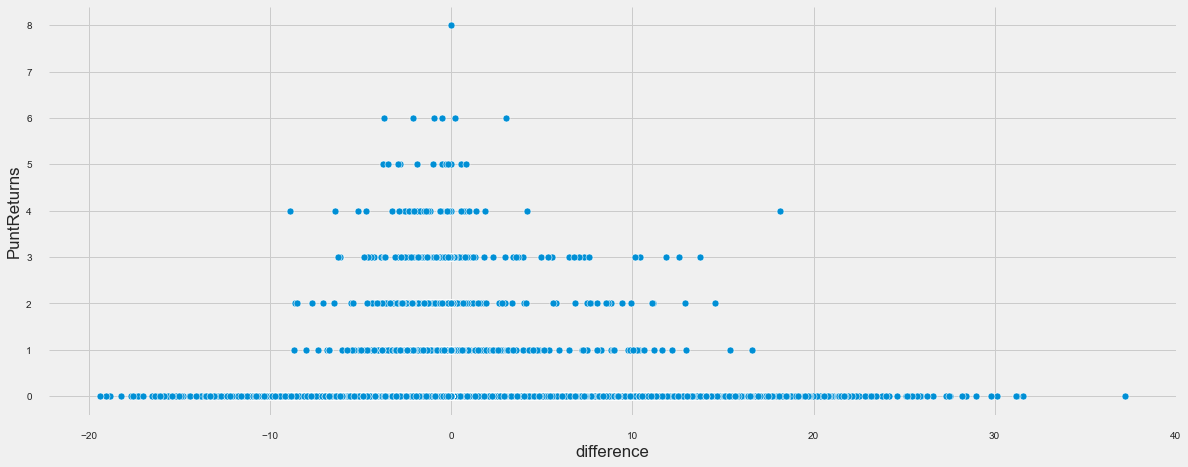

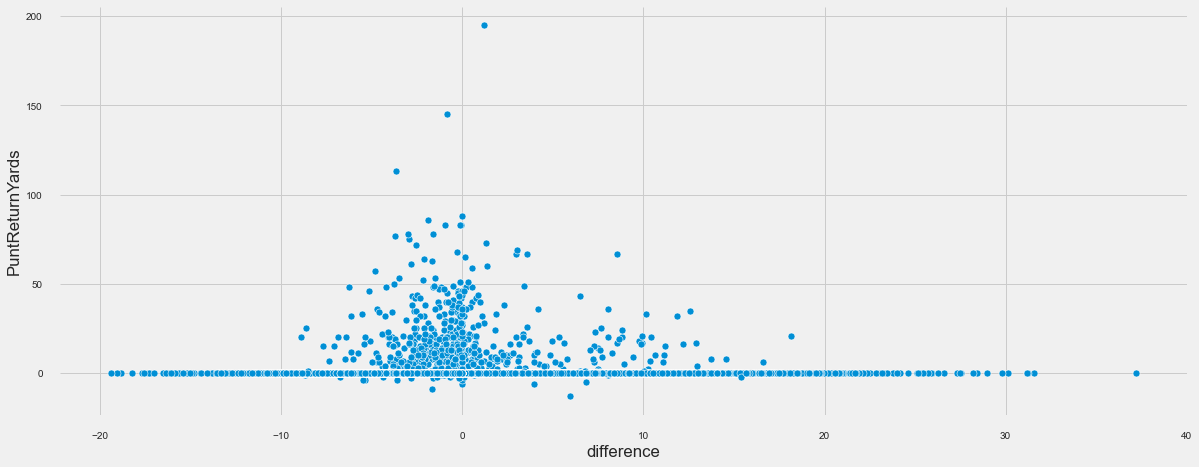

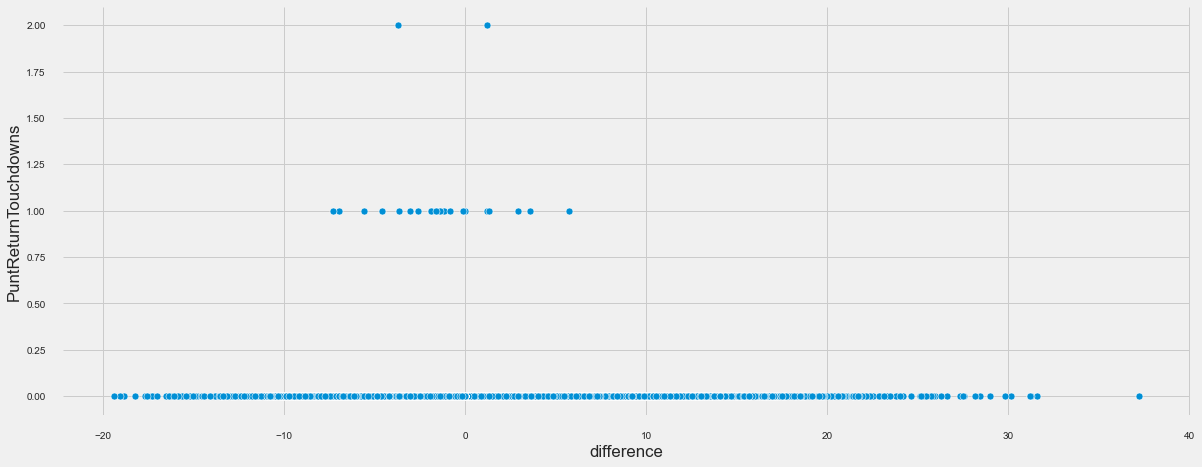

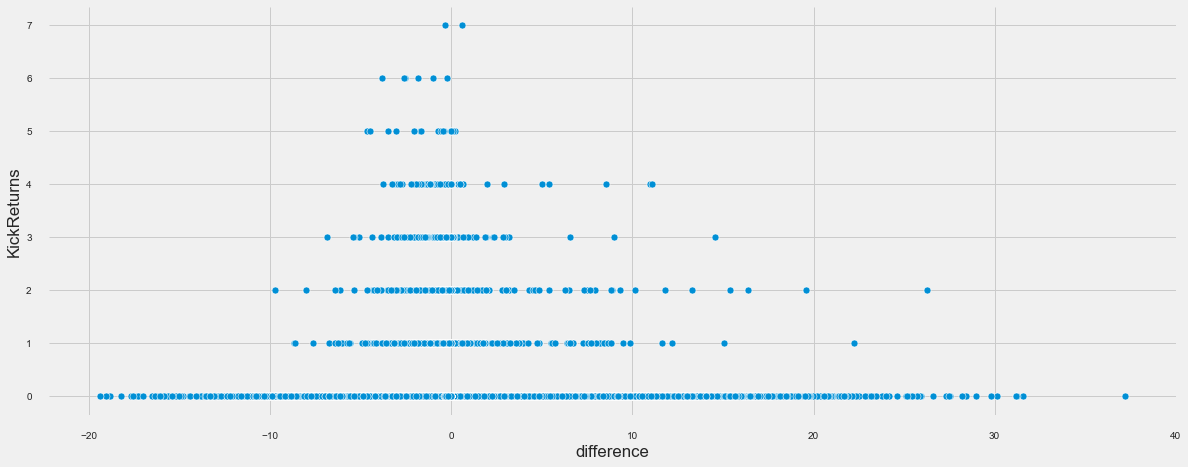

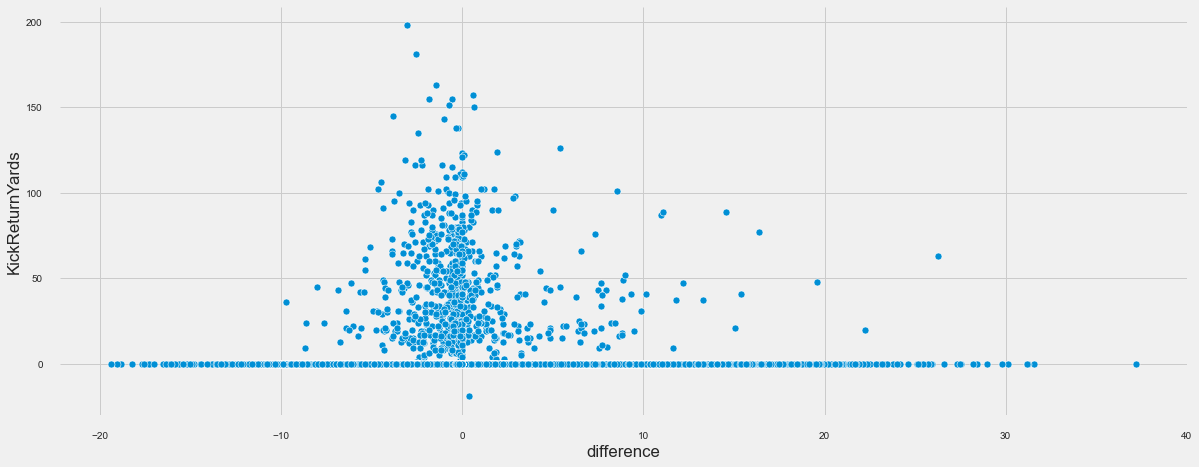

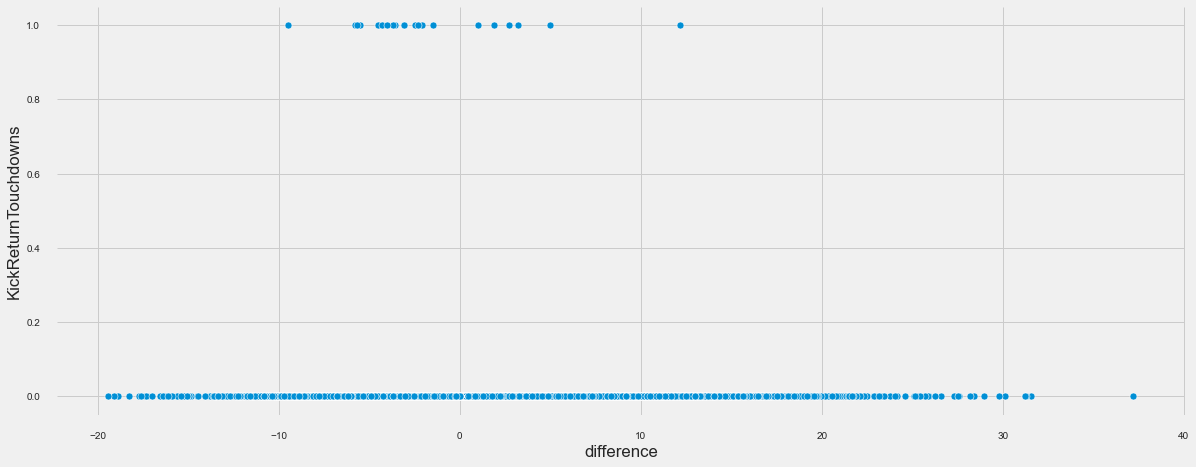

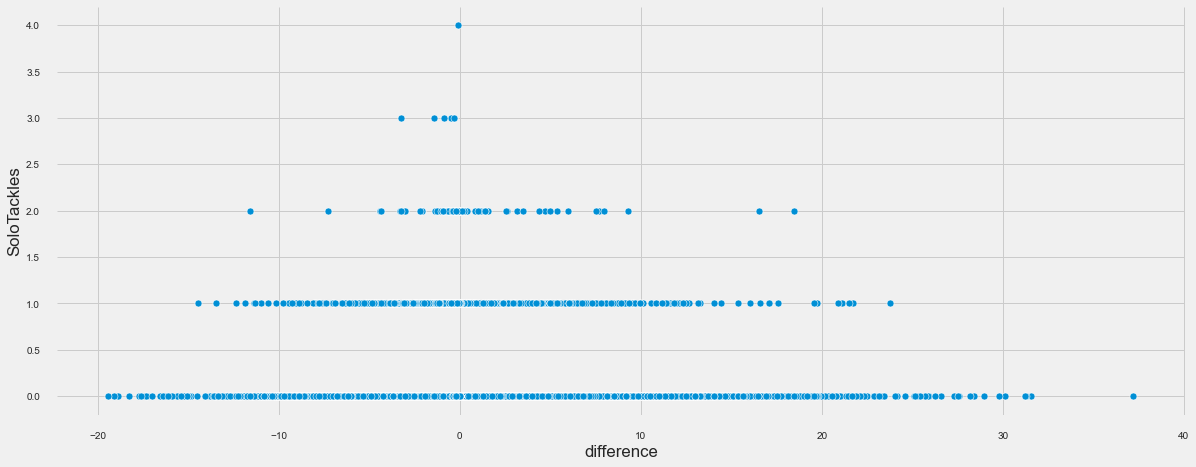

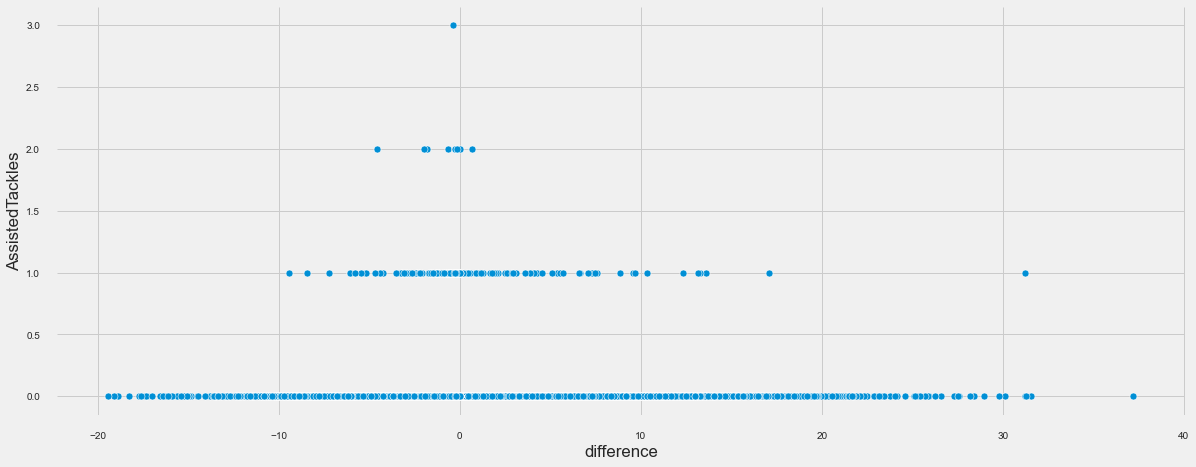

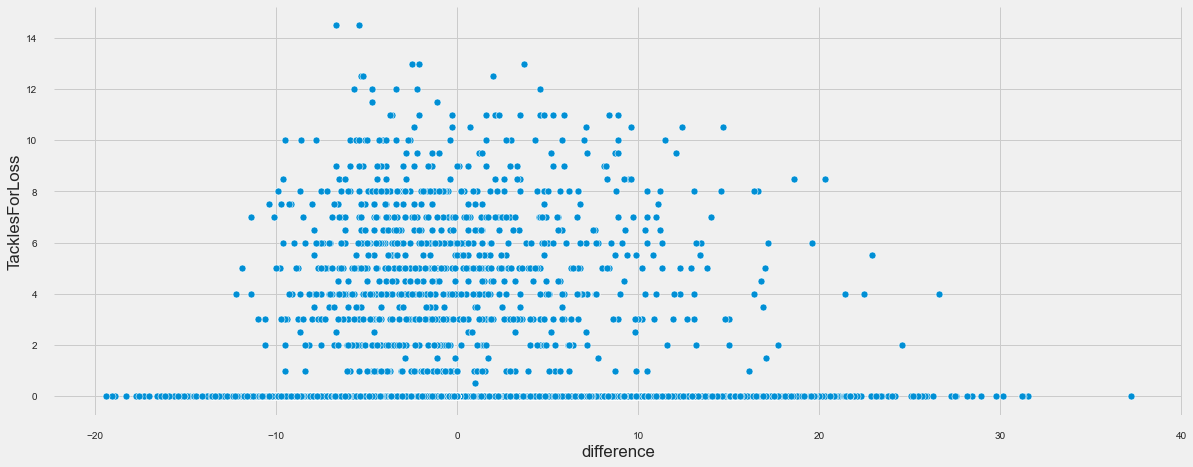

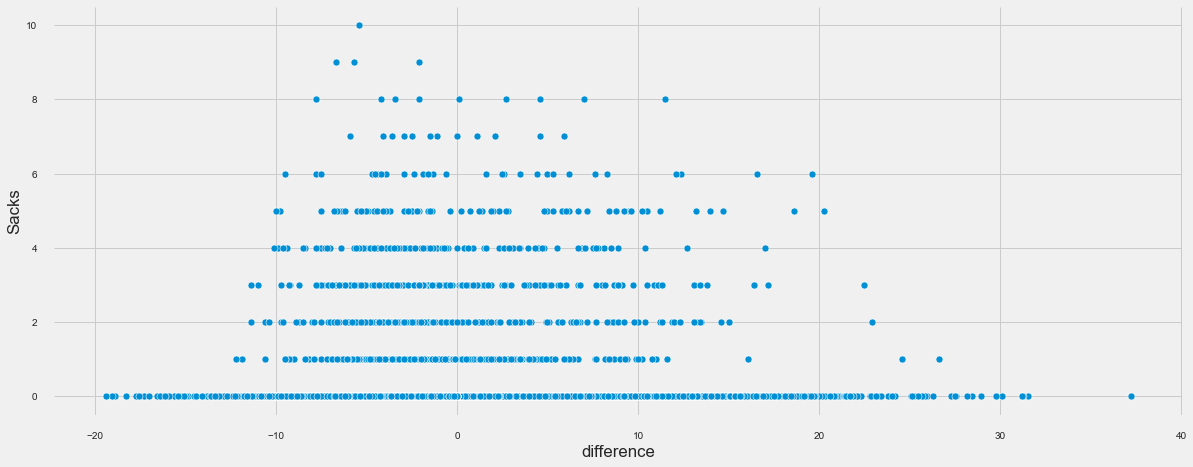

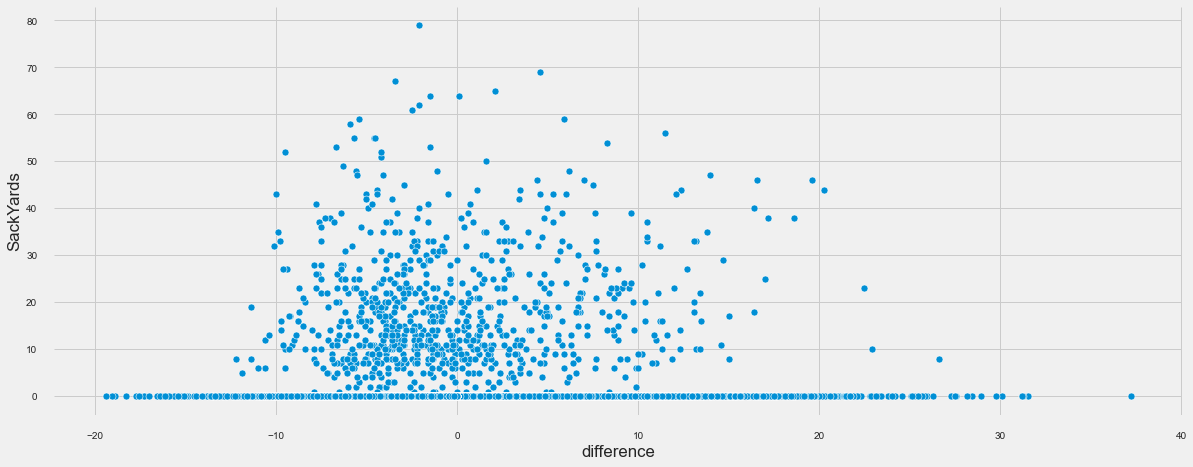

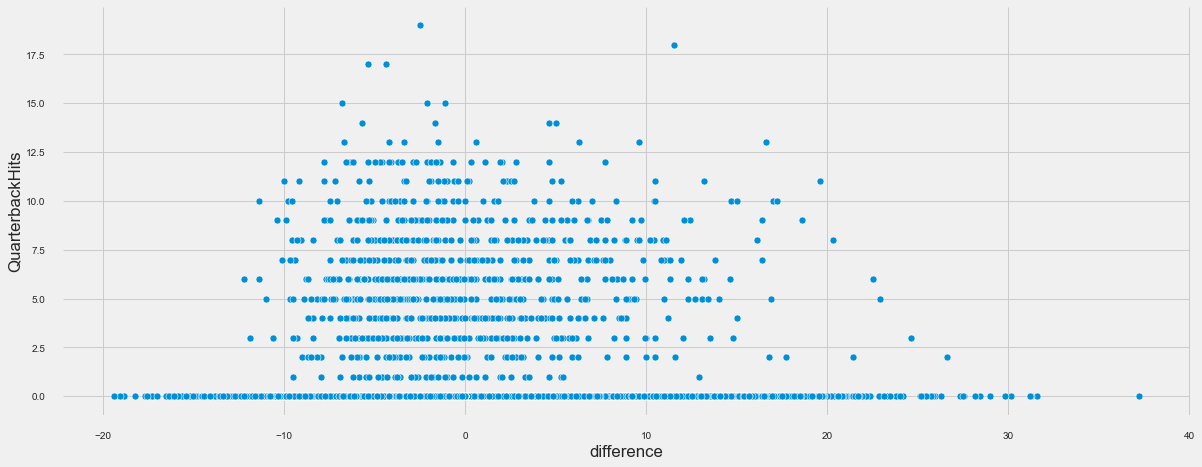

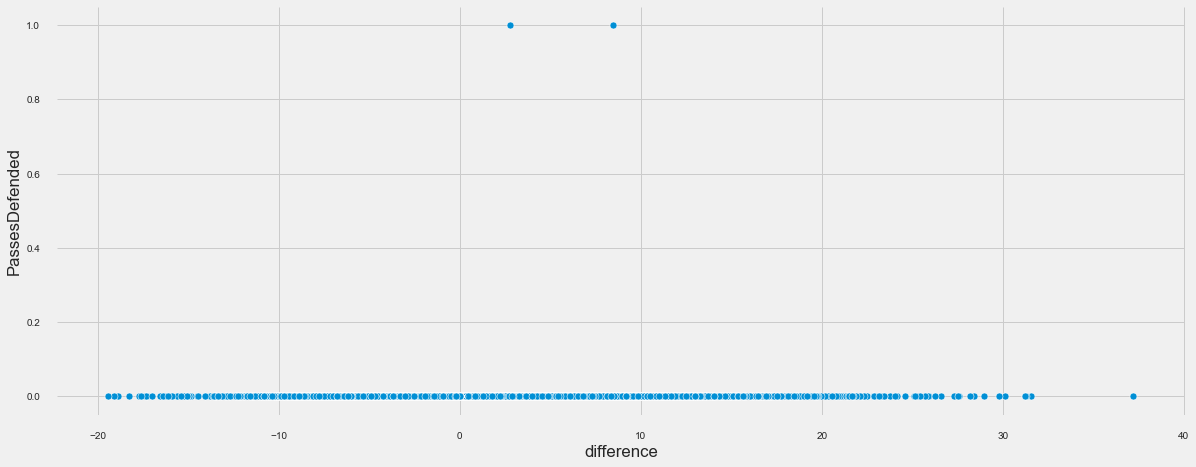

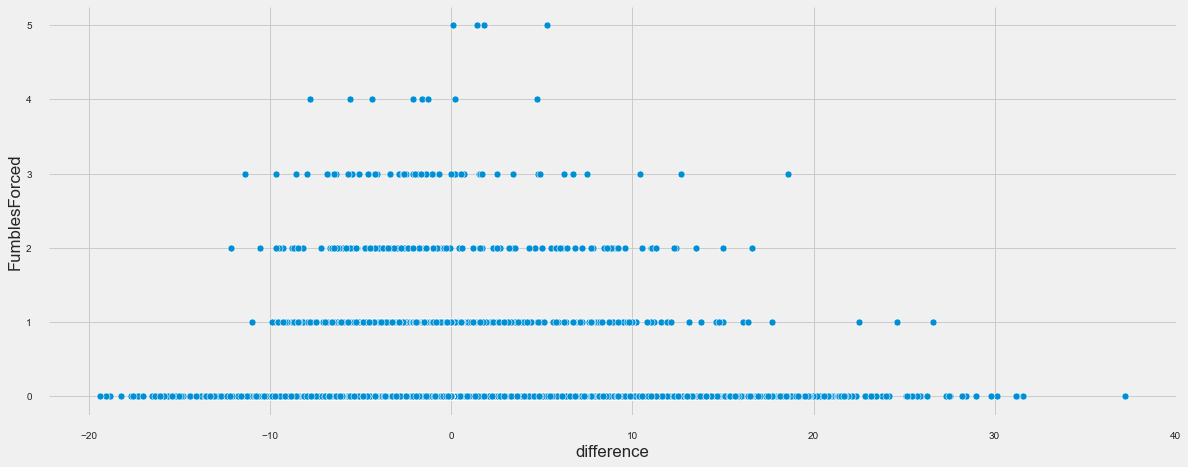

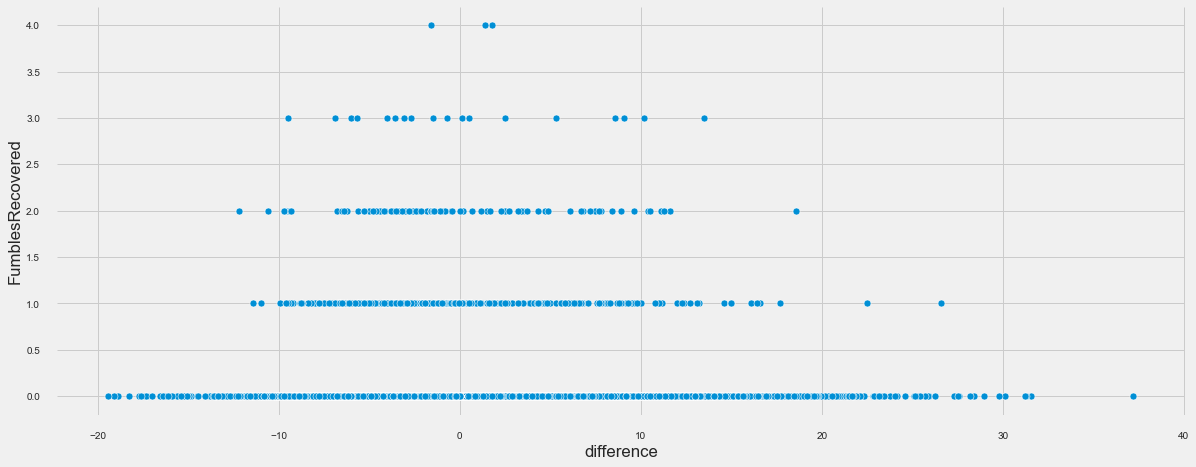

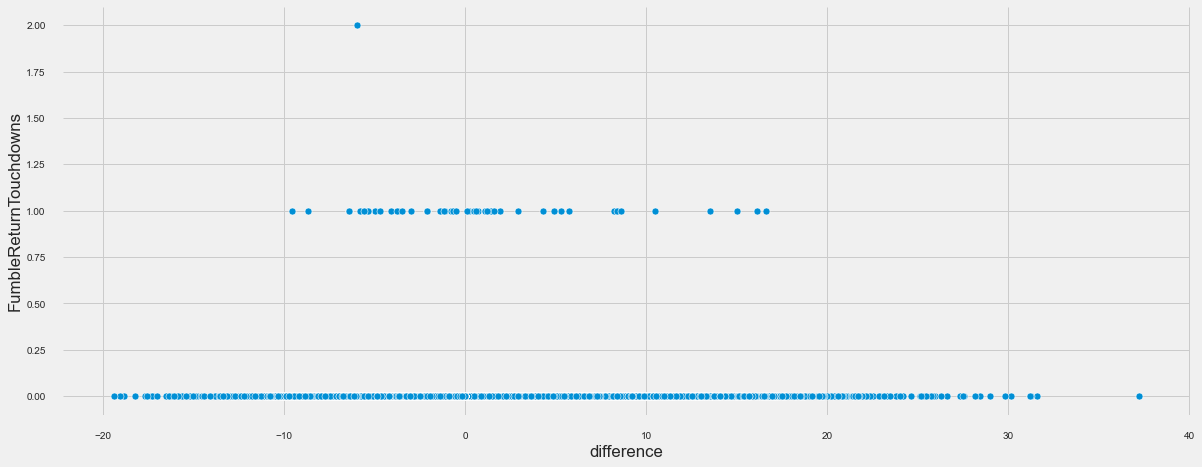

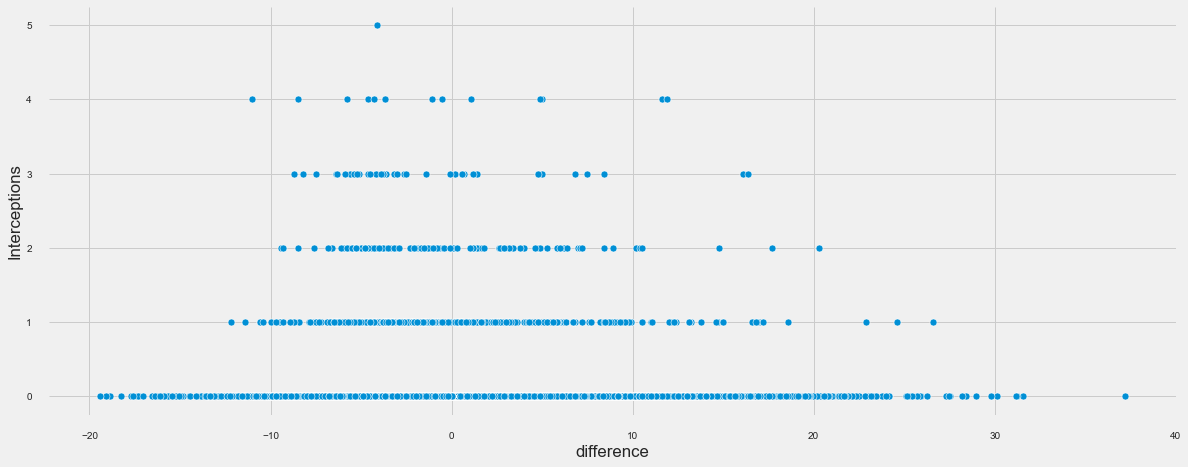

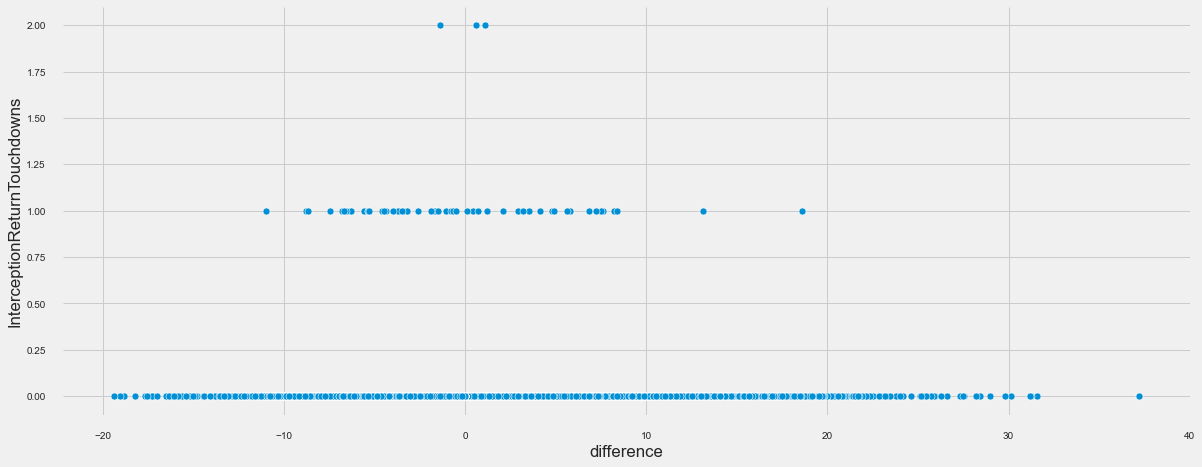

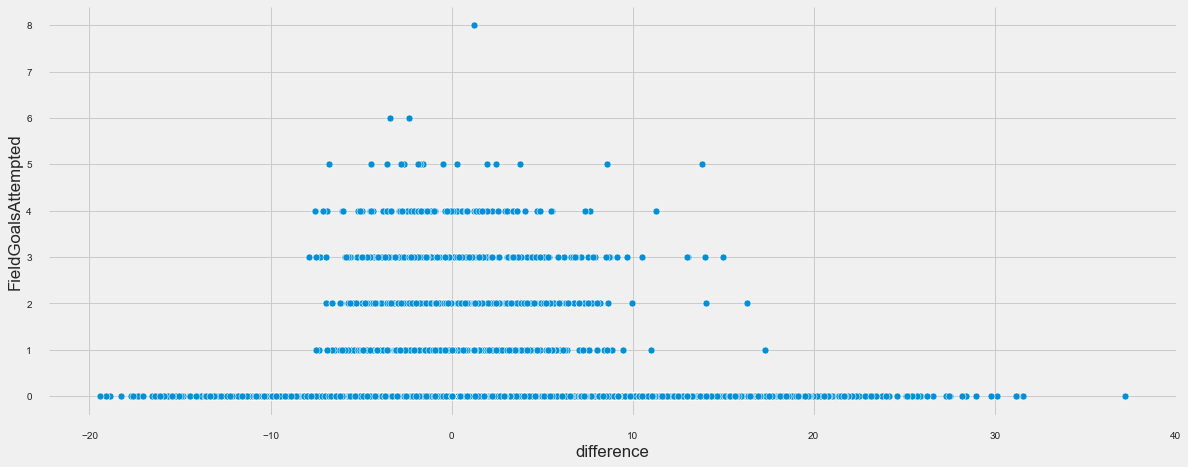

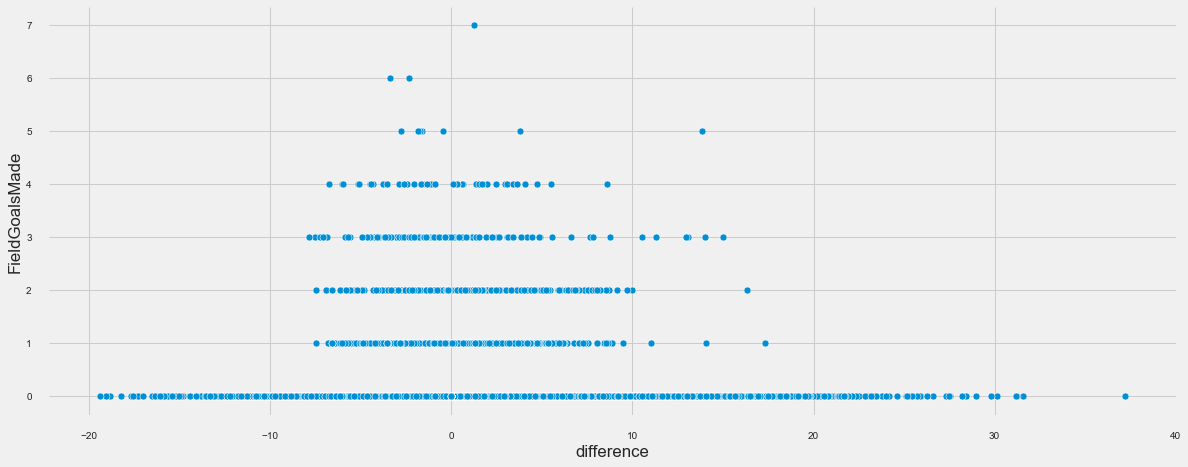

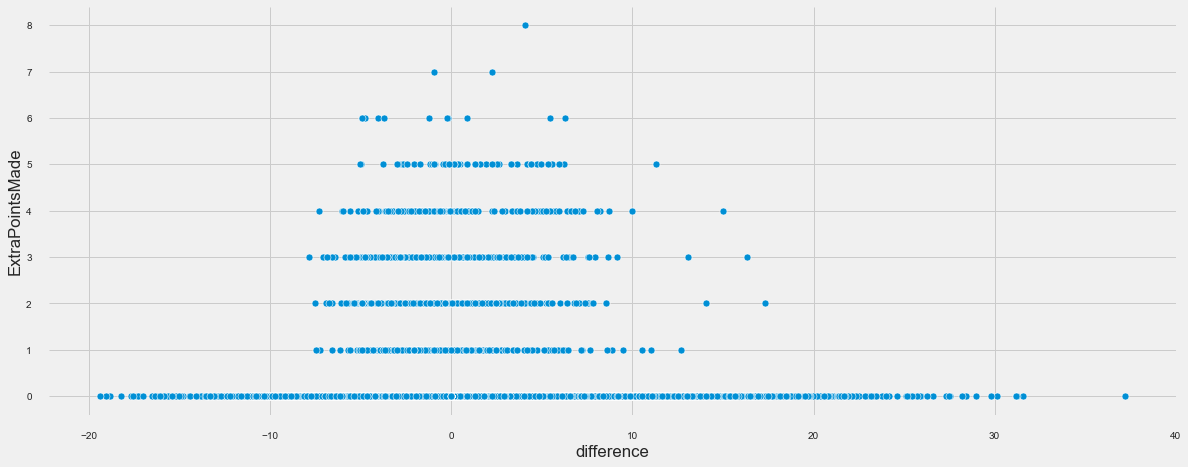

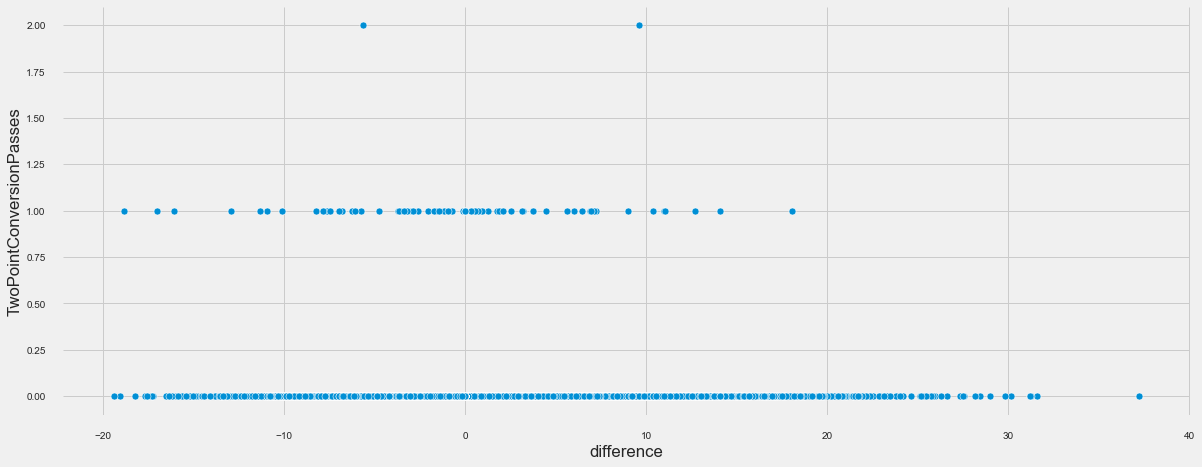

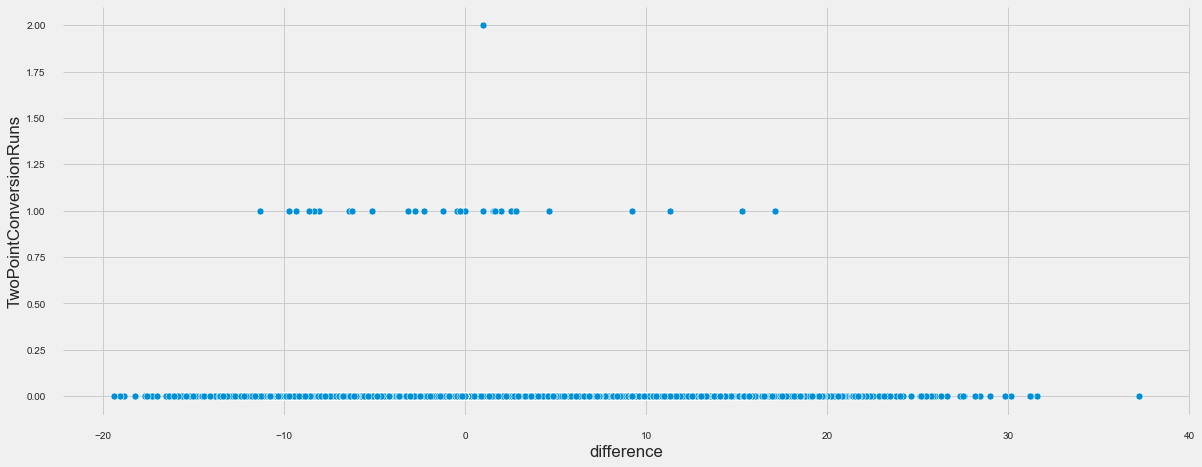

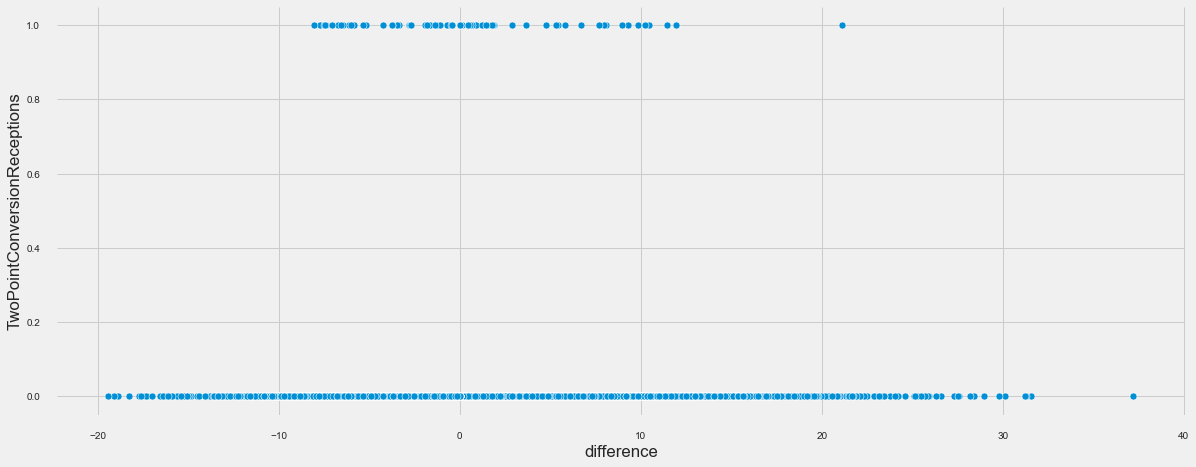

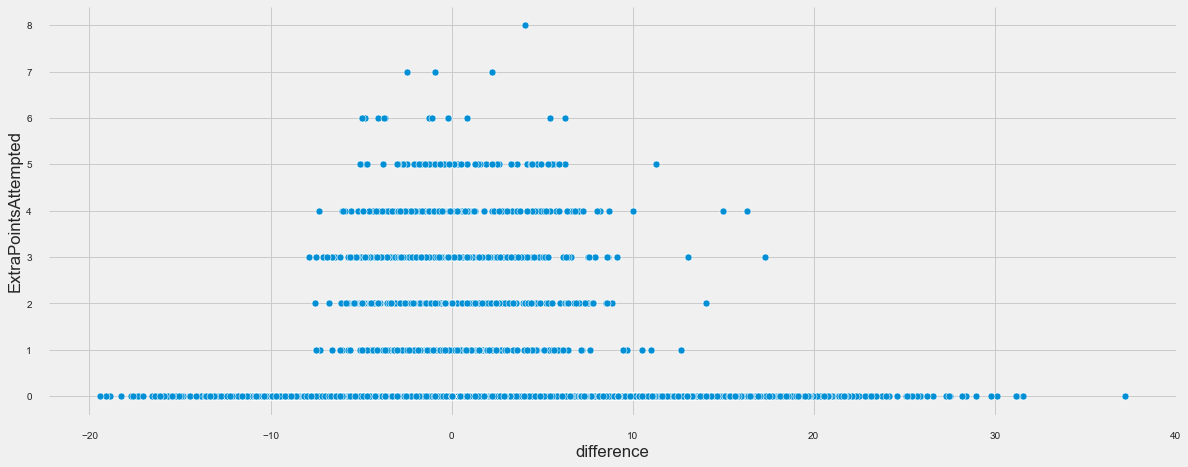

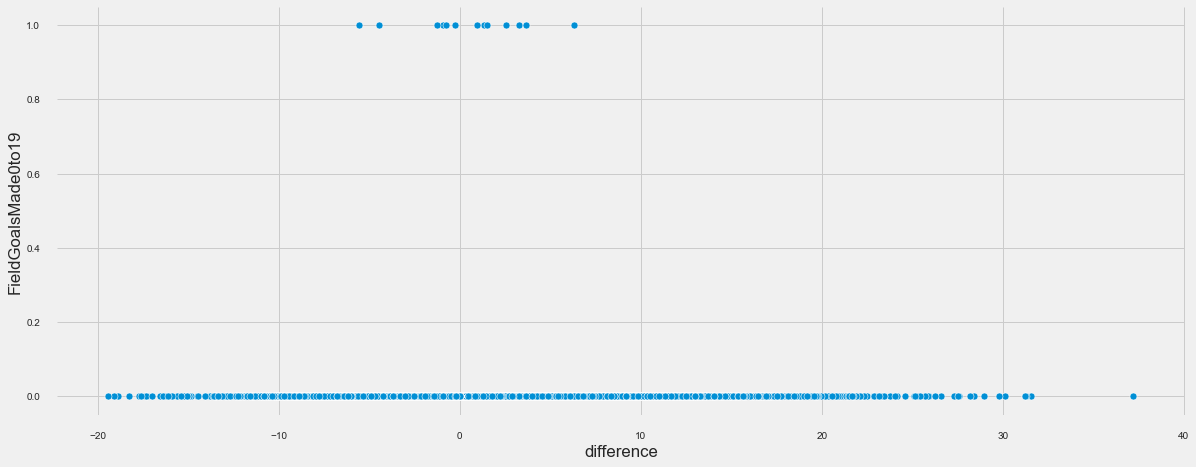

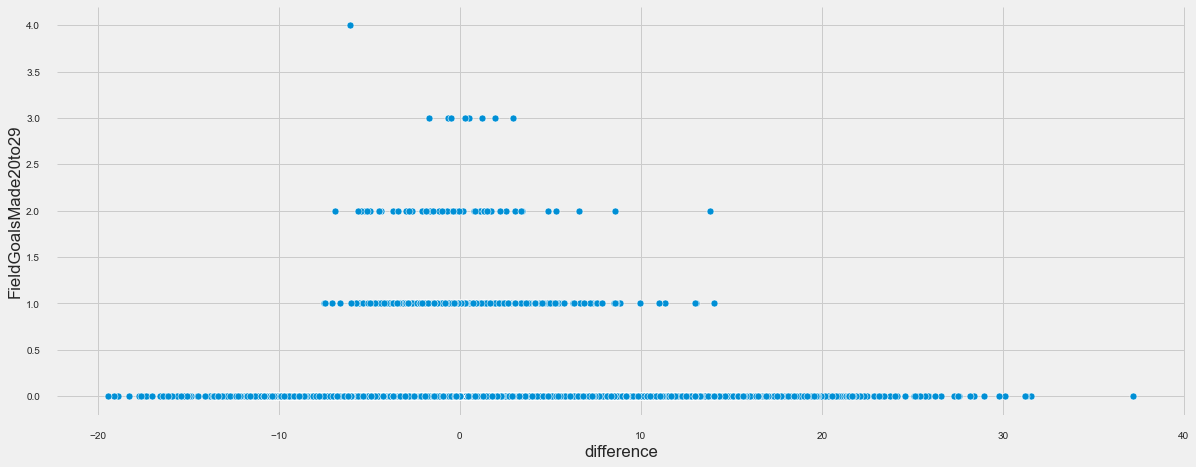

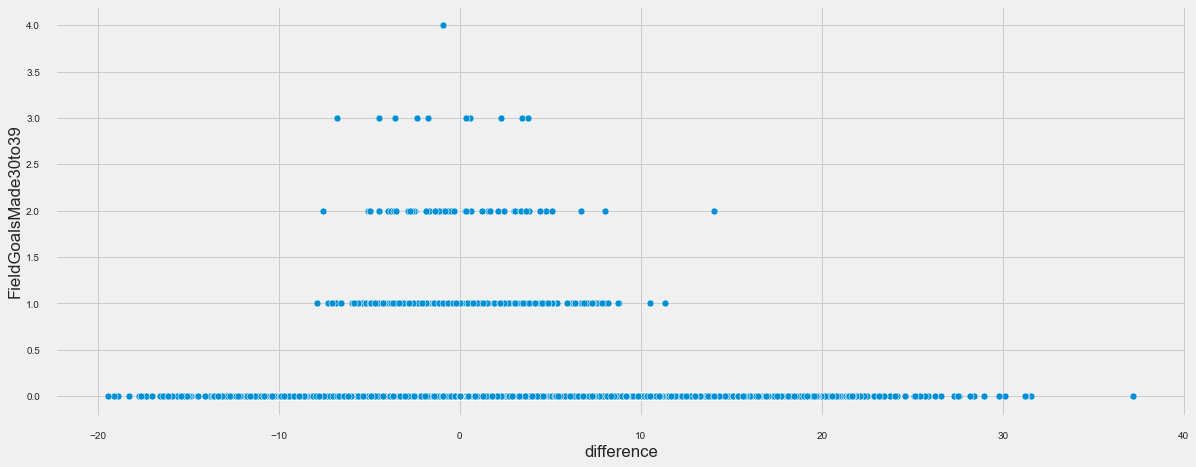

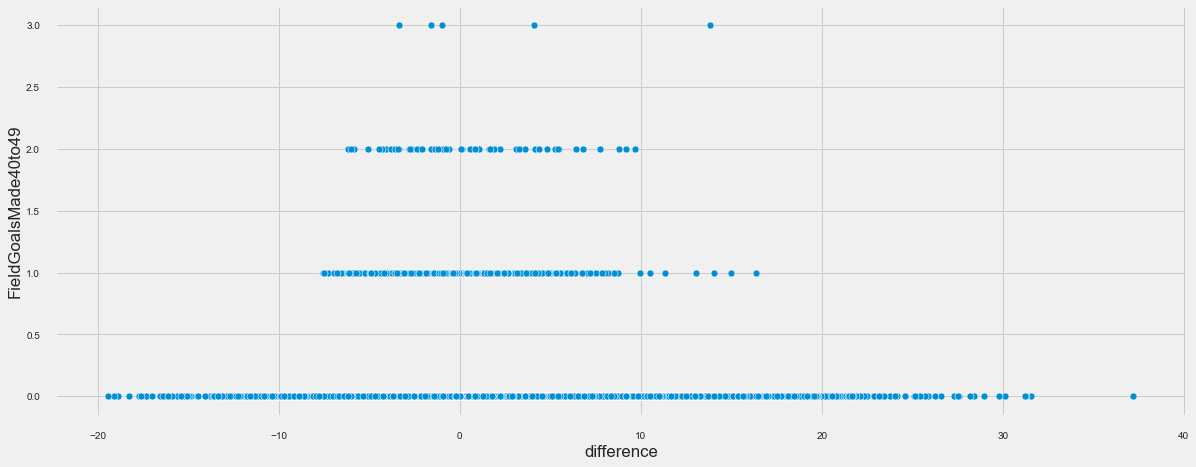

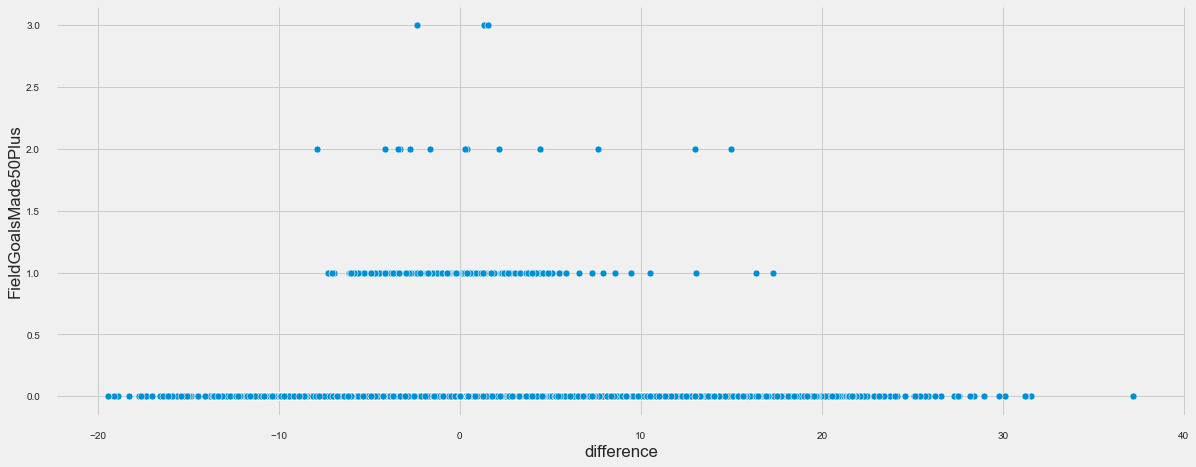

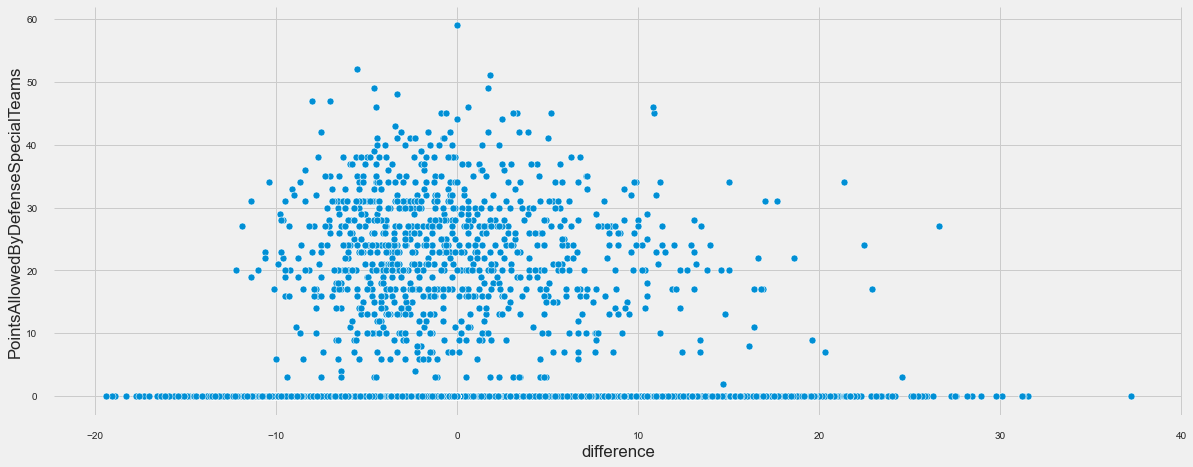

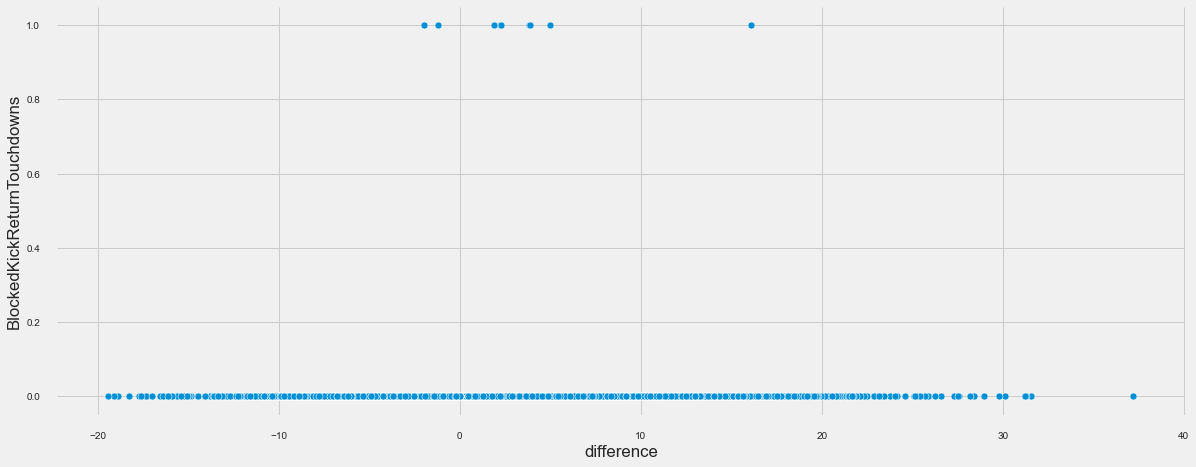

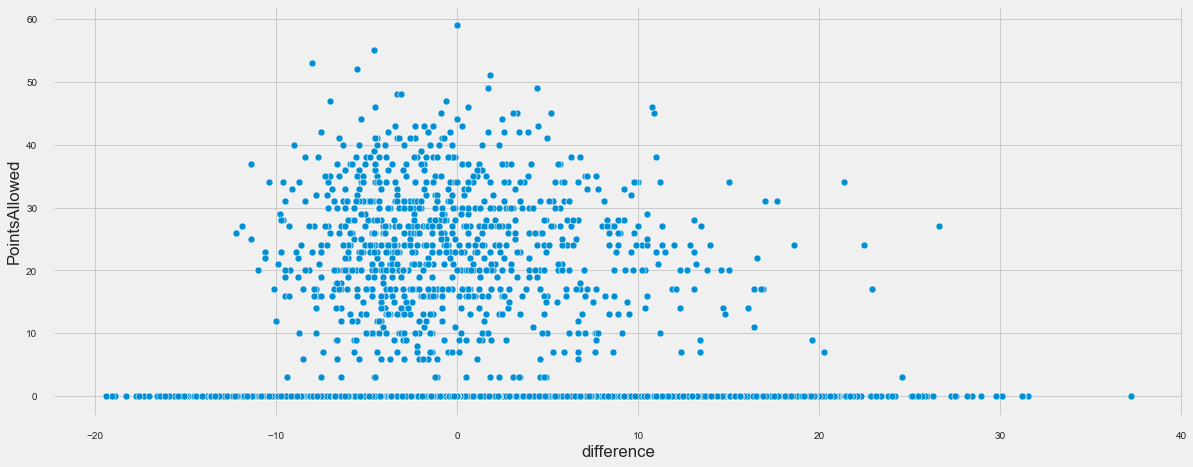

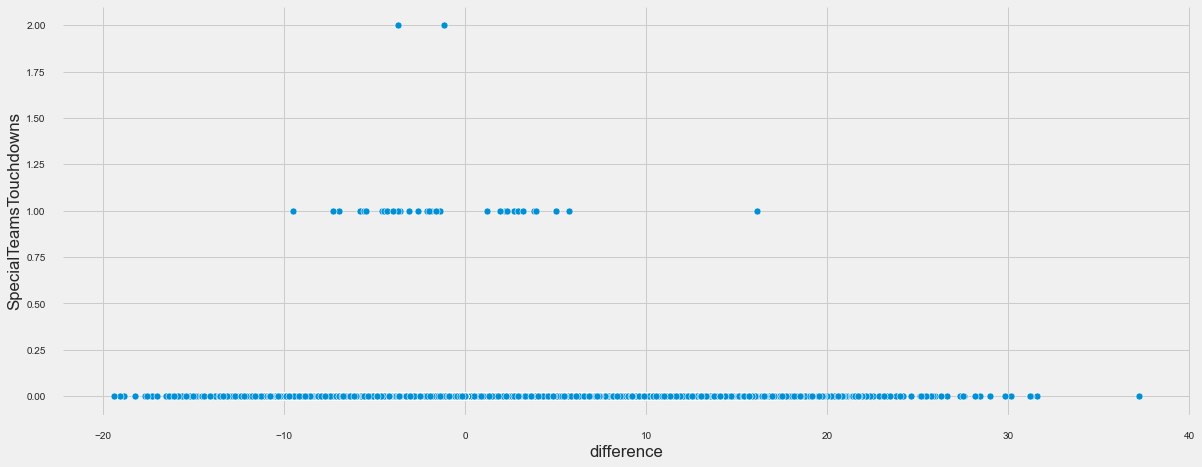

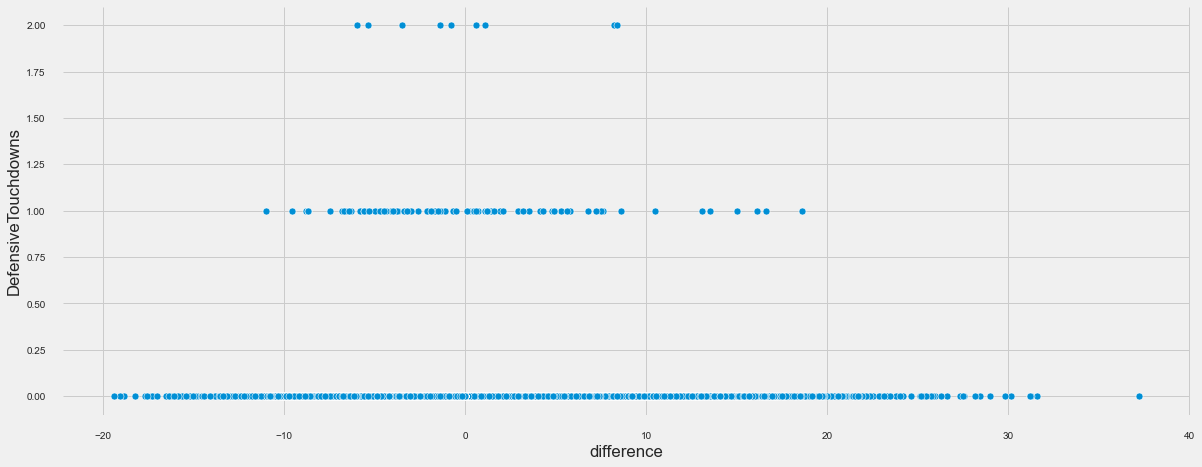

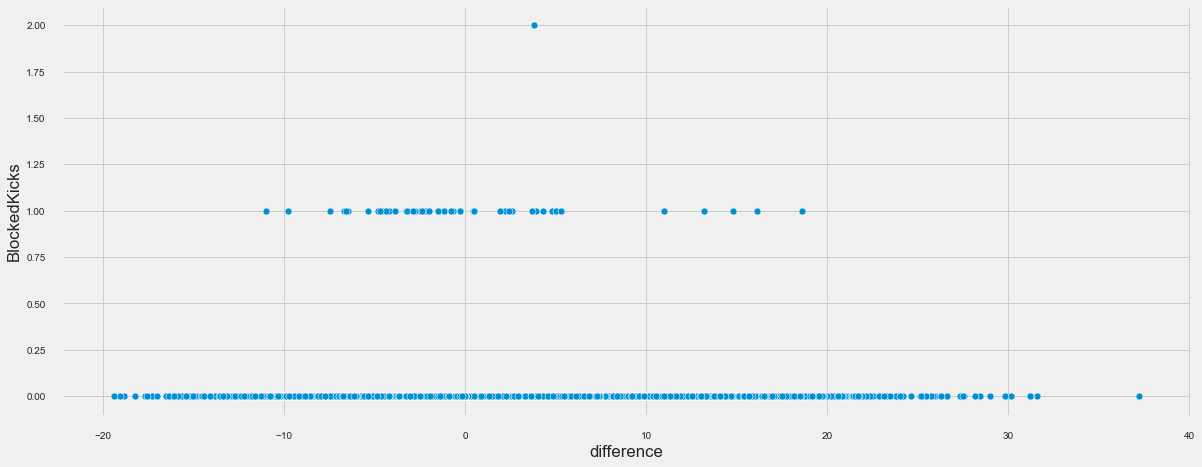

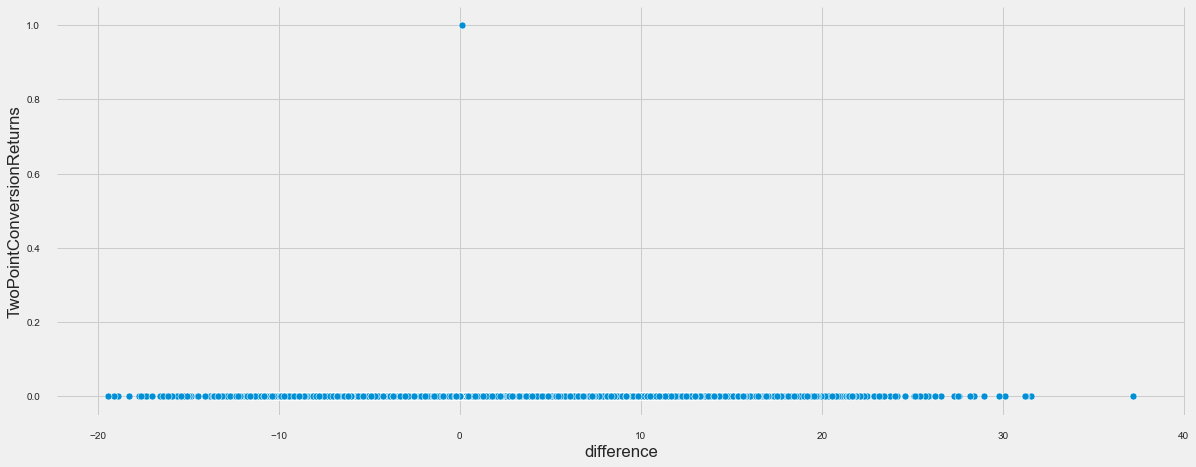

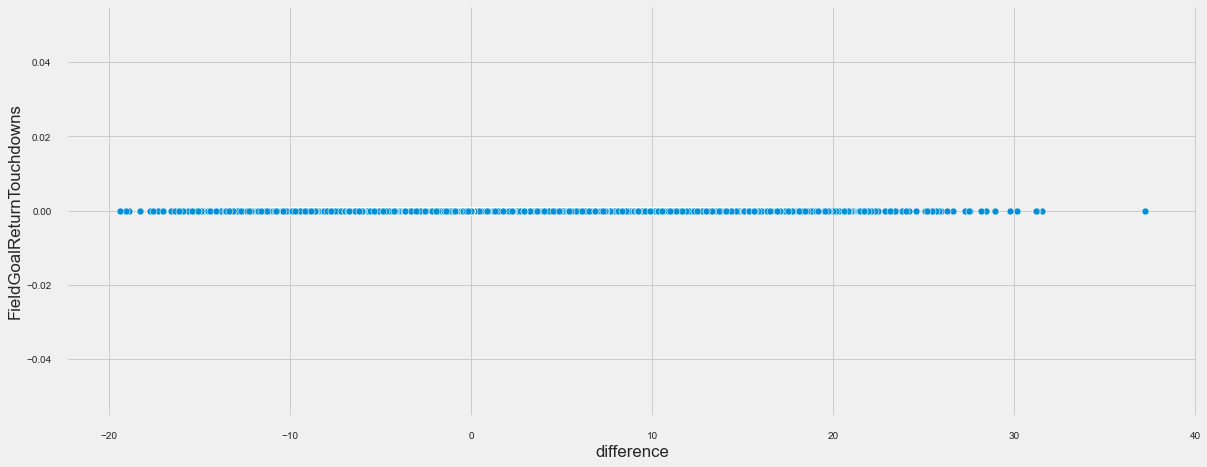

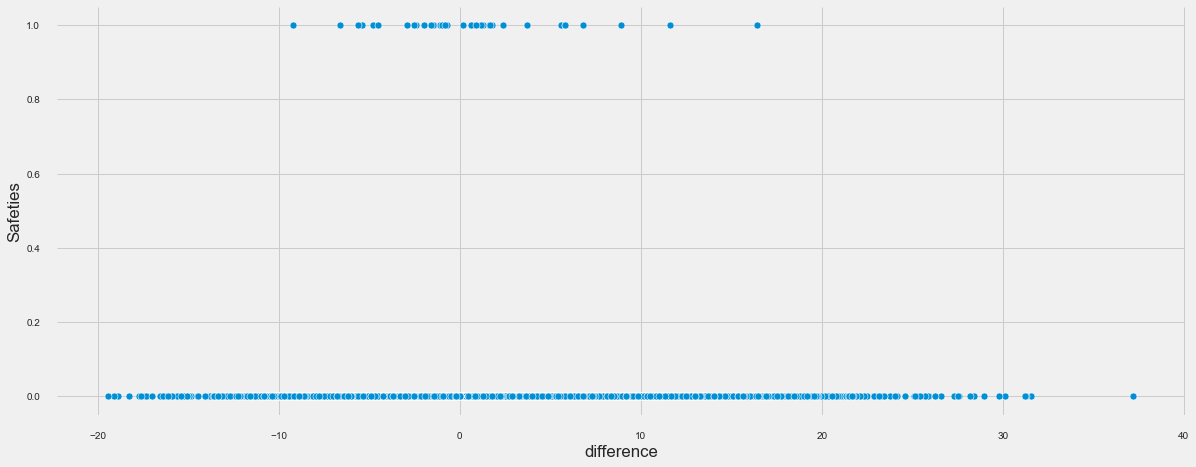

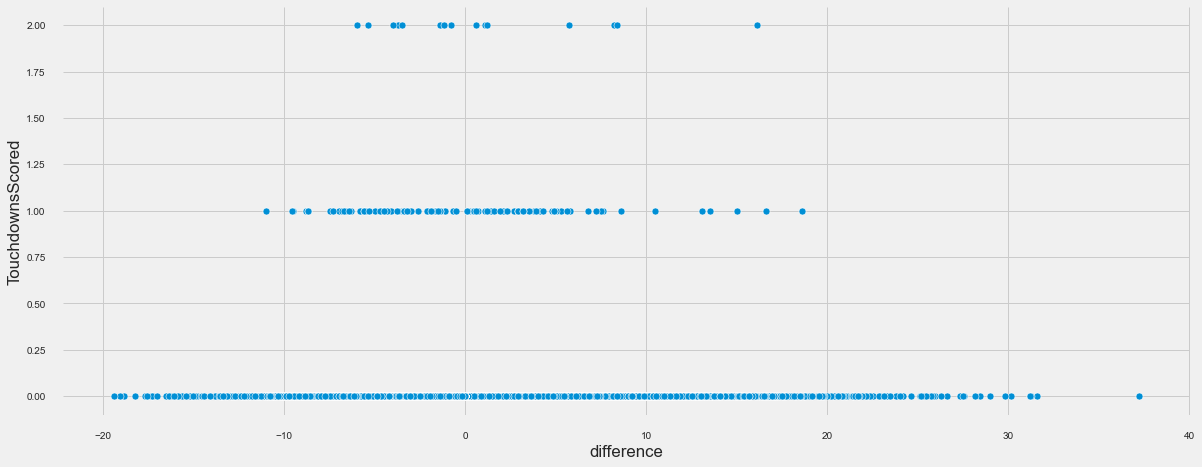

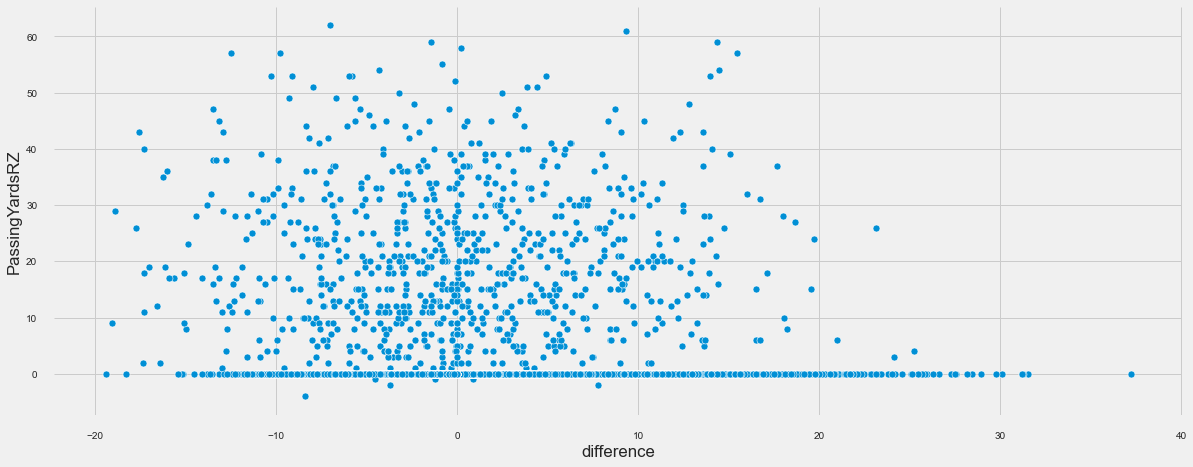

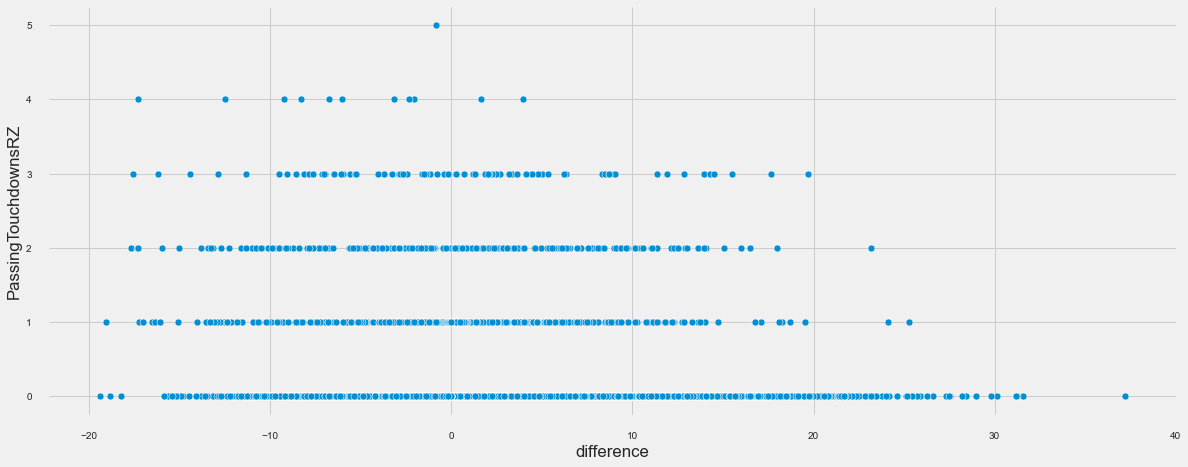

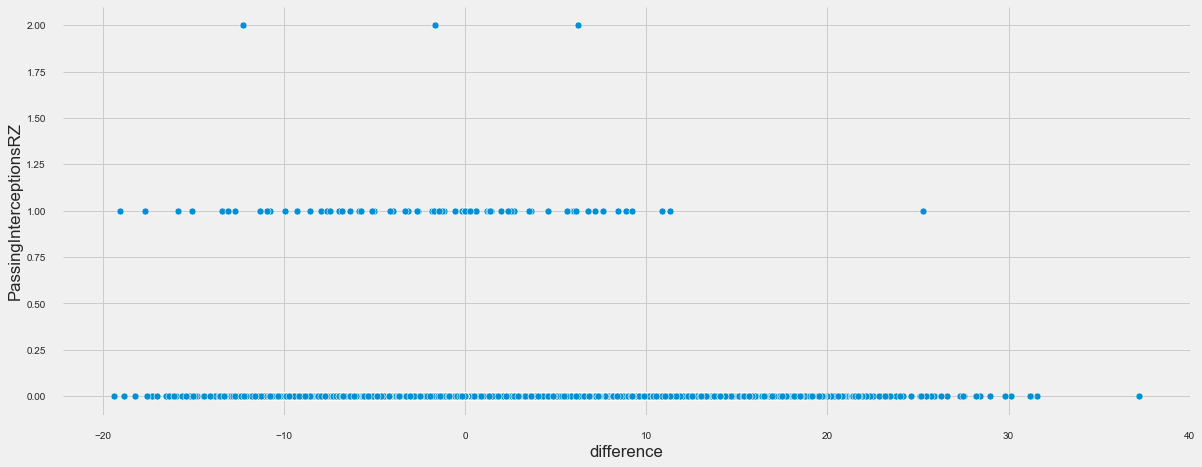

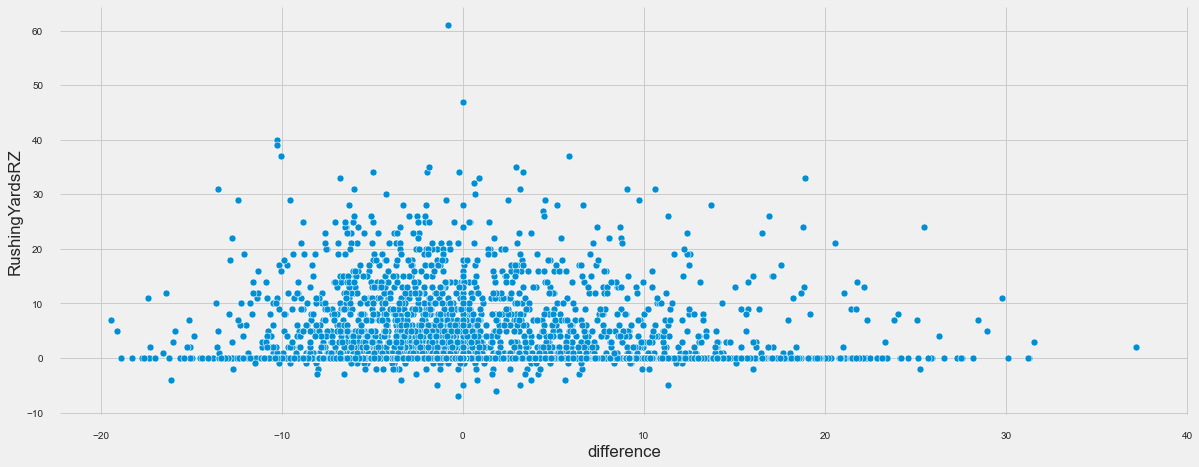

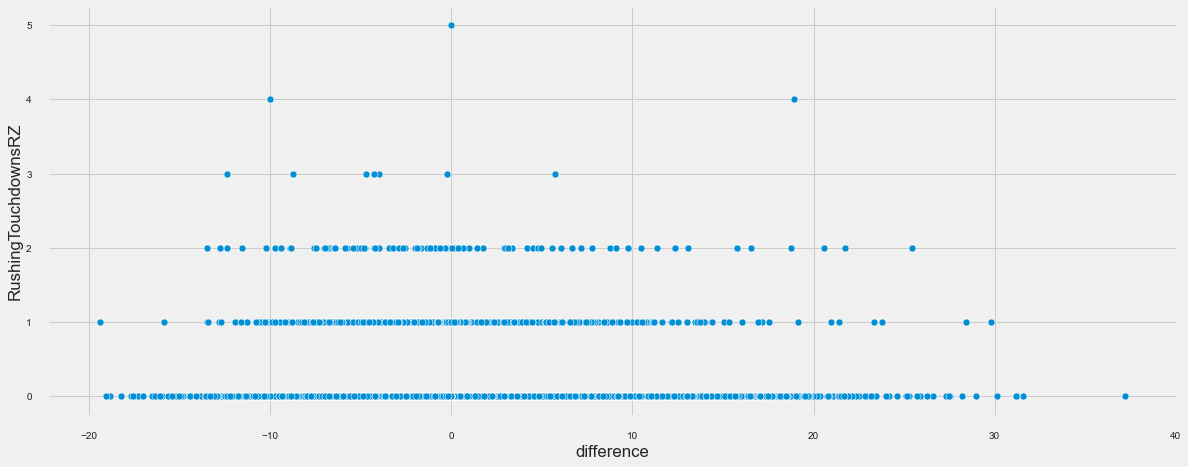

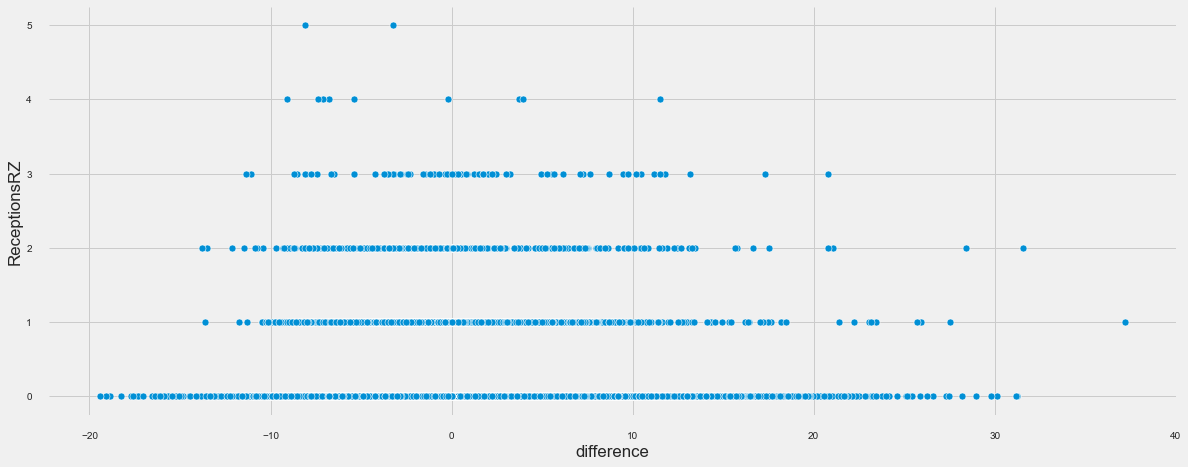

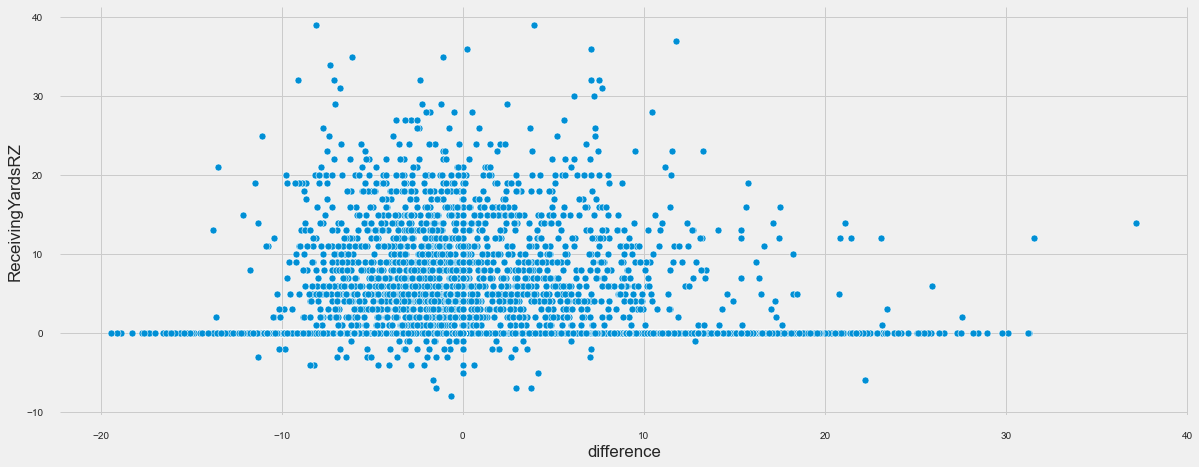

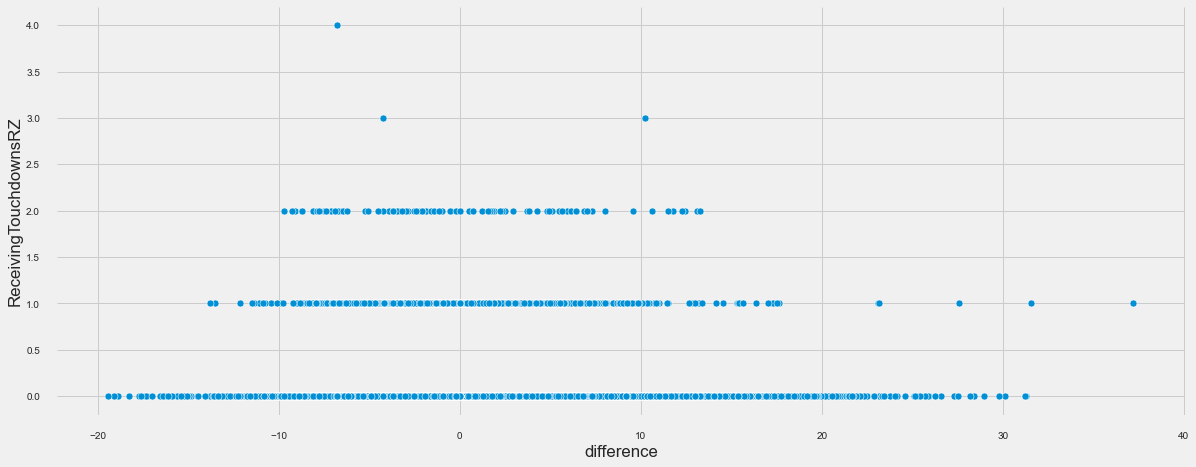

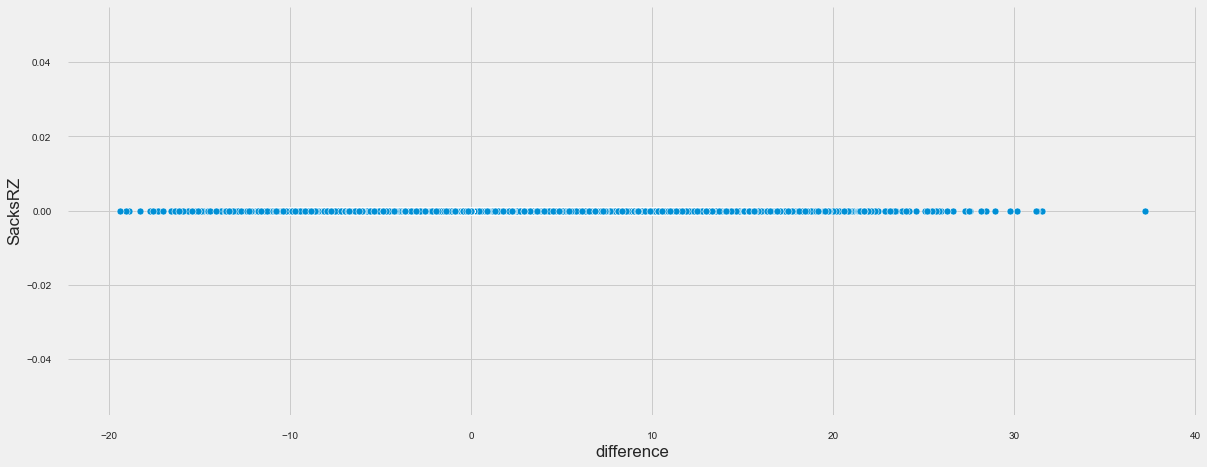

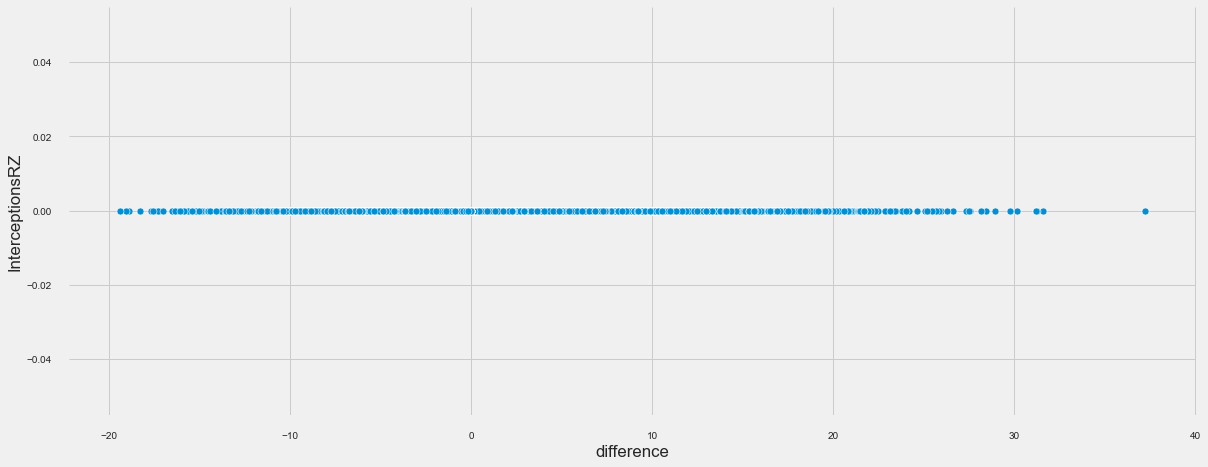

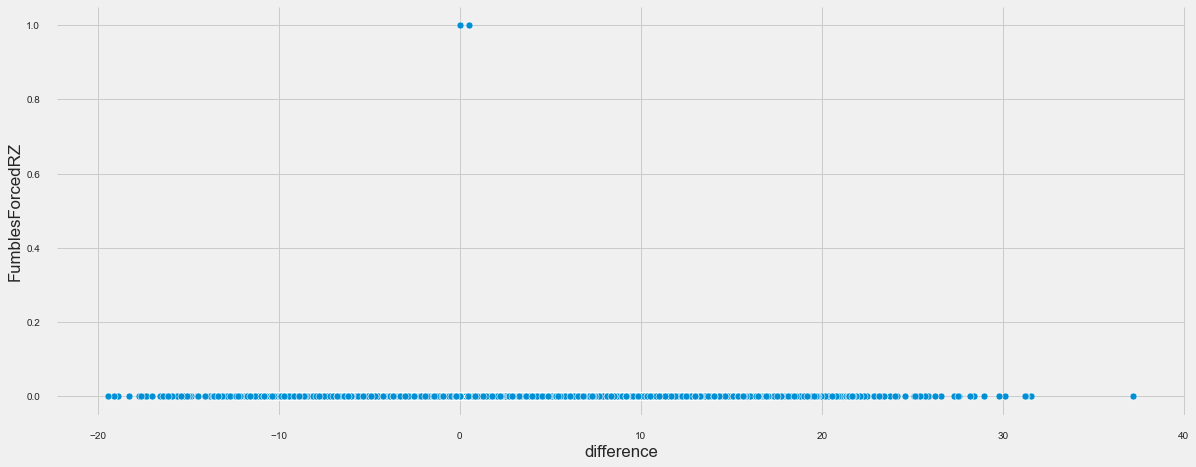

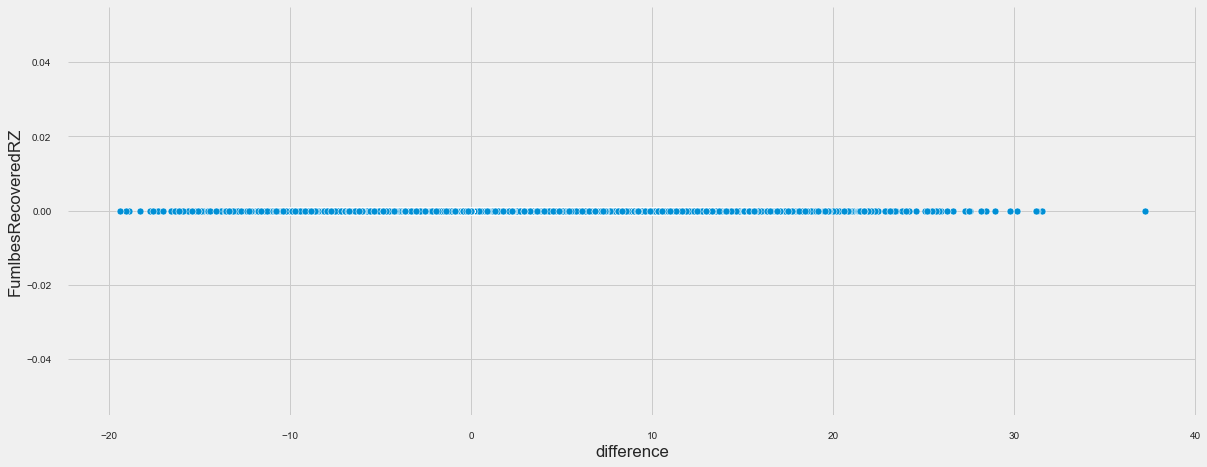

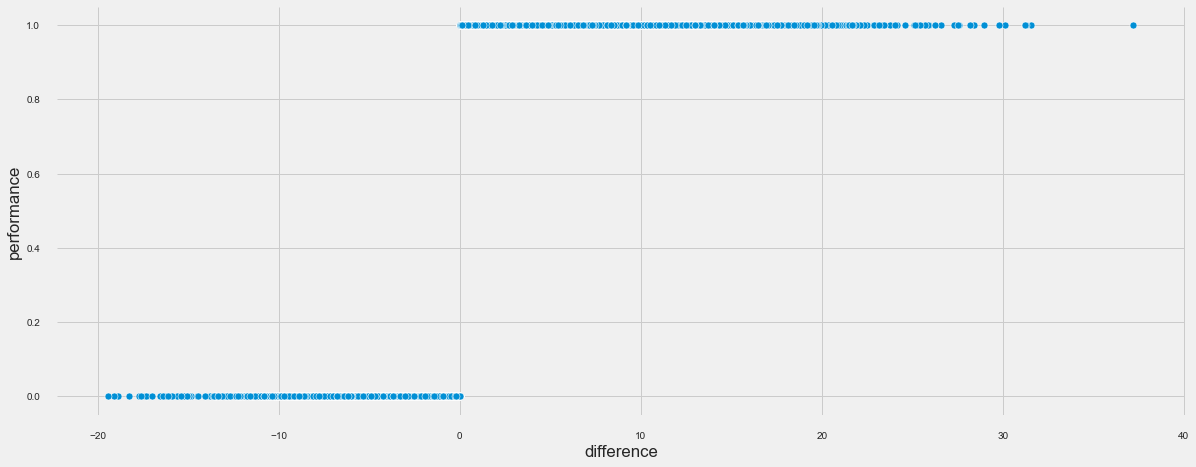

In [96]:
for col in df[boxplot_cols].columns[2:len(df[boxplot_cols].columns)]:
    
    sns.scatterplot(x = 'difference', y = col, palette=['b','r'], data=df)
    sns.despine(offset=10, trim=True)

    plt.show()
    plt.clf()

plt.close()

In [43]:
cols_to_try = [
    'weather_temperature',
    'weather_wind_mph_number',
    'weather_cloud_cover',
    'weather_precipitation',
    'weather_humidity',
    'age',
    'elevation_displacement'
]

## Unsupervised Machine Learning

In [108]:
from sklearn.cluster import KMeans

In [103]:
X = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID'
], axis = 'columns')

#y = df['performance']

In [117]:
kmeans = KMeans(n_clusters = 4, random_state = 0)

categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder = 'drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', kmeans)
])

# Instantiate the classification model and visualizer
model.fit(X)
#Y_kmeans = kmeans.predict(X)


#plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [104]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)

ValueError: could not convert string to float: 'ARZ'

### Trying different scalers

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

In [83]:
scalers_to_try = [RobustScaler,
                  StandardScaler,
                  MinMaxScaler,
                  minmax_scale,
                  MaxAbsScaler,
                  Normalizer,
                  QuantileTransformer,
                  PowerTransformer
]

<AxesSubplot:>

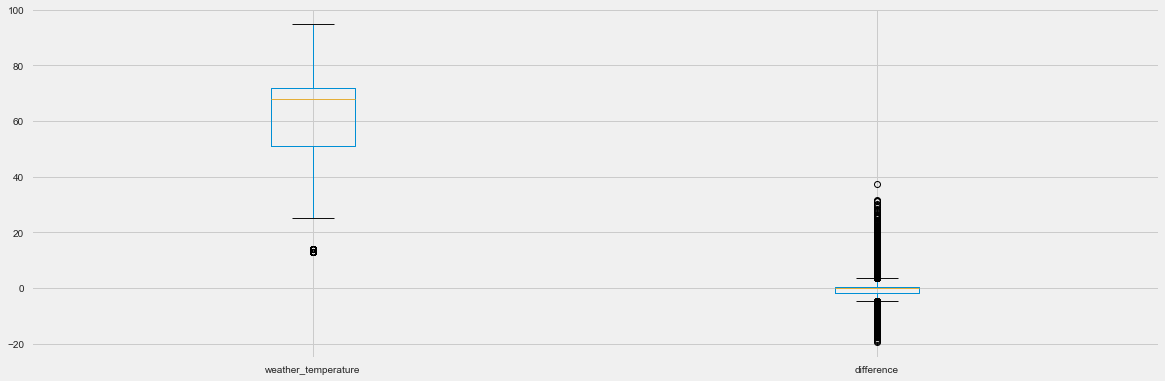

In [95]:
tester_df.boxplot()

In [101]:
scaled_tester_df = PowerTransformer.fit_transform(X = tester_df['weather_temperature'])
scaled_tester_df.boxplot()

TypeError: fit_transform() missing 1 required positional argument: 'self'

In [88]:
tester_df = df[['weather_temperature','difference']]

for n in scalers_to_try:
    scaler = n()
    scaled = scaler.fit_transform(tester_df)
    scaled.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

Thanks [scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) for the following code

In [46]:
from matplotlib import cm

In [58]:
cols_to_try

['weather_temperature',
 'weather_wind_mph_number',
 'weather_cloud_cover',
 'weather_precipitation',
 'weather_humidity',
 'age',
 'elevation_displacement']

In [66]:
X = df.copy()

In [67]:
df

GameKey  PlayerID  Season  Week Team Opponent HomeOrAway Position  \
0      201910101         1    2019     1  ARZ      DET       HOME      DEF   
1      201910120         2    2019     1  ATL      MIN       AWAY      DEF   
2      201910105         5    2019     1  CAR      LAR       HOME      DEF   
3      201910130         7    2019     1  CIN      SEA       AWAY      DEF   
4      201910108         8    2019     1  CLV      TEN       HOME      DEF   
...          ...       ...     ...   ...  ...      ...        ...      ...   
19122  202011713     22418    2020    17  TEN      HST       AWAY       TE   
19123  202011721     22436    2020    17   NE      NYJ       HOME       TE   
19124  202011714     22441    2020    17  JAX      IND       AWAY       RB   
19125  202011731     22456    2020    17   SF      SEA       HOME       TE   
19126  202011706     22477    2020    17   GB      CHI       AWAY       TE   

      PositionCategory  InjuryStatus  TeamID  OpponentID  ScoreID  week_id  \
0                  DEF             0       1          11    16994   2019_1   
1                  DEF             0       2          20    16986   2019_1   
2                  DEF             0       5          32    16989   2019_1   
3                  DEF             0       7          30    16992   2019_1   
4                  DEF             0       8          34    16984   2019_1   
...                ...           ...     ...         ...      ...      ...   
19122              OFF             0      34          13    17515  2020_17   
19123              OFF             0      21          24    17510  2020_17   
19124              OFF             0      15          14    17508  2020_17   
19125              OFF             0      31          30    17518  2020_17   
19126              OFF             0      12           6    17504  2020_17   

      OpponentRZ  days_since_last_game  absolute_hours_displaced  \
0              0                   365                         0   
1              0                   365                         1   
2              0                   365                         0   
3              0                   365                         3   
4              0                   365                         0   
...          ...                   ...                       ...   
19122          0                     7                         0   
19123          0                     6                         0   
19124          0                     7                         0   
19125          0                     8                         0   
19126        CHI                     7                         0   

       weather_temperature  weather_wind_mph_number weather_wind_direction  \
0                       72                        0                No wind   
1                       72                        0                No wind   
2                       85                        3                   East   
3                       66                        4                  South   
4                       69                        6              NorthEast   
...                    ...                      ...                    ...   
19122                   72                        0                No wind   
19123                   33                        5              NorthEast   
19124                   72                        0                No wind   
19125                   55                        2      North - NorthWest   
19126                   32                        6       West - SouthWest   

       weather_cloud_cover  weather_precipitation  weather_humidity  \
0                     0.39                    0.0              0.32   
1                     0.10                    0.1              0.93   
2                     0.00                    0.0              0.48   
3                     0.96                    0.0              0.76   
4                     0.61

In [71]:
X

weather_temperature  weather_wind_mph_number
0                       72                        0
1                       72                        0
2                       85                        3
3                       66                        4
4                       69                        6
...                    ...                      ...
19122                   72                        0
19123                   33                        5
19124                   72                        0
19125                   55                        2
19126                   32                        6

[19127 rows x 2 columns]

In [73]:
y

array([1., 0., 0., ..., 0., 0., 1.])

In [80]:
X_full, y_full = X, y

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[['weather_temperature','weather_wind_mph_number']]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    #('Data after power transformation (Box-Cox)',
     #PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [81]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    #norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              #norm=norm,
                              orientation='vertical',
                              label='Color mapping for values of y')

NameError: name 'mpl' is not defined

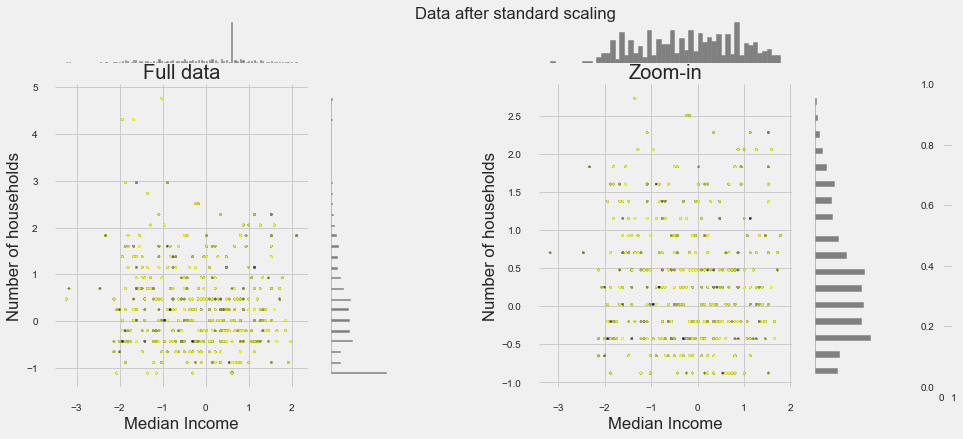

In [82]:
make_plot(1)

In [48]:
# Find out basic characteristics of the columns and, if necessary, drop columns with null values
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19127 entries, 0 to 19126
Data columns (total 110 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GameKey                             19127 non-null  int64  
 1   PlayerID                            19127 non-null  int64  
 2   Season                              19127 non-null  int64  
 3   Week                                19127 non-null  int64  
 4   Team                                19127 non-null  object 
 5   Opponent                            19127 non-null  object 
 6   HomeOrAway                          19127 non-null  object 
 7   Position                            19127 non-null  object 
 8   PositionCategory                    19127 non-null  object 
 9   InjuryStatus                        19127 non-null  int64  
 10  TeamID                              19127 non-null  int64  
 11  OpponentID                          1912

In [55]:
df.head()

GameKey  PlayerID  Season  Week Team Opponent HomeOrAway Position  \
0  201910101         1    2019     1  ARZ      DET       HOME      DEF   
1  201910203         1    2019     2  ARZ      BLT       AWAY      DEF   
2  201910301         1    2019     3  ARZ      CAR       HOME      DEF   
3  201910401         1    2019     4  ARZ      SEA       HOME      DEF   
4  201910507         1    2019     5  ARZ      CIN       AWAY      DEF   

  PositionCategory  InjuryStatus  TeamID  OpponentID  ScoreID week_id  \
0              DEF             0       1          11    16994  2019_1   
1              DEF             0       1           3    17008  2019_2   
2              DEF             0       1           5    17024  2019_3   
3              DEF             0       1          30    17041  2019_4   
4              DEF             0       1           7    17047  2019_5   

  OpponentRZ  days_since_last_game  absolute_hours_displaced  \
0          0                   365                         0   
1          0                     7                         2   
2          0                     7                         0   
3          0                     7                         0   
4          0                     7                         2   

   weather_temperature  weather_wind_mph_number weather_wind_direction  \
0                   72                        0                No wind   
1                   81                        3      North - NorthWest   
2                   72                        0                No wind   
3                   72                        0                No wind   
4                   76                        6       West - SouthWest   

   weather_cloud_cover  weather_precipitation  weather_humidity  \
0                 0.39                    0.0              0.32   
1                 0.00                    0.0              0.45   
2                 0.40                    0.0              0.90   
3                 0.38                    0.0              0.36   
4                 0.87                    0.0              0.60   

  weather_detail  elevation_displacement        age  Played  Started  \
0           DOME                       0  25.354502       0        0   
1          Clear                 3226593  25.354502       1        1   
2           DOME                       0  25.354502       1        1   
3           DOME                       0  25.354502       1        1   
4  Mostly Cloudy                 1792624  25.354502       1        1   

   PassingAttempts  PassingCompletions  PassingYards  \
0              0.0                 0.0           0.0   
1              0.0                 0.0           0.0   
2              0.0                 0.0           0.0   
3              0.0                 0.0           0.0   
4              0.0                 0.0           0.0   

   PassingCompletionPercentage  PassingYardsPerAttempt  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   

   PassingYardsPerCompletion  PassingTouchdowns  PassingInterceptions  \
0                        0.0                0.0                   0.0   
1                        0.0                0.0                   0.0   
2                        0.0                0.0                   0.0   
3                        0.0                0.0                   0.0   
4                        0.0                0.0                   0.0   

   PassingRating  PassingLong  PassingSacks  PassingSackYards  \
0            0.0          0.0           0.0               0.0   
1            0.0          0.0           0.0               0.0   
2            0.0          0.0           0.0               0.0   
3            0.0          0.0           0.0               0.0   
4    

In [56]:
df.tail()

GameKey  PlayerID  Season  Week Team Opponent HomeOrAway Position  \
19209  202010816     22482    2020     8  NYJ       KC       AWAY        K   
19210  202010924     22482    2020     9  NYJ       NE       HOME        K   
19211  202011129     22482    2020    11  NYJ      LAC       AWAY        K   
19212  202011224     22482    2020    12  NYJ      MIA       HOME        K   
19213  202011324     22482    2020    13  NYJ       LV       HOME        K   

      PositionCategory  InjuryStatus  TeamID  OpponentID  ScoreID  week_id  \
19209               ST             0      24          16    17376   2020_8   
19210               ST             0      24          21    17396   2020_9   
19211               ST             0      24          29    17645  2020_11   
19212               ST             0      24          19    17433  2020_12   
19213               ST             0      24          25    17446  2020_13   

      OpponentRZ  days_since_last_game  absolute_hours_displaced  \
19209          0                     7                         1   
19210          0                     8                         0   
19211          0                    13                         3   
19212          0                     7                         0   
19213          0                     7                         0   

       weather_temperature  weather_wind_mph_number weather_wind_direction  \
19209                   46                       12      North - NorthWest   
19210                   60                        3      South - SouthWest   
19211                   69                        4              SouthWest   
19212                   51                        3              SouthWest   
19213                   39                       13              NorthWest   

       weather_cloud_cover  weather_precipitation  weather_humidity  \
19209                 0.20                    0.0              0.38   
19210                 0.10                    0.0              0.80   
19211                 0.28                    0.0              0.55   
19212                 0.00                    0.0              0.44   
19213                 0.21                    0.0              0.54   

      weather_detail  elevation_displacement        age  Played  Started  \
19209          Clear                 2585896  30.003468       1        0   
19210          Clear                       0  30.026198       1        0   
19211          Clear                  180694  30.061316       1        0   
19212          Clear                       0  30.080129       0        0   
19213          Clear                       0  30.099295       1        0   

       PassingAttempts  PassingCompletions  PassingYards  \
19209              0.0                 0.0           0.0   
19210              0.0                 0.0           0.0   
19211              0.0                 0.0           0.0   
19212              0.0                 0.0           0.0   
19213              0.0                 0.0           0.0   

       PassingCompletionPercentage  PassingYardsPerAttempt  \
19209                          0.0                     0.0   
19210                          0.0                     0.0   
19211                          0.0                     0.0   
19212                          0.0                     0.0   
19213                          0.0                     0.0   

       PassingYardsPerCompletion  PassingTouchdowns  PassingInterceptions  \
19209                        0.0                0.0                   0.0   
19210                        0.0                0.0                   0.0   
19211                        0.0                0.0                   0.0   
19212                        0.0                0.0                   0.0   
19213                        0.0                0.0                   0.0   

       PassingRating  PassingLong  PassingSacks  PassingSackYards  \
19209            0.0          0.0          

In [57]:
df.describe()

GameKey      PlayerID        Season          Week  InjuryStatus  \
count  1.912700e+04  19127.000000  19127.000000  19127.000000  19127.000000   
mean   2.019614e+08  16937.516286   2019.504836      9.075600      0.038427   
std    5.000424e+04   5570.502477      0.499990      5.011942      0.192231   
min    2.019101e+08      1.000000   2019.000000      1.000000      0.000000   
25%    2.019109e+08  16135.000000   2019.000000      5.000000      0.000000   
50%    2.020101e+08  18912.000000   2020.000000      9.000000      0.000000   
75%    2.020109e+08  20500.000000   2020.000000     14.000000      0.000000   
max    2.020117e+08  22482.000000   2020.000000     17.000000      1.000000   

             TeamID    OpponentID       ScoreID  days_since_last_game  \
count  19127.000000  19127.000000  19127.000000          19127.000000   
mean      17.967167     17.760234  17257.044074             26.385842   
std       10.432394     10.462779    165.378541             74.701910   
min        1.000000      1.000000  16983.000000              4.000000   
25%        9.000000      8.000000  17112.000000              7.000000   
50%       19.000000     19.000000  17265.000000              7.000000   
75%       28.000000     28.000000  17400.000000              8.000000   
max       35.000000     35.000000  17645.000000            365.000000   

       absolute_hours_displaced  weather_temperature  weather_wind_mph_number  \
count              19127.000000         19127.000000             19127.000000   
mean                   0.506980            62.642495                 4.890730   
std                    0.907255            15.318630                 4.437723   
min                    0.000000            13.000000                 0.000000   
25%                    0.000000            51.000000                 0.000000   
50%                    0.000000            68.000000                 4.000000   
75%                    1.000000            72.000000                 7.000000   
max                    3.000000            95.000000                26.000000   

       weather_cloud_cover  weather_precipitation  weather_humidity  \
count         19127.000000           19127.000000      19127.000000   
mean              0.393415               0.018820          0.621010   
std               0.314500               0.087558          0.208417   
min               0.000000               0.000000          0.100000   
25%               0.100000               0.000000          0.490000   
50%               0.320000               0.000000          0.640000   
75%               0.670000               0.000000          0.780000   
max               0.990000               0.990000          0.990000   

       elevation_displacement           age        Played       Started  \
count            1.912700e+04  19127.000000  19127.000000  19127.000000   
mean             1.049646e+06     26.493372      0.717833      0.330998   
std              2.596858e+06      3.530859      0.450066      0.470585   
min              0.000000e+00     21.083367      0.000000      0.000000   
25%              0.000000e+00     24.136133      0.000000      0.000000   
50%              0.000000e+00     25.546545      1.000000      0.000000   
75%              1.387608e+06     27.821708      1.000000      1.000000   
max              1.585337e+07     46.945637      1.000000      1.000000   

       PassingAttempts  PassingCompletions  PassingYards  \
count     19127.000000        19127.000000  19127.000000   
mean          1.744863            1.127412     12.655095   
std           7.706768            5.020342     56.931606   
min           0.000000            0.000000      0.000000   
25%           0.000000            0.000000      0.000000   
50%           0.000000            0.000000      0.000000   
75%           0.000000            0.000000      0.000000   
max          68.000000           45.000000    517.000000   

       PassingCompletionPercentage  PassingYardsPerAtte

### Preparing the data
<a id='preparing_data_cell'></a>

In [7]:
df = df.sort_values(by = ['Season','Week']).reset_index(drop = True)

In [8]:
df

GameKey  PlayerID  Season  Week Team Opponent HomeOrAway Position  \
0      201910101         1    2019     1  ARZ      DET       HOME      DEF   
1      201910120         2    2019     1  ATL      MIN       AWAY      DEF   
2      201910105         5    2019     1  CAR      LAR       HOME      DEF   
3      201910130         7    2019     1  CIN      SEA       AWAY      DEF   
4      201910108         8    2019     1  CLV      TEN       HOME      DEF   
...          ...       ...     ...   ...  ...      ...        ...      ...   
19122  202011713     22418    2020    17  TEN      HST       AWAY       TE   
19123  202011721     22436    2020    17   NE      NYJ       HOME       TE   
19124  202011714     22441    2020    17  JAX      IND       AWAY       RB   
19125  202011731     22456    2020    17   SF      SEA       HOME       TE   
19126  202011706     22477    2020    17   GB      CHI       AWAY       TE   

      PositionCategory  InjuryStatus  TeamID  OpponentID  ScoreID  week_id  \
0                  DEF             0       1          11    16994   2019_1   
1                  DEF             0       2          20    16986   2019_1   
2                  DEF             0       5          32    16989   2019_1   
3                  DEF             0       7          30    16992   2019_1   
4                  DEF             0       8          34    16984   2019_1   
...                ...           ...     ...         ...      ...      ...   
19122              OFF             0      34          13    17515  2020_17   
19123              OFF             0      21          24    17510  2020_17   
19124              OFF             0      15          14    17508  2020_17   
19125              OFF             0      31          30    17518  2020_17   
19126              OFF             0      12           6    17504  2020_17   

      OpponentRZ  days_since_last_game  absolute_hours_displaced  \
0              0                   365                         0   
1              0                   365                         1   
2              0                   365                         0   
3              0                   365                         3   
4              0                   365                         0   
...          ...                   ...                       ...   
19122          0                     7                         0   
19123          0                     6                         0   
19124          0                     7                         0   
19125          0                     8                         0   
19126        CHI                     7                         0   

       weather_temperature  weather_wind_mph_number weather_wind_direction  \
0                       72                        0                No wind   
1                       72                        0                No wind   
2                       85                        3                   East   
3                       66                        4                  South   
4                       69                        6              NorthEast   
...                    ...                      ...                    ...   
19122                   72                        0                No wind   
19123                   33                        5              NorthEast   
19124                   72                        0                No wind   
19125                   55                        2      North - NorthWest   
19126                   32                        6       West - SouthWest   

       weather_cloud_cover  weather_precipitation  weather_humidity  \
0                     0.39                    0.0              0.32   
1                     0.10                    0.1              0.93   
2                     0.00                    0.0              0.48   
3                     0.96                    0.0              0.76   
4                     0.61

In [129]:
# Split dataframe into two dataframes: X will have all but target, y will have target
X = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID'
], axis = 'columns')

y = df['performance']

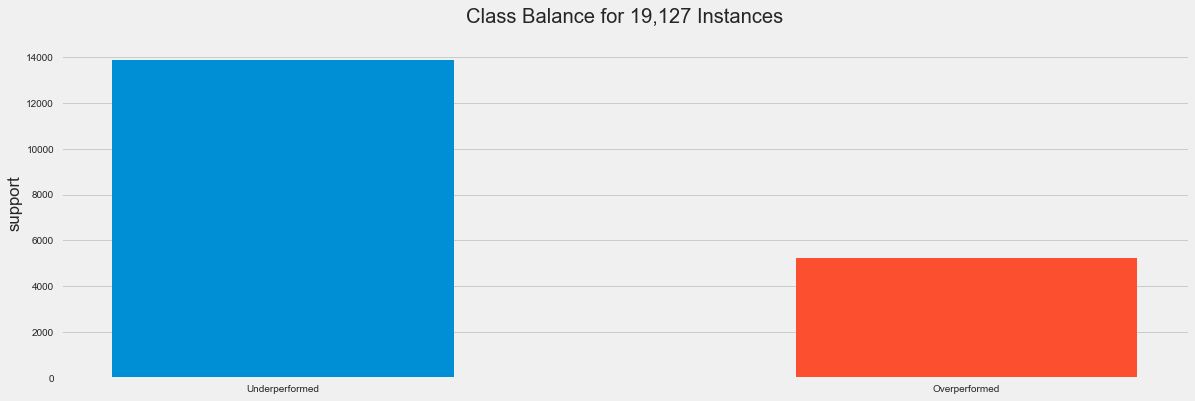

In [14]:
visualizer = ClassBalance(labels=['Underperformed','Overperformed'])

visualizer.fit(y) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

## Global Machine Learning Model
<a id='global_model_cell'></a>
Explain concept

## Time Series Split
Here's a simple explanation of TimeSeriesSplit, derived from a **Medium** article by by [Soumya Shrivastava](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4):   

>"...it makes no sense to use the values from the future to forecast values in the past. In simple word we want to avoid future-looking when we train our model. There is a temporal dependency between observations, and we must preserve that relation during testing."

<img src='https://miro.medium.com/max/1204/1*qvdnPF8ETV9mFdMT0Y_BBA.png' alt="drawing" width="800"/> 

In [260]:
def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap='YlGn',
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        #ax.set_xticks(tick_locations)
        #ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

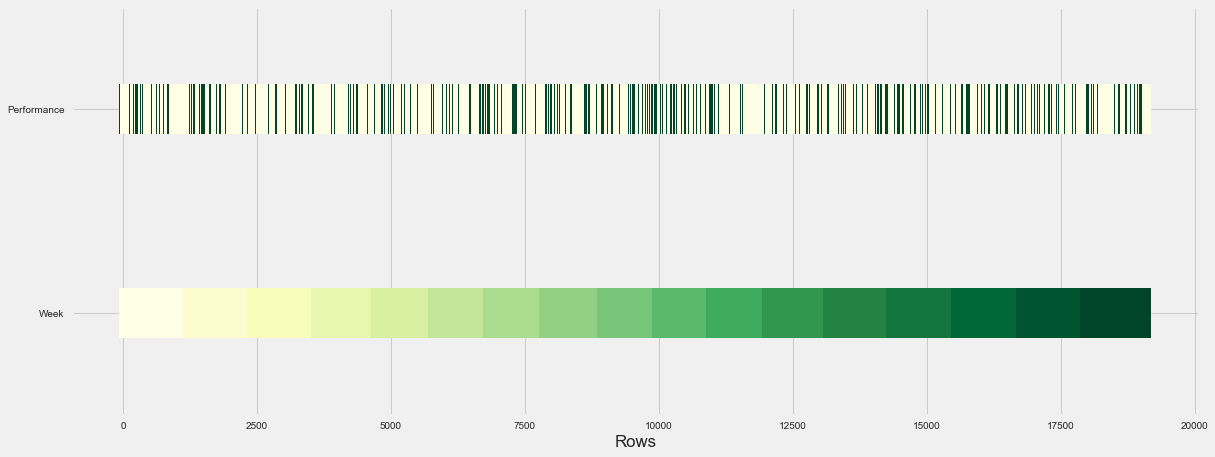

In [226]:
def visualize_groups(classes, groups):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap='YlGn')
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap='YlGn')
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Week', 'Performance'], xlabel="Rows")


visualize_groups(y, X['Week'])

In [122]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 34)
print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=34)


In [123]:
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print("Fold: {}".format(fold))
    print("TRAIN indices:", train_index, "\n", "TEST indices:", test_index)
    print("\n")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


plot_cv_indices(tscv, 17, X, y)

Fold: 0
TRAIN indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [124]:
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 17)

for train_index, test_index in tscv.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1070 1071 1072] TEST: [1073 1074 1075 ... 2132 2133 2134]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [266]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [268]:
tscv = TimeSeriesSplit(n_splits = 17)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    
    arma = sm.tsa.ARMA(cv_train, (2,2)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [228]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [237]:
X = X.drop(['level_0','index'], axis = 'columns')

In [240]:
X = X.drop('performance_class', axis = 'columns')

In [247]:
i = 1
score = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    for mf in np.linspace(100, 150, 6):
        for ne in np.linspace(50, 100, 6):
            for md in np.linspace(20, 40, 5):
                for msl in np.linspace(30, 100, 8):
                    rfr = RandomForestRegressor(
                        max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl))
                    rfr.fit(X_tr, y_tr)
                    score.append([i,
                                  mf, 
                                  ne,
                                  md, 
                                  msl, 
                                  rfr.score(X_val, y_val)])
    i += 1

ValueError: could not convert string to float: 'ARZ'

In [171]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [   0    1    2 ... 1070 1071 1072] TEST: [1073 1074 1075 ... 2132 2133 2134]


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072],\n           dtype='int64', length=1073)] are in the [columns]"

### Model Selection
<a id='model_selection_cell'></a>

#### Selecting Columns 
<a id='column_selection_cell'></a>
From the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html):
> Create a callable to select columns to be used with ColumnTransformer.   
>   
>```make_column_selector``` can select columns based on datatype or the columns name with a regex. When using multiple selection criteria, all criteria must match for a column to be selected.

In [166]:
# Split dataframe into two dataframes: X will have all but target, y will have target
X = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID',
    'PlayerID',
    'elevation_displacement'
], axis = 'columns')

y = df['performance']

In [167]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15301, 98) (15301,)
(3826, 98) (3826,)


In [168]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

#### Selecting models to score
<a id='model_scoring_selection_cell'></a>

In [ ]:
# list of models to use
models = [
    SVC(gamma='auto'),
    NuSVC(gamma='auto'),
    LinearSVC(max_iter = 2000),
    SGDClassifier(max_iter=100, tol=1e-3),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'),
    LogisticRegressionCV(cv=3, max_iter=100),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
    #TimeSeriesSplit(n_splits = 17, max_train_size = None)
]

In [ ]:
# function to score models
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    Input: 
    """
    y = LabelEncoder().fit_transform(y)
    #y = fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    #model.fit(X_train, y_train, **kwargs)

    expected = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [ ]:
# function to visualize models
def visualize_model(X, y, estimator, **kwargs):
    """
    
    """
    y = LabelEncoder().fit_transform(y)
    #y = fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Underperformed','Overperformed'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X_train, y_train)
    
    expected = y_test
    predicted = model.predict(X_test)
    
    visualizer.score(X, y)
    visualizer.show()

#### Scoring selected models
<a id='scoring_models_cell'></a>

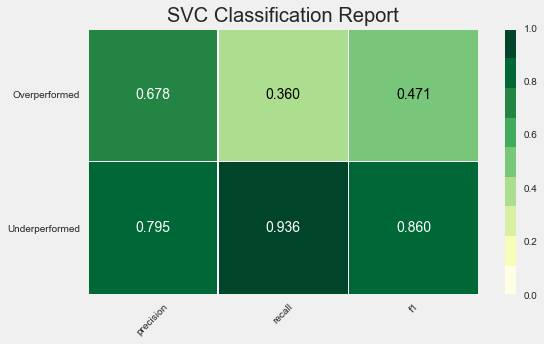

KeyboardInterrupt: 

<Figure size 600x360 with 0 Axes>

In [175]:
# iterate through list of models through both functions defined above
# Use X and y dataframes first, which contain all of the data
for model in models:
    score_model(X, y, model)
    visualize_model(X, y, model)

In [145]:
# Split dataframe into two dataframes: X will have all but target, y will have target
X = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID',
    'PlayerID',
    'elevation_displacement'
], axis = 'columns')

y = df['performance']

In [148]:
# list of models to use
other_models = [
    #SVC(gamma='auto'),
    #NuSVC(gamma='auto'),
    LinearSVC(max_iter = 2000),
    SGDClassifier(max_iter=100, tol=1e-3),
    KNeighborsClassifier(),
    #LogisticRegression(solver='lbfgs'),
    #LogisticRegressionCV(cv=3, max_iter=100),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
    #TimeSeriesSplit(n_splits = 17, max_train_size = None)
]

In [149]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

(15301, 98) (15301,)
(3826, 98) (3826,)


/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 SCORE LinearSVC: 0.5132555673382821


/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


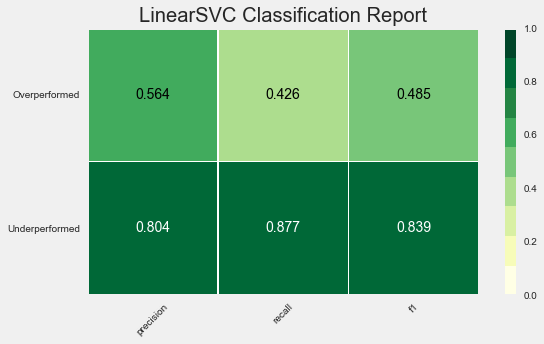

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


F1 SCORE SGDClassifier: 0.4159090909090909


/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


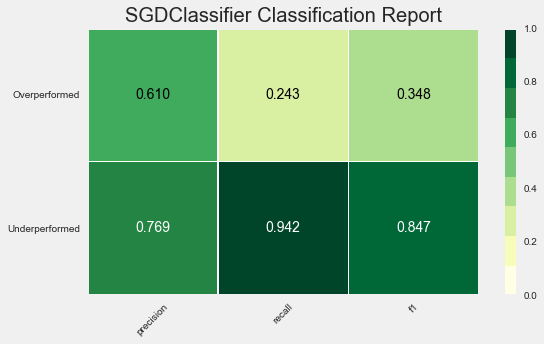

F1 SCORE KNeighborsClassifier: 0.28932406822488943


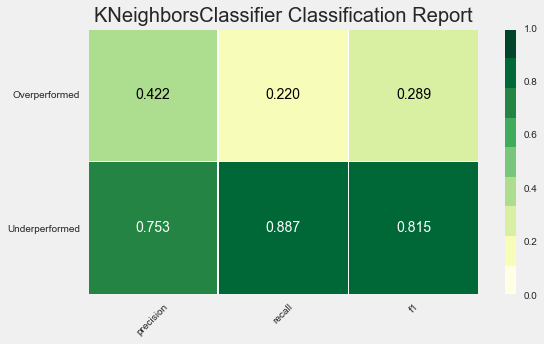

F1 SCORE BaggingClassifier: 0.42366863905325447


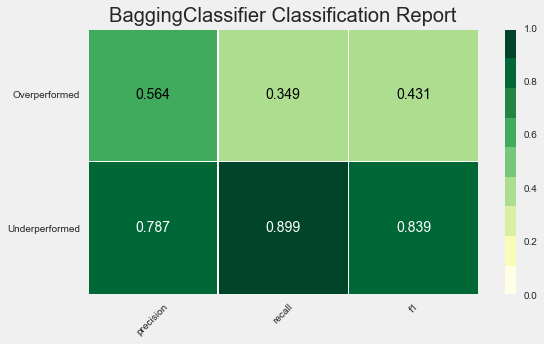

F1 SCORE ExtraTreesClassifier: 0.43602416254805054


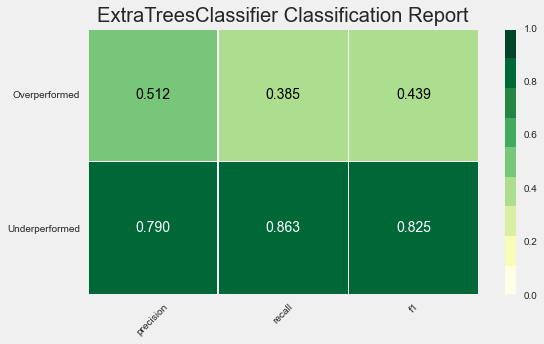

F1 SCORE RandomForestClassifier: 0.43533487297921475


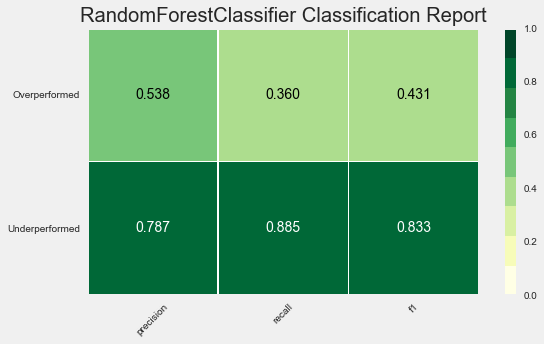

In [150]:
# iterate through list of models through both functions defined above
# Use X and y dataframes first, which contain all of the data
for model in other_models:
    score_model(X_train, y_train, model)
    visualize_model(X_test, y_test, model)

## Multi-Class

In [17]:
df.loc[df['difference'] == 0, 'performance_class'] = 'performed as expected'

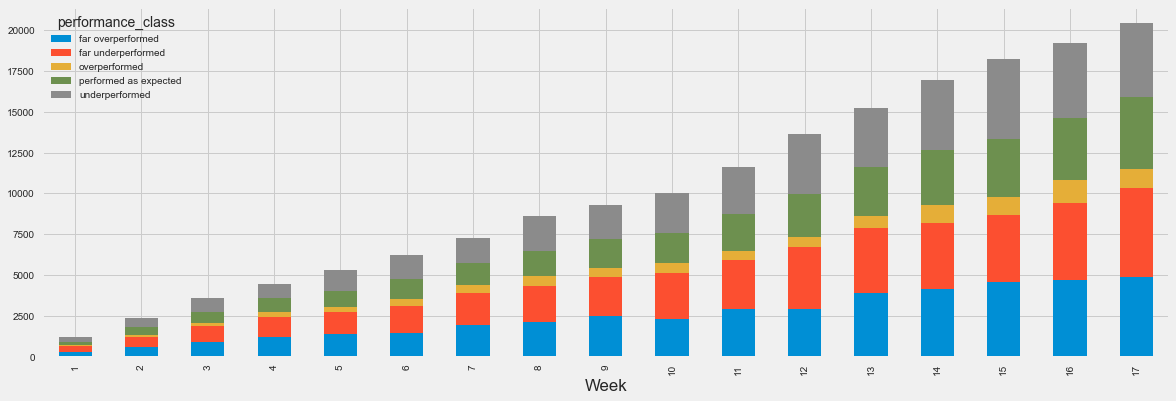

In [34]:
class_agg_df = df.groupby(['Week','performance_class'])['Week'].sum().unstack().fillna(0)

class_agg_df.plot(kind = 'bar', stacked = True)

plt.savefig('../../../fixtures/images/presentation_screenshots/Global_WeeklyValueCountsAndPerformanceMultiClass_BarChart.png')

In [151]:
# Split dataframe into two dataframes: X will have all but target, y will have target
X = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID',
    'PlayerID',
    'elevation_displacement'
], axis = 'columns')

y = df['performance_class']

In [152]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

(15301, 98) (15301,)
(3826, 98) (3826,)


In [163]:
# list of models to use
models = [
    SVC(gamma='auto'),
    NuSVC(gamma='auto'),
    LinearSVC(max_iter = 2000),
    SGDClassifier(max_iter=100, tol=1e-3),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'),
    LogisticRegressionCV(cv=3, max_iter=100),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
    #TimeSeriesSplit(n_splits = 17, max_train_size = None)
]

# function to score models
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    Input: 
    """
    y = LabelEncoder().fit_transform(y)
    #y = fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
        ("imputer",SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs)

    expected = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    
# function to visualize models
def visualize_model(X, y, estimator, **kwargs):
    """
    
    """
    y = LabelEncoder().fit_transform(y)
    #y = fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes = list(df['performance_class'].unique()),
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X_train, y_train)
    
    expected = y_test
    predicted = model.predict(X_test)
    
    visualizer.score(X, y)
    visualizer.show()

In [164]:
for model in other_models:
    score_model(X_train, y_train, model)
    visualize_model(X_test, y_test, model)

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 SCORE LinearSVC: 0.4903293256664924


/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ValueError: Mix of label input types (string and number)

<Figure size 600x360 with 0 Axes>

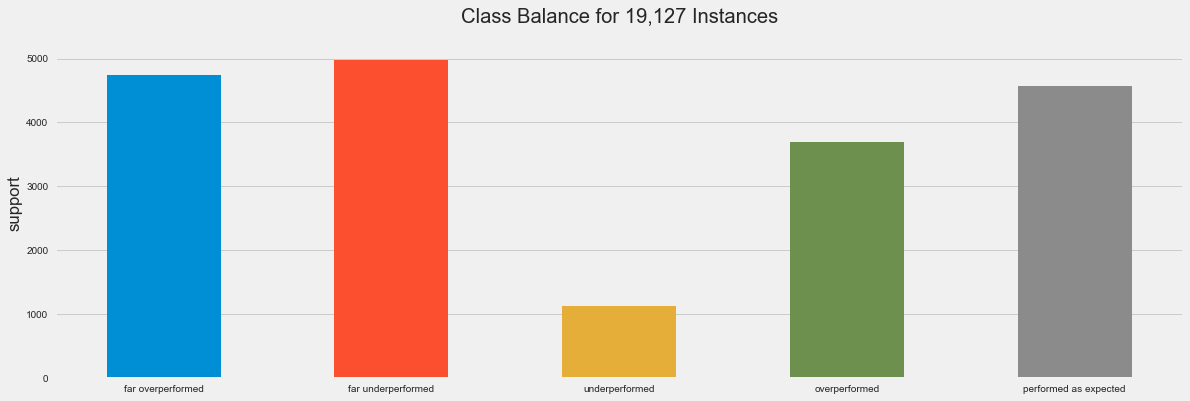

In [33]:
# Split dataframe into two dataframes: X will have all but target, y will have target
X_multiclass = df.drop([
    'performance',
    'performance_class',
    'projected',
    'actual',
    'difference',
    'GameKey',
    'Season',
    'TeamID',
    'OpponentID',
    'ScoreID'
], axis = 'columns')

y_multiclass = df['performance_class']


visualizer = ClassBalance(labels = list(df['performance_class'].unique()))

visualizer.fit(y_multiclass) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

## Hyperparameter Tuning
<a id='hyperparameter_tuning_cell'></a>